In [48]:
import shogun


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [50]:

def autolabel(rects_):
    """
    Attach a text label above each bar displaying its height
    """
    for rect_ in rects_:
        height = rect_.get_height()
        #print height
        ax.text(rect_.get_x() + rect_.get_width()/2., height + .02,
                '%.4f' % height,
                ha='center', va='bottom', fontsize = 16, rotation = 90)

In [51]:
# all_results.xlsx file is constructed through manual copying from the individual “model”.xlsx files.
f = pd.ExcelFile('all_results.xlsx')


In [52]:
x = f.parse(0)
y = x[np.logical_and(x['Docs considered'] == rel, x['Precision/Recall'] == 'F')]
z = y[y['Query'] == 1]
models = list(z['Model'])


In [53]:
models

[u'tfidf :TFIDF',
 u'LM_JM :Lambda=0.7|',
 u'LM_Dirichlet :MU = 2000|',
 u'BM25 :K1 = 1.2 B = 0.75 EPS = 0.01 |']

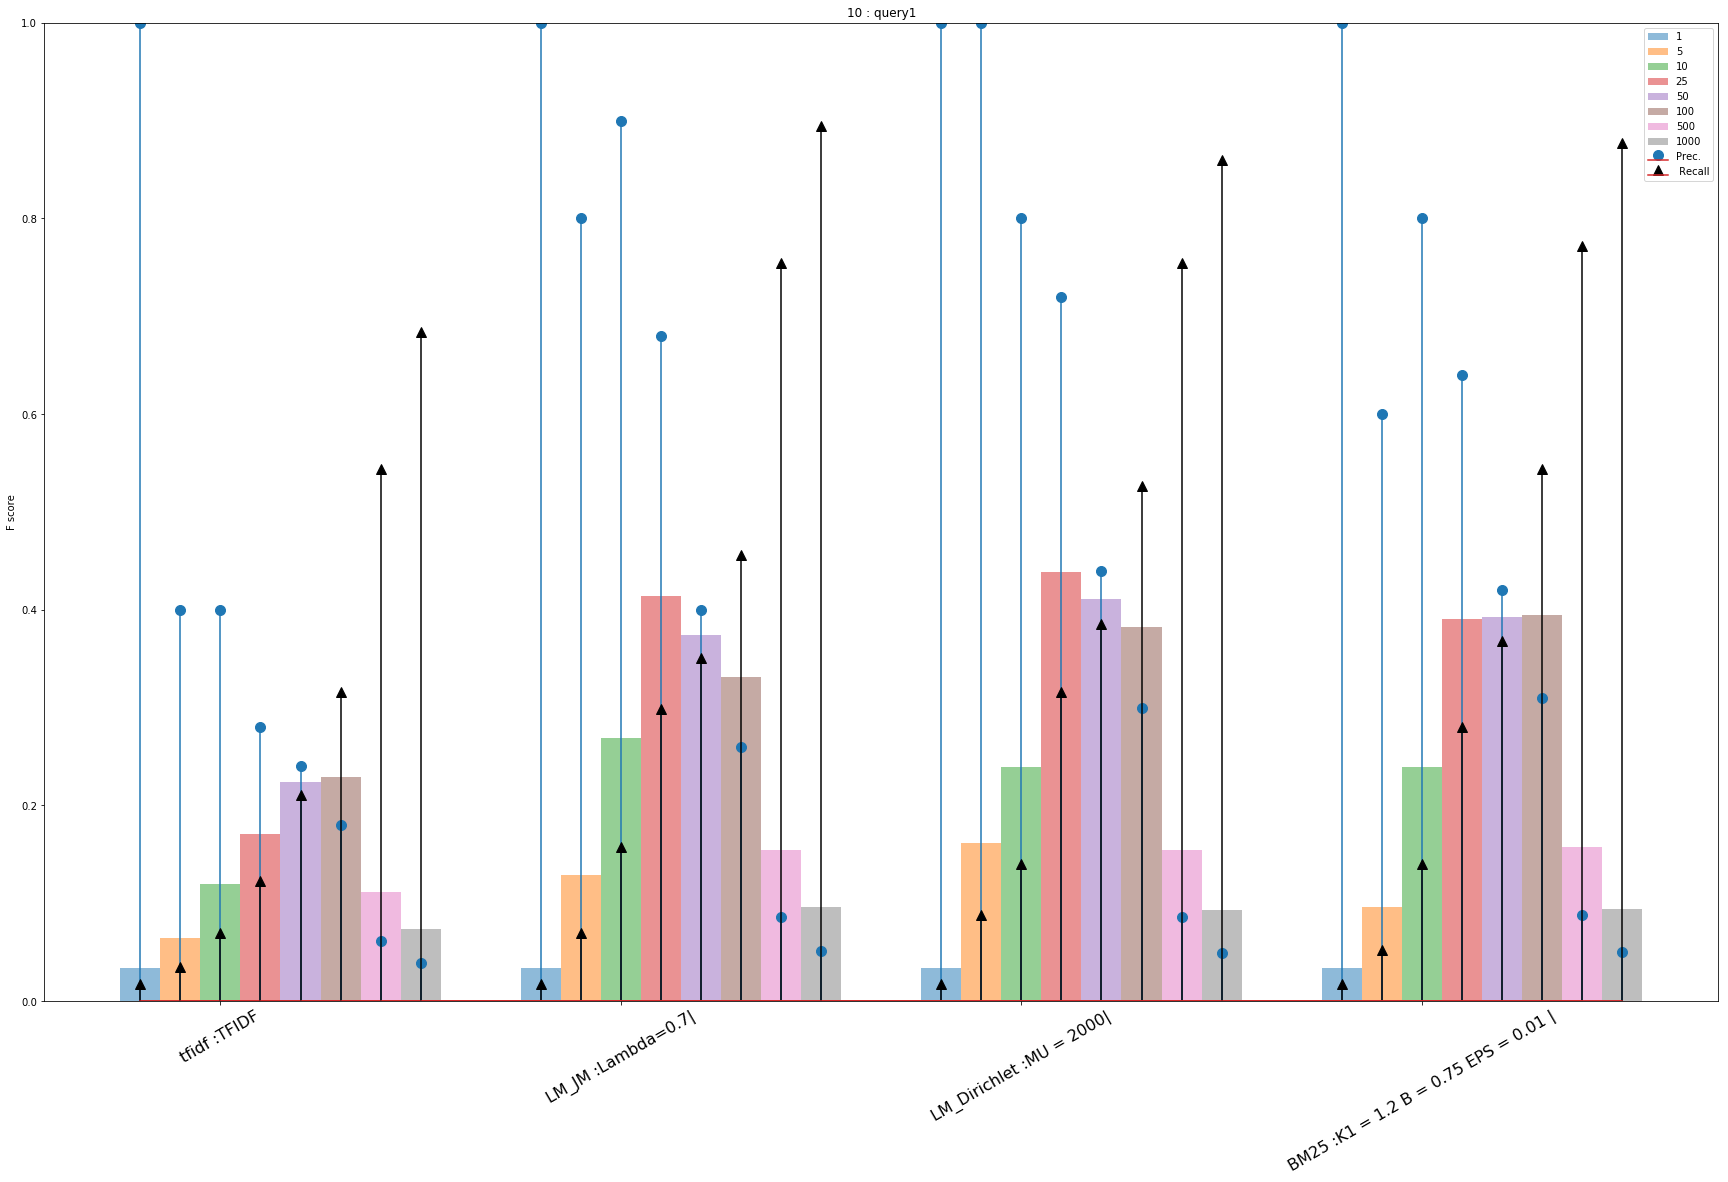

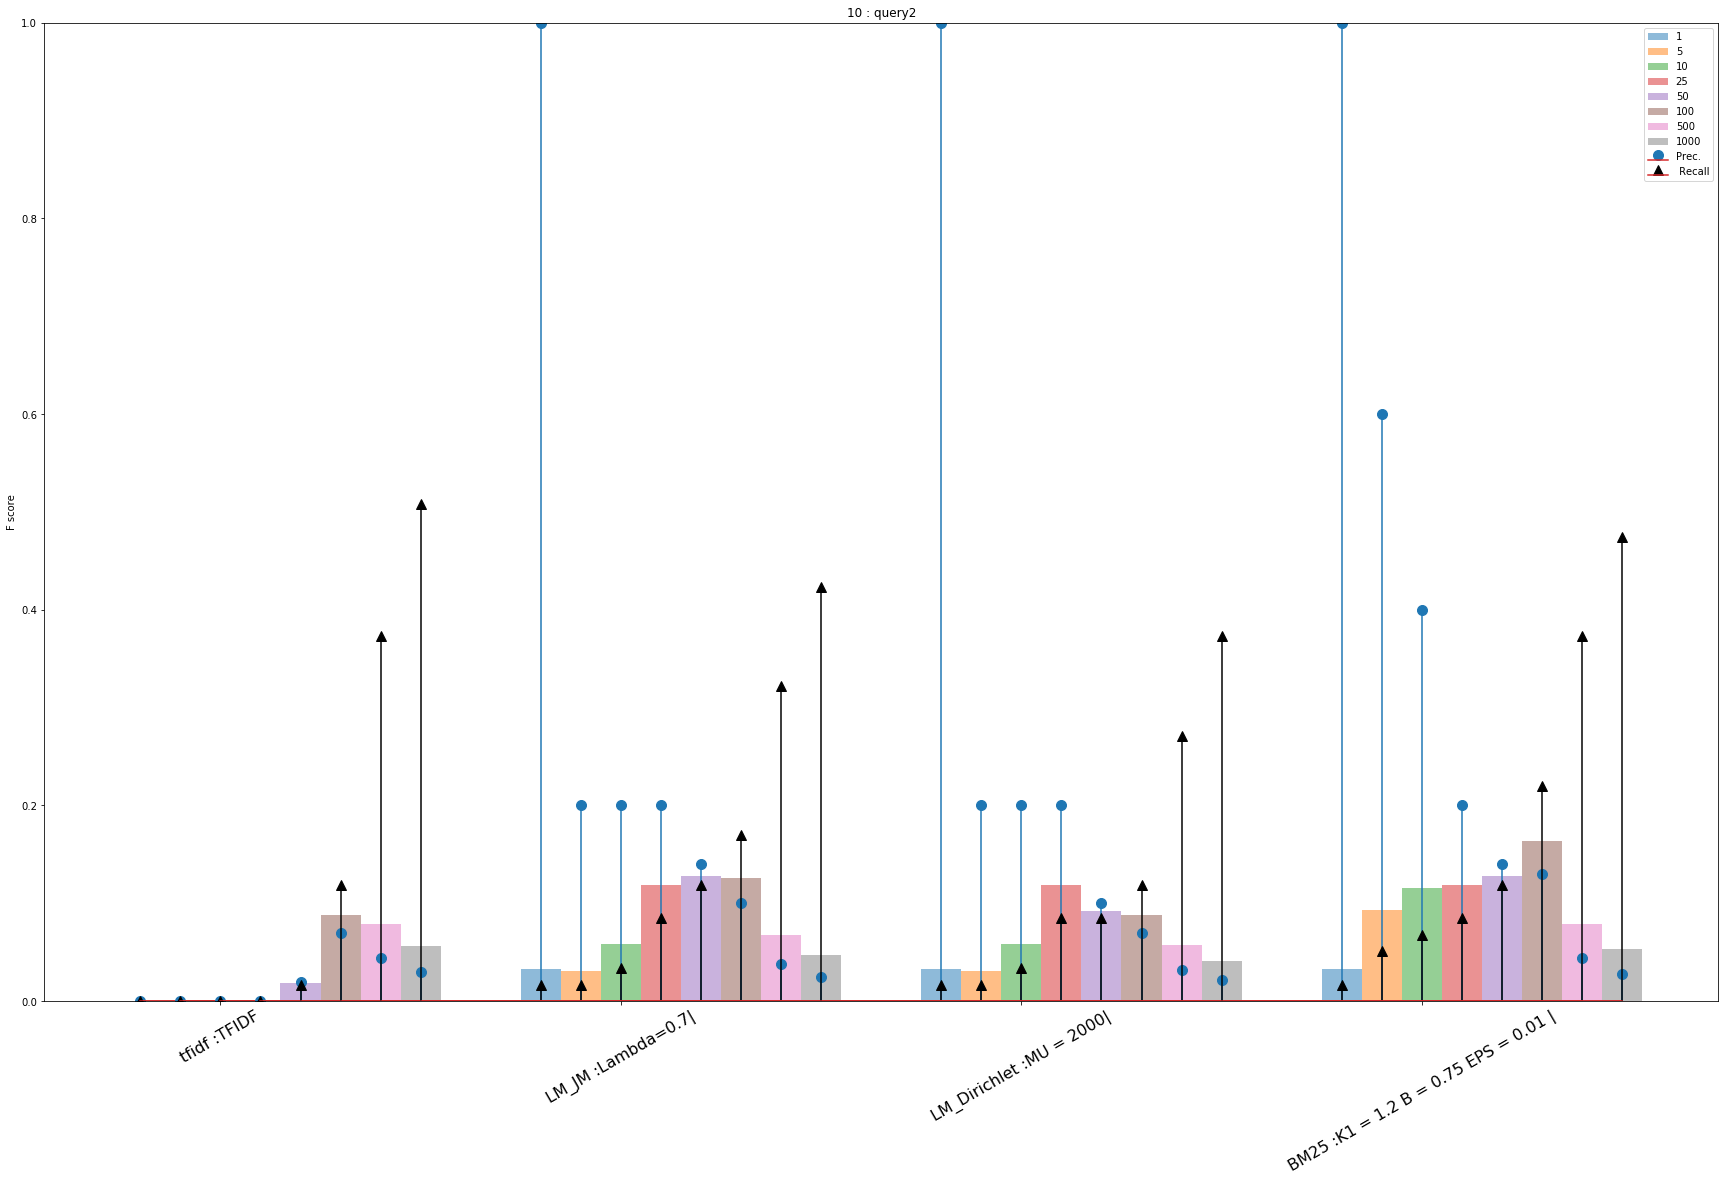

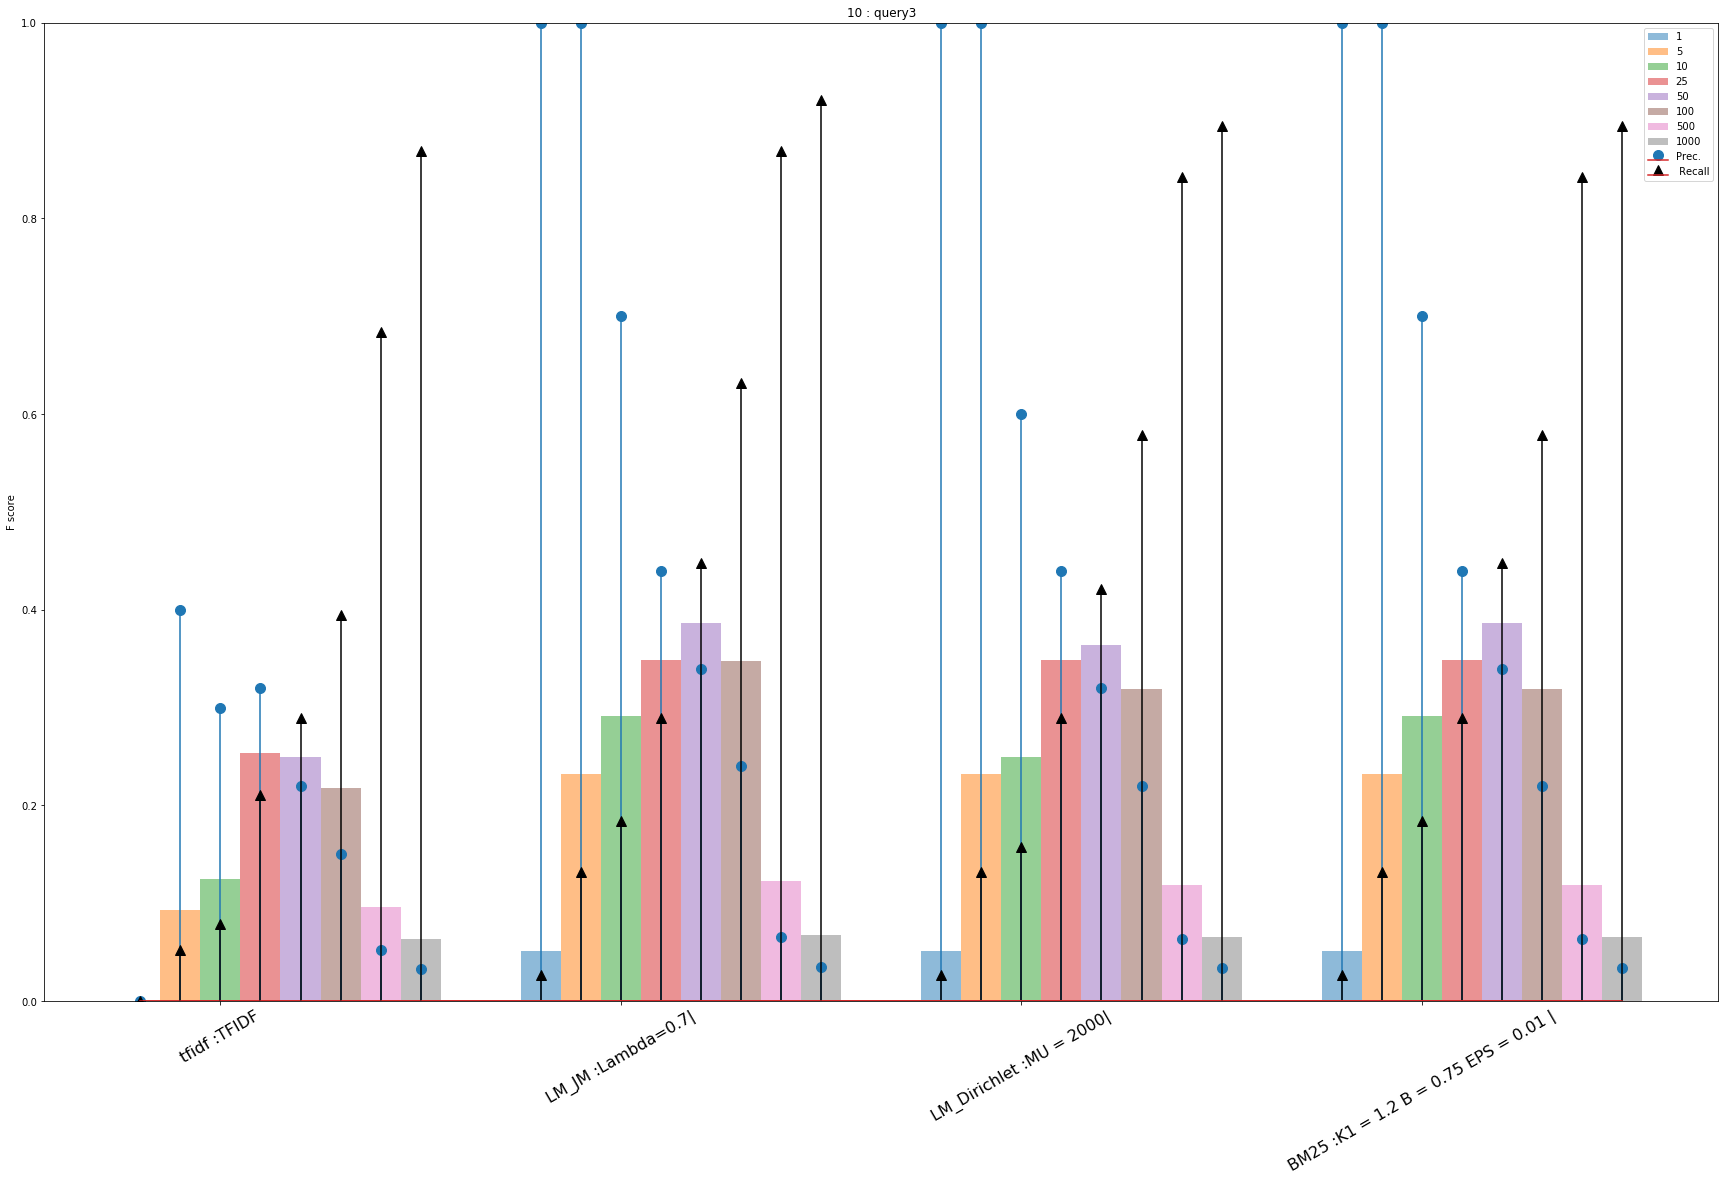

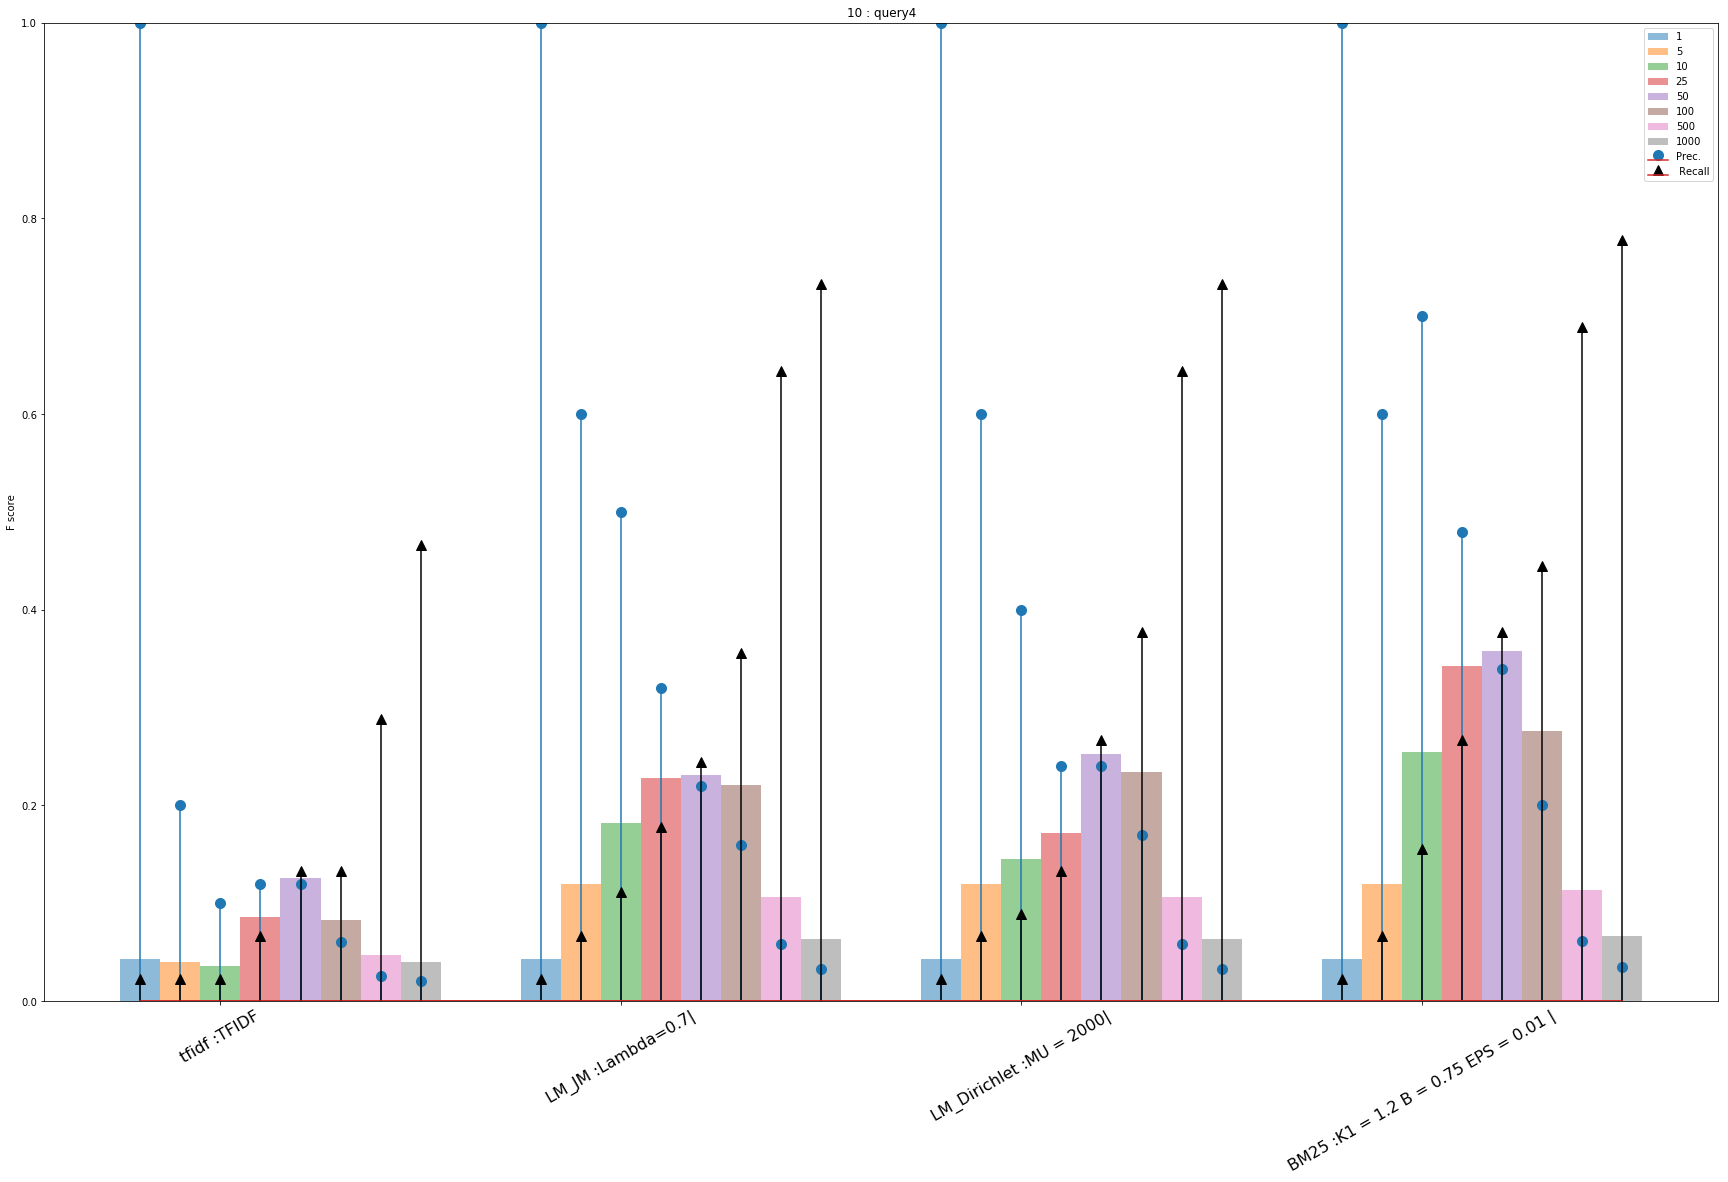

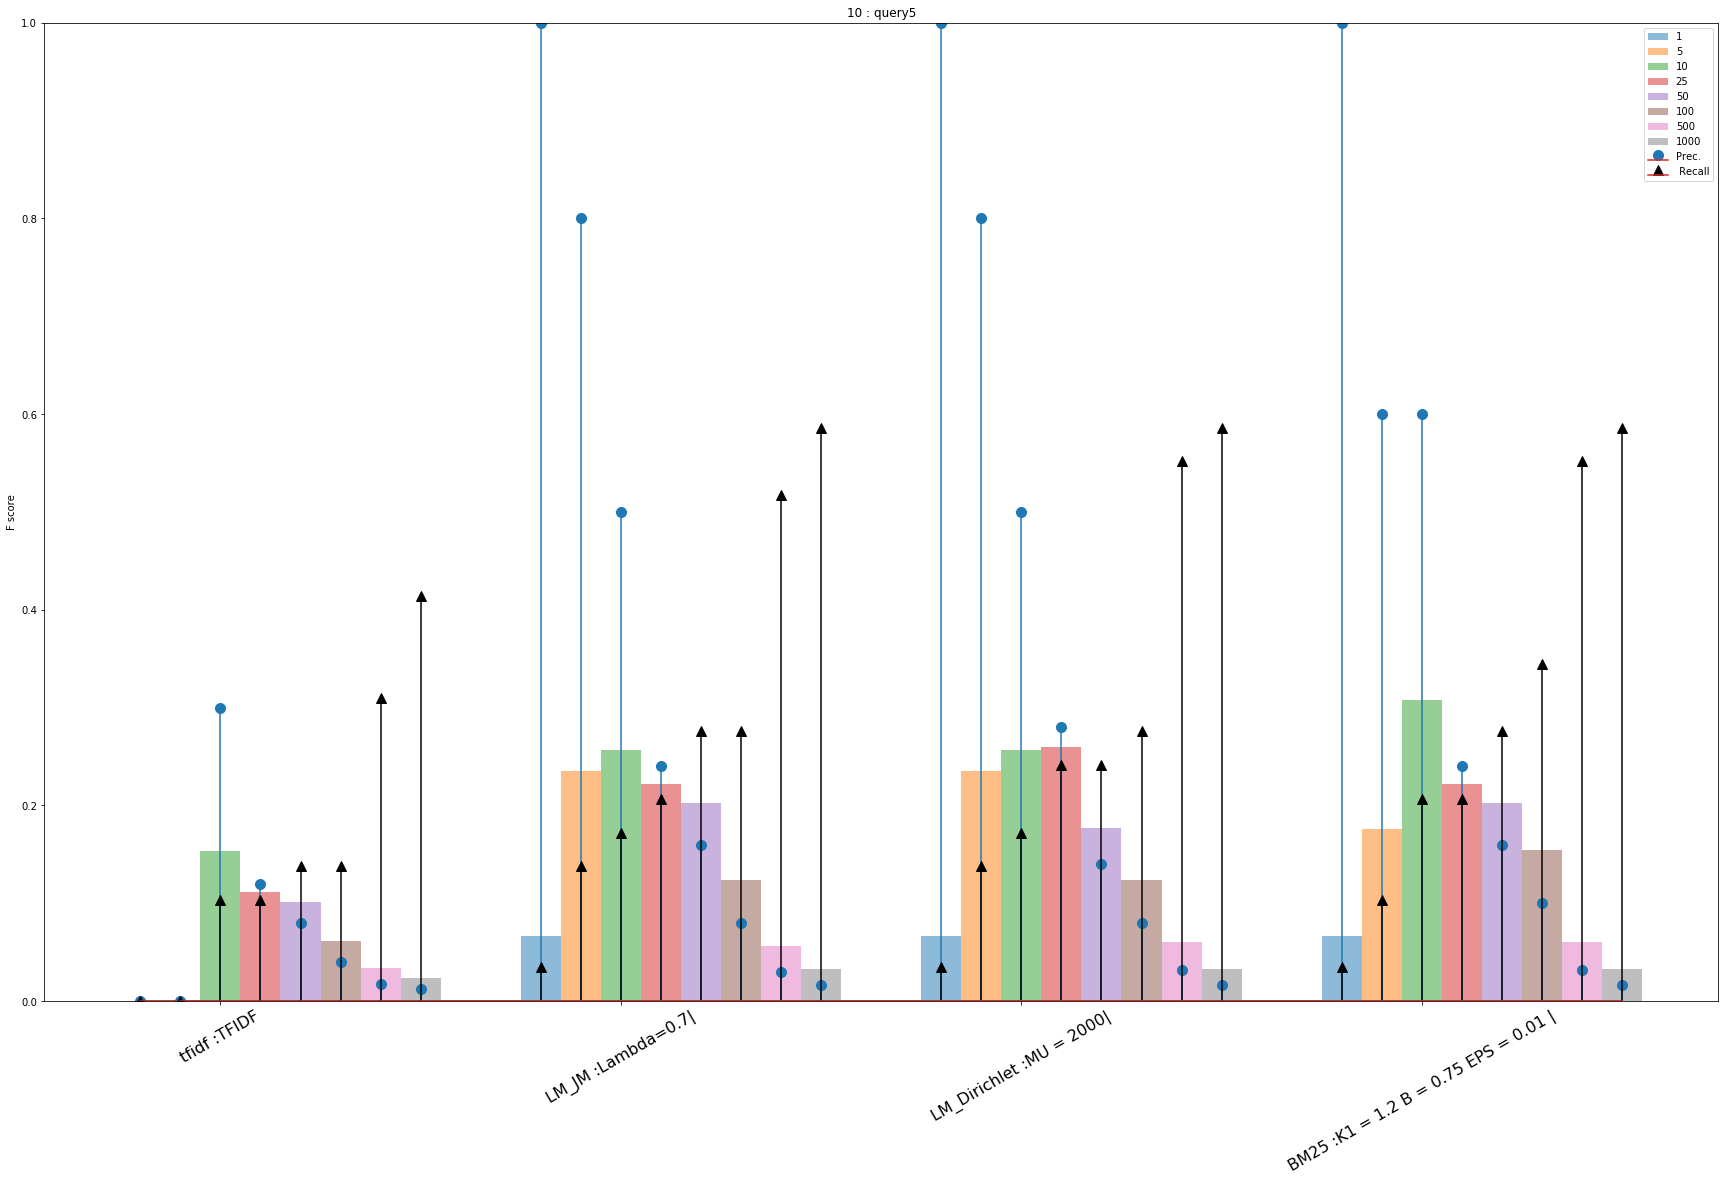

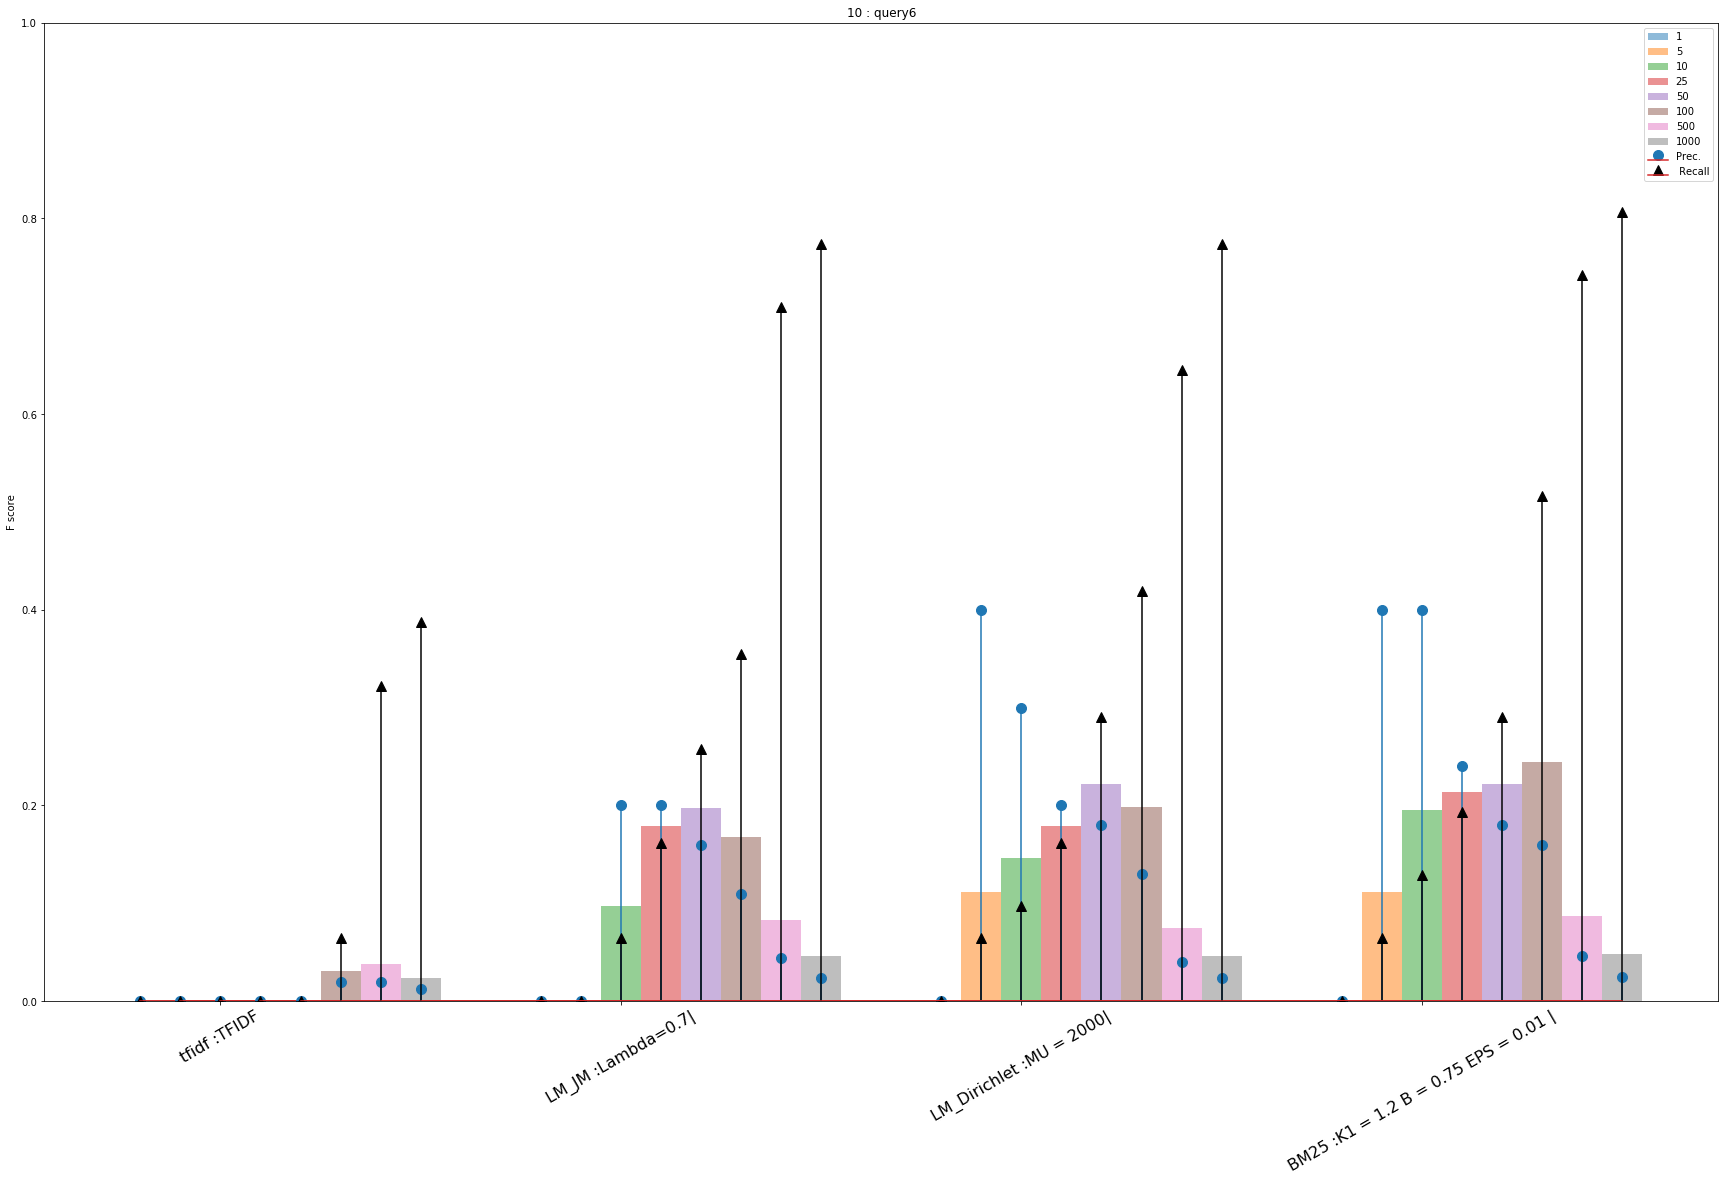

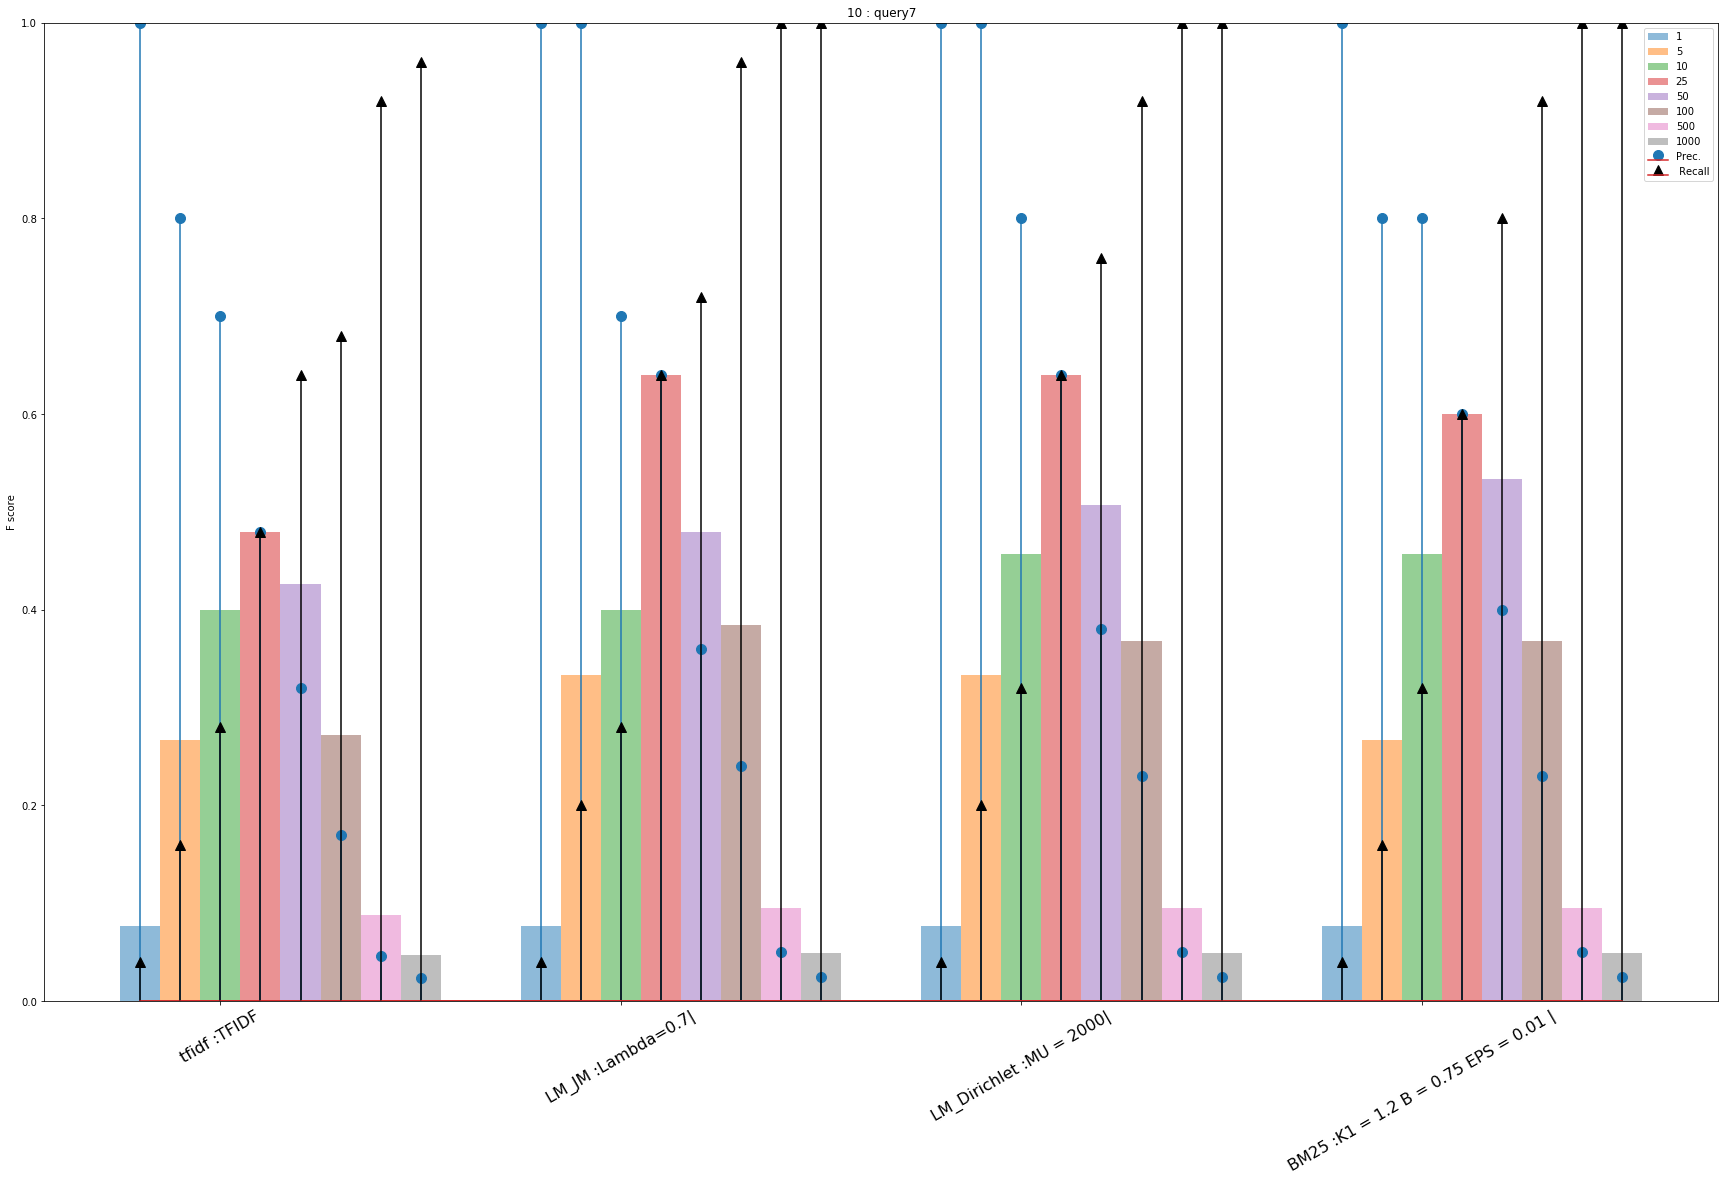

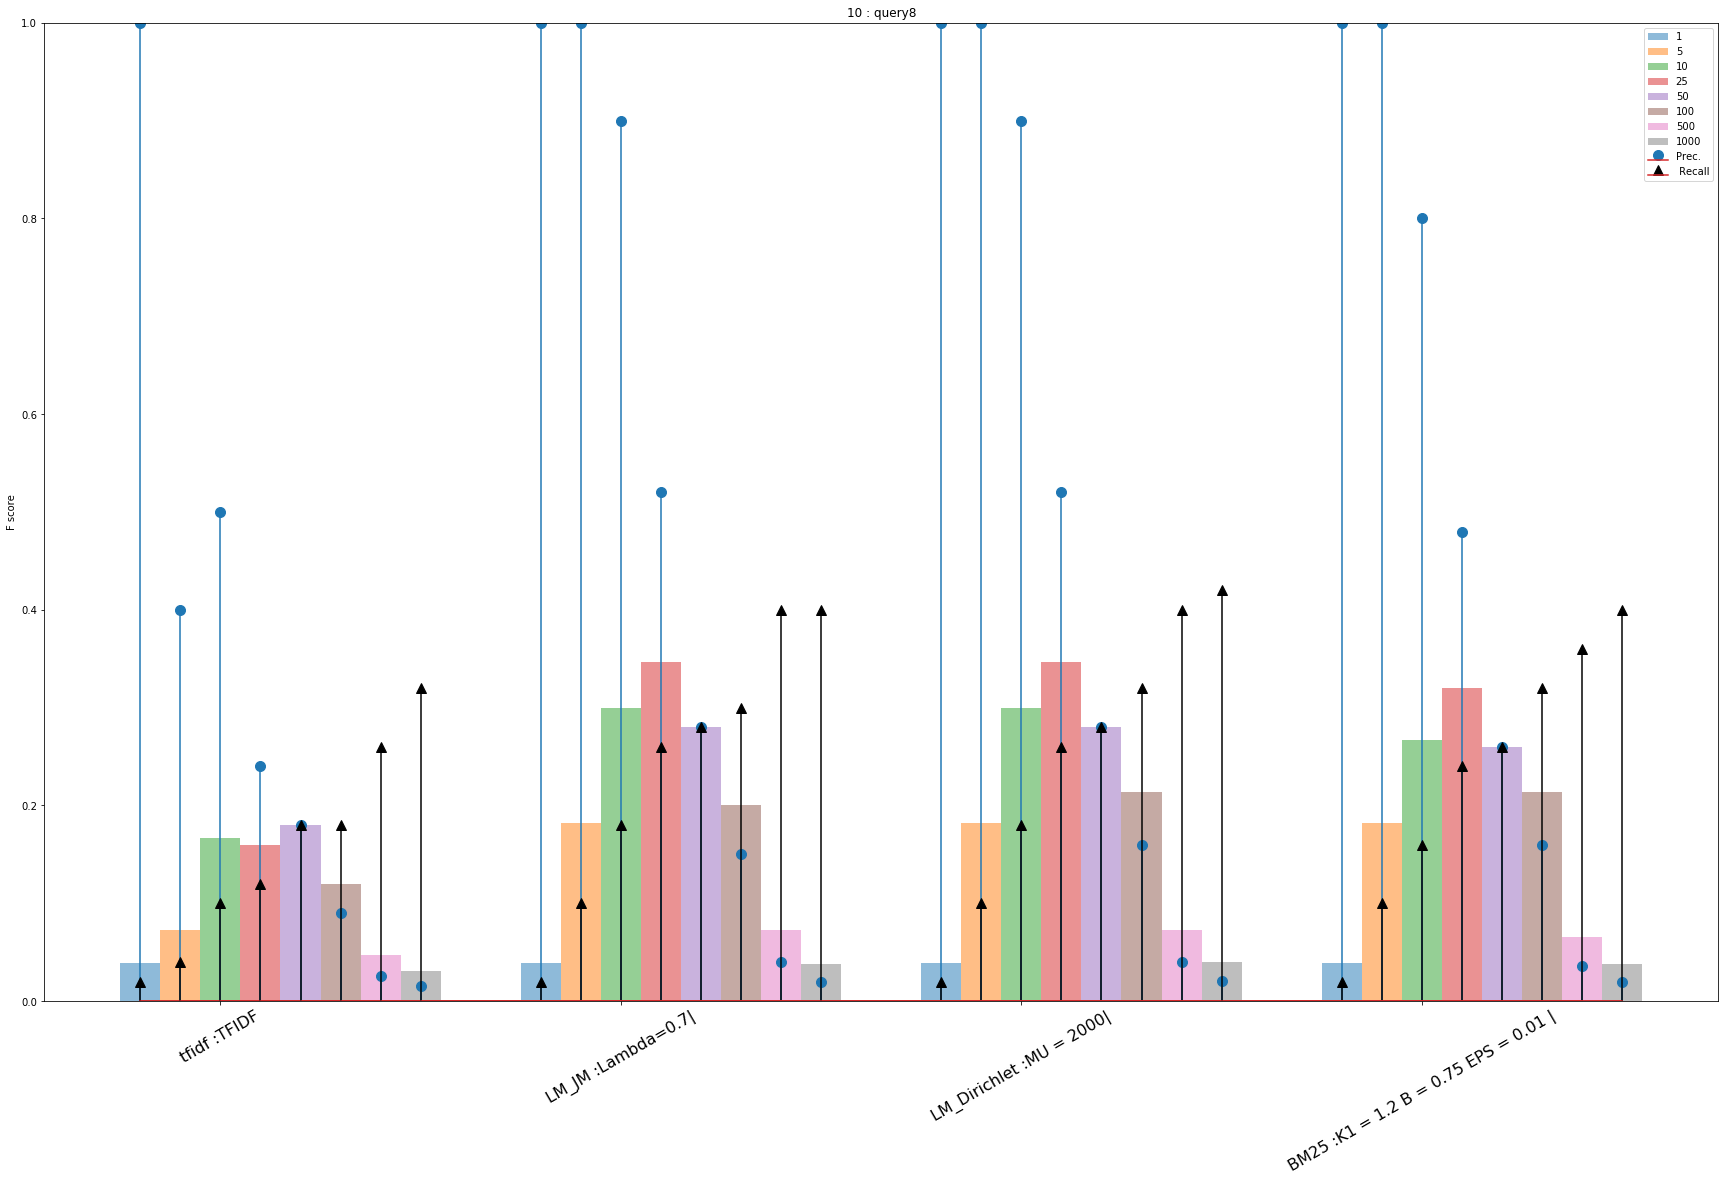

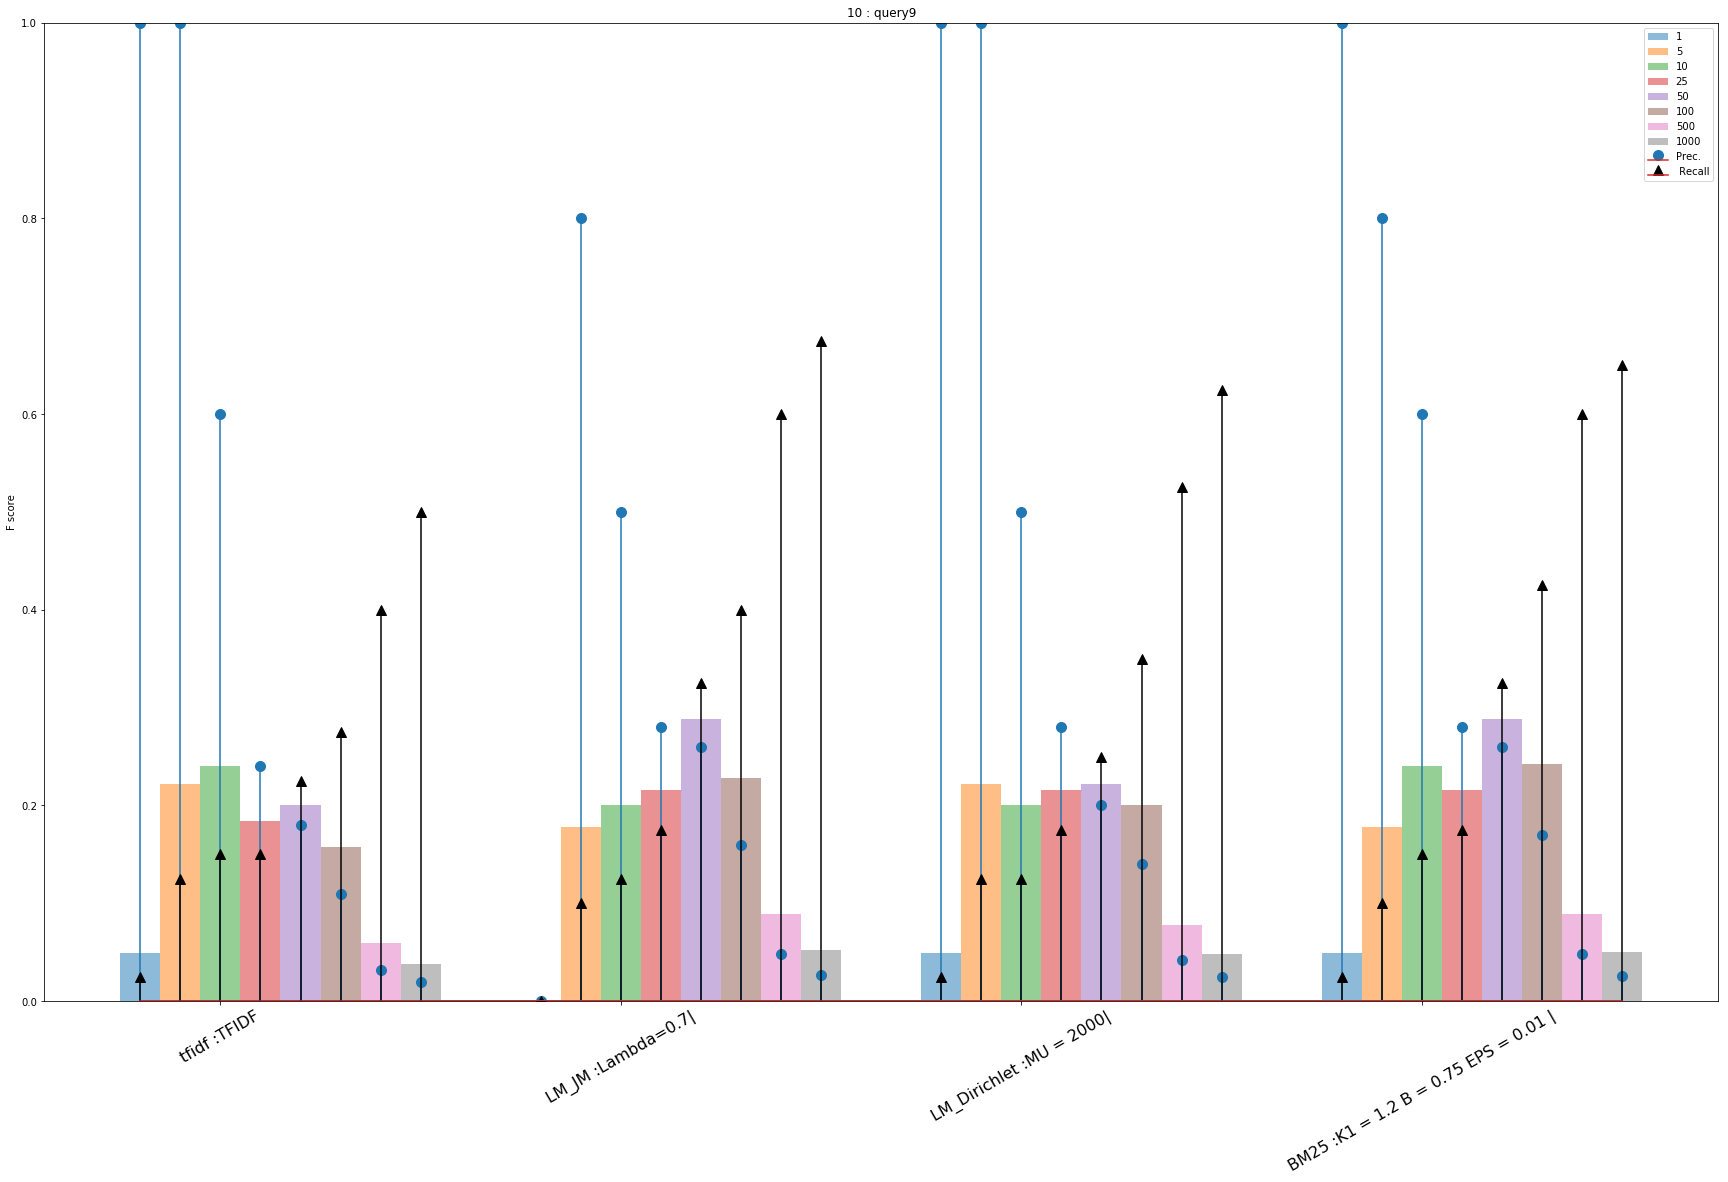

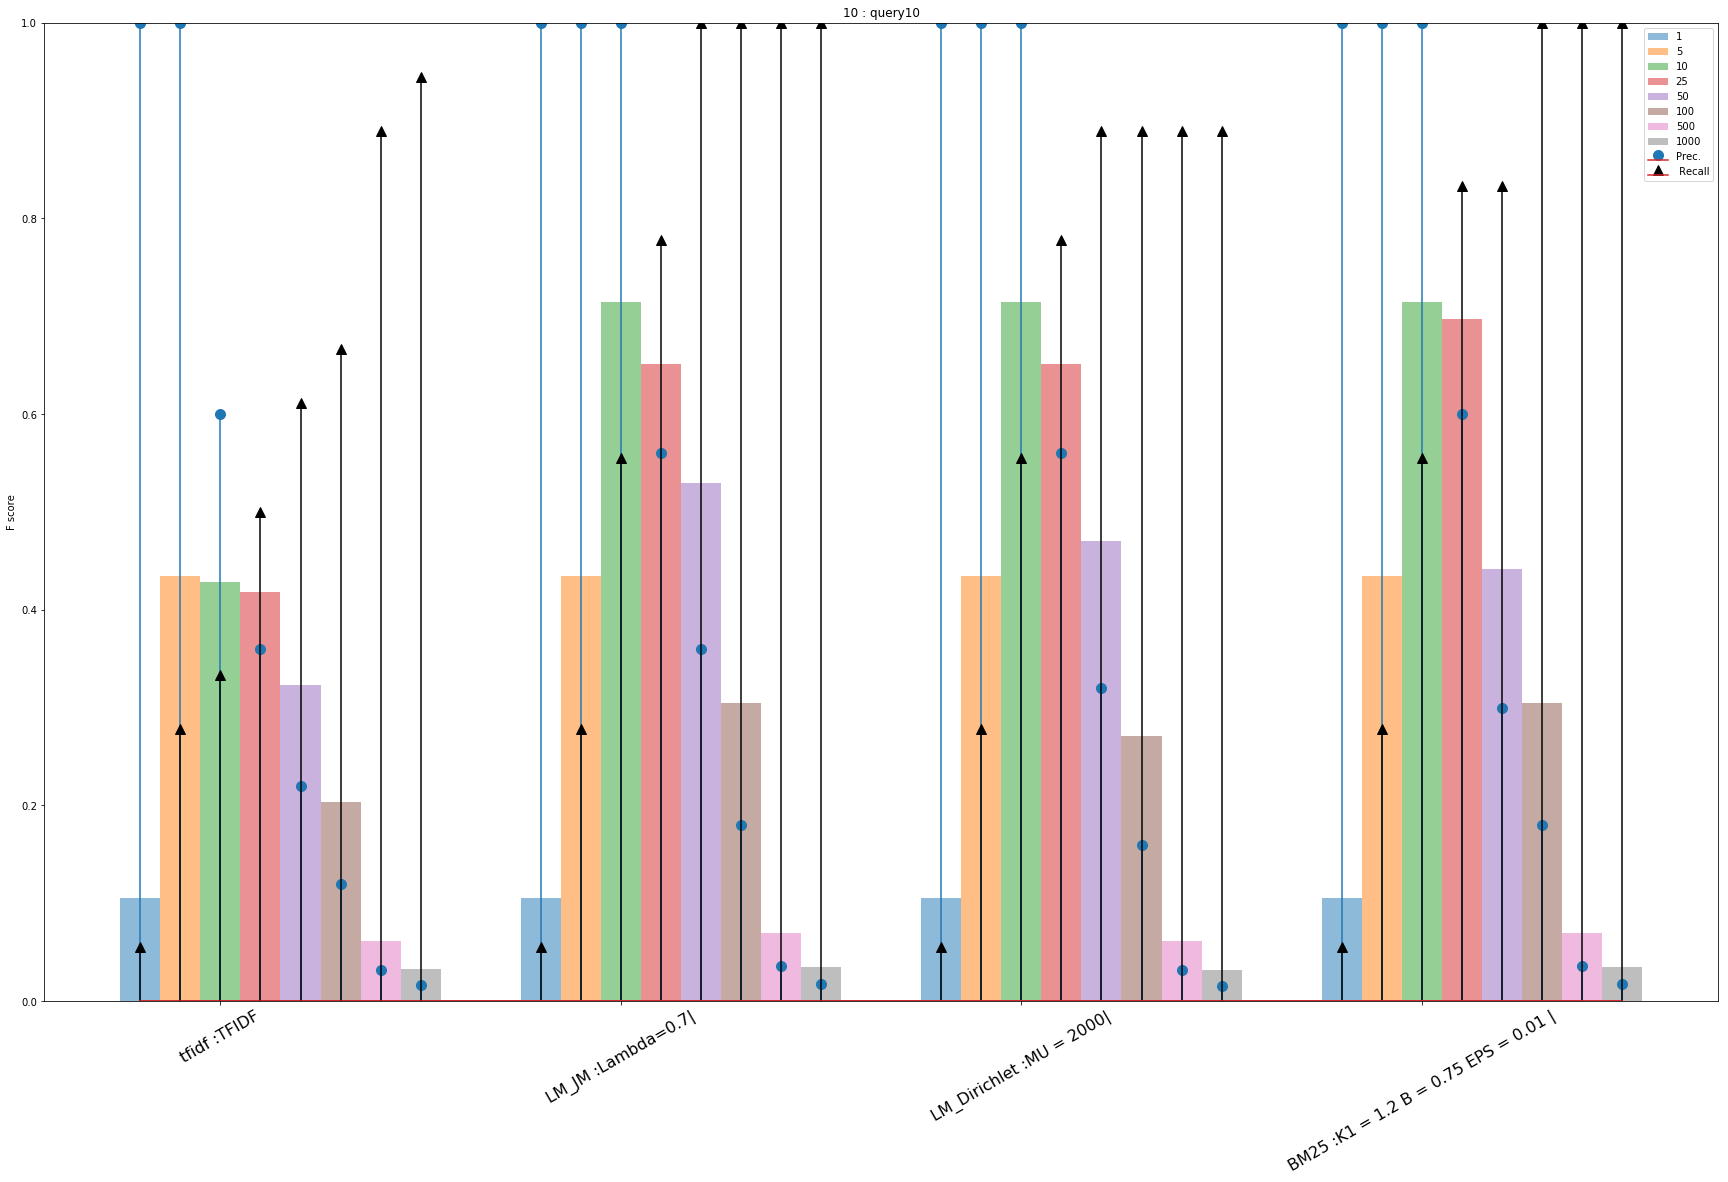

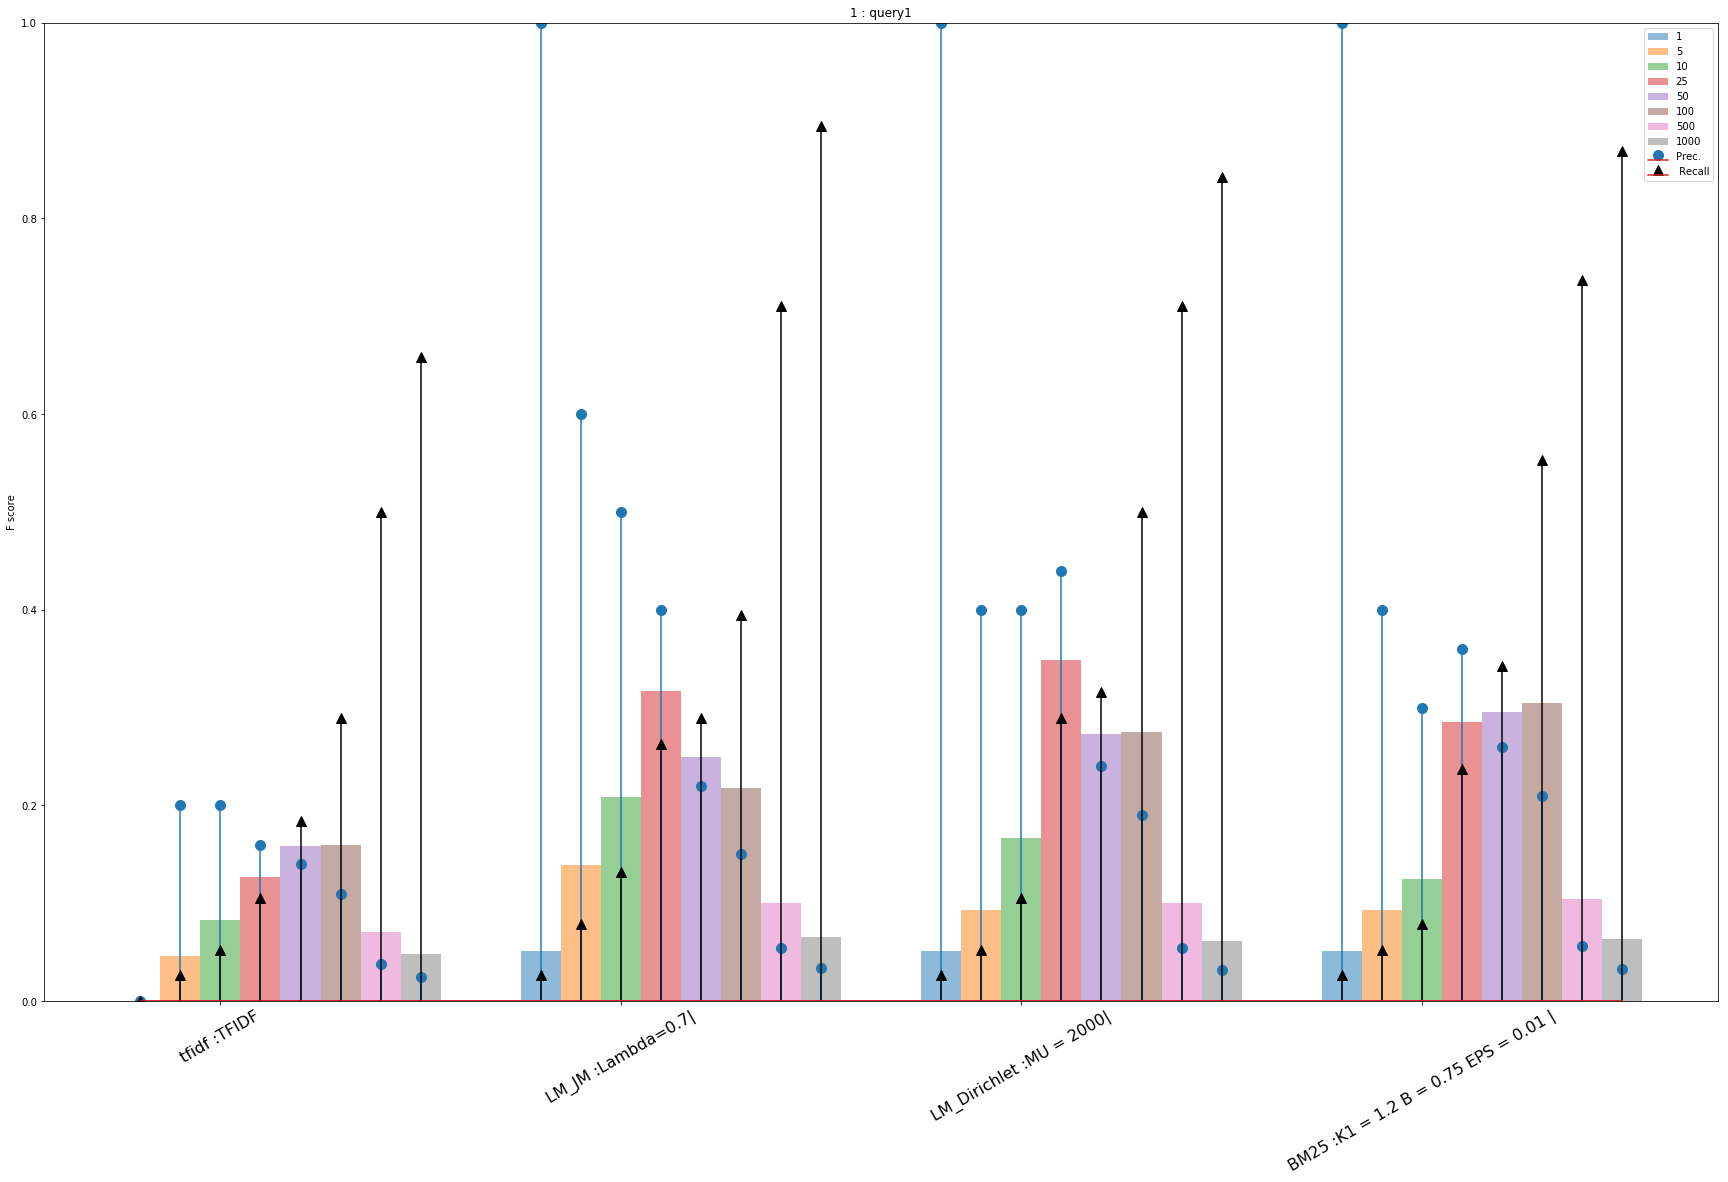

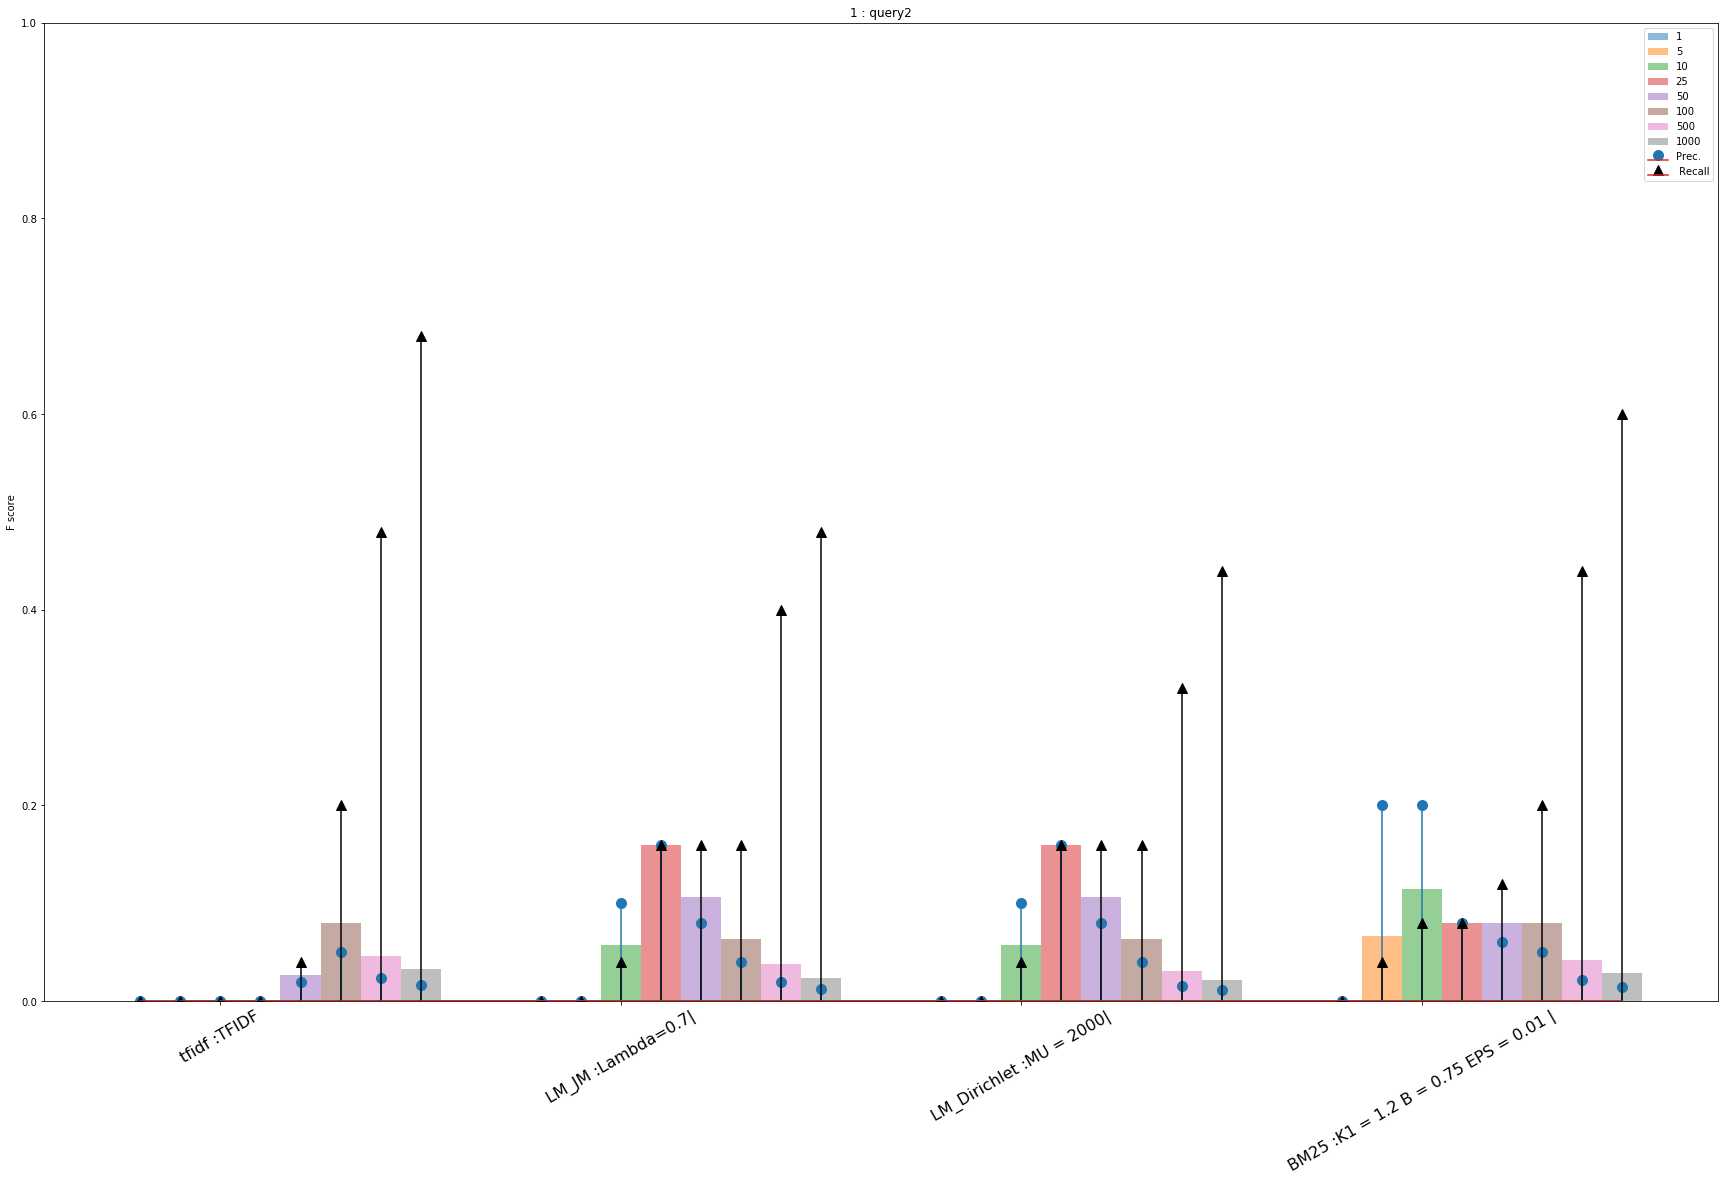

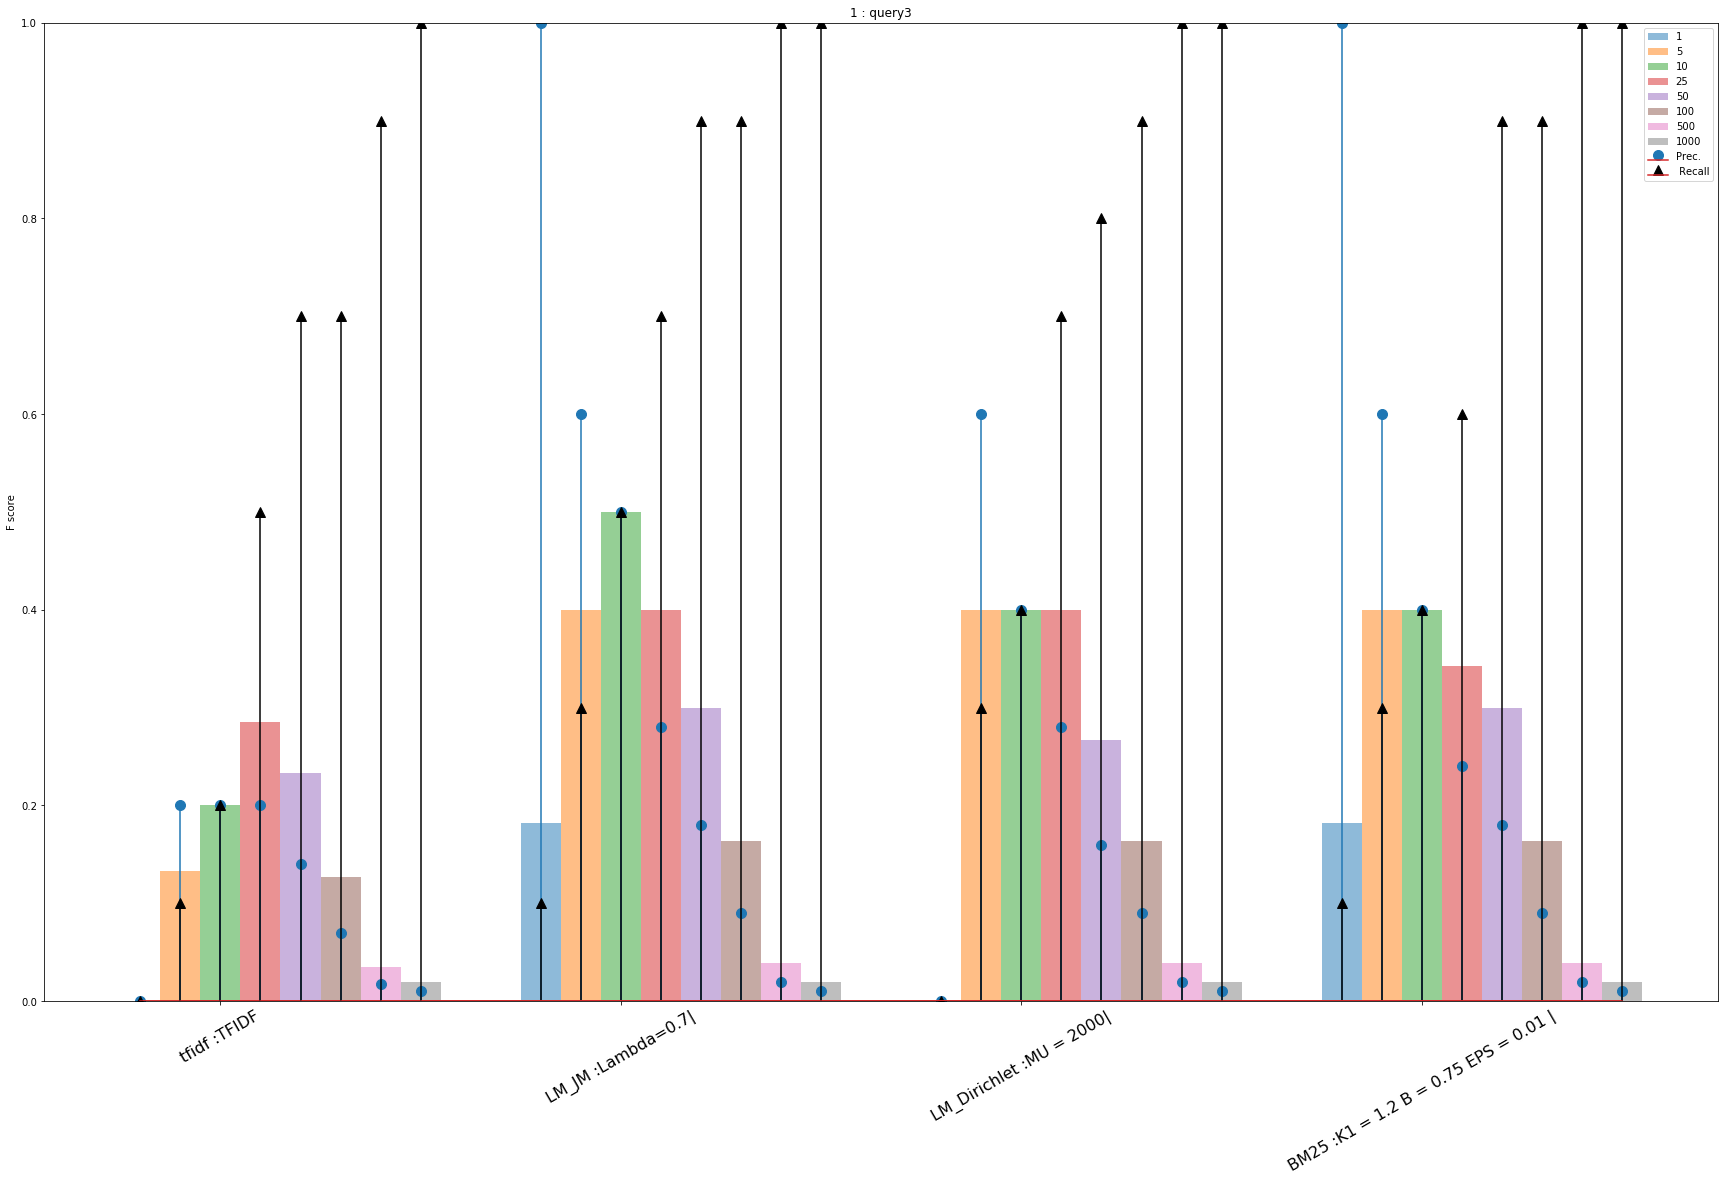

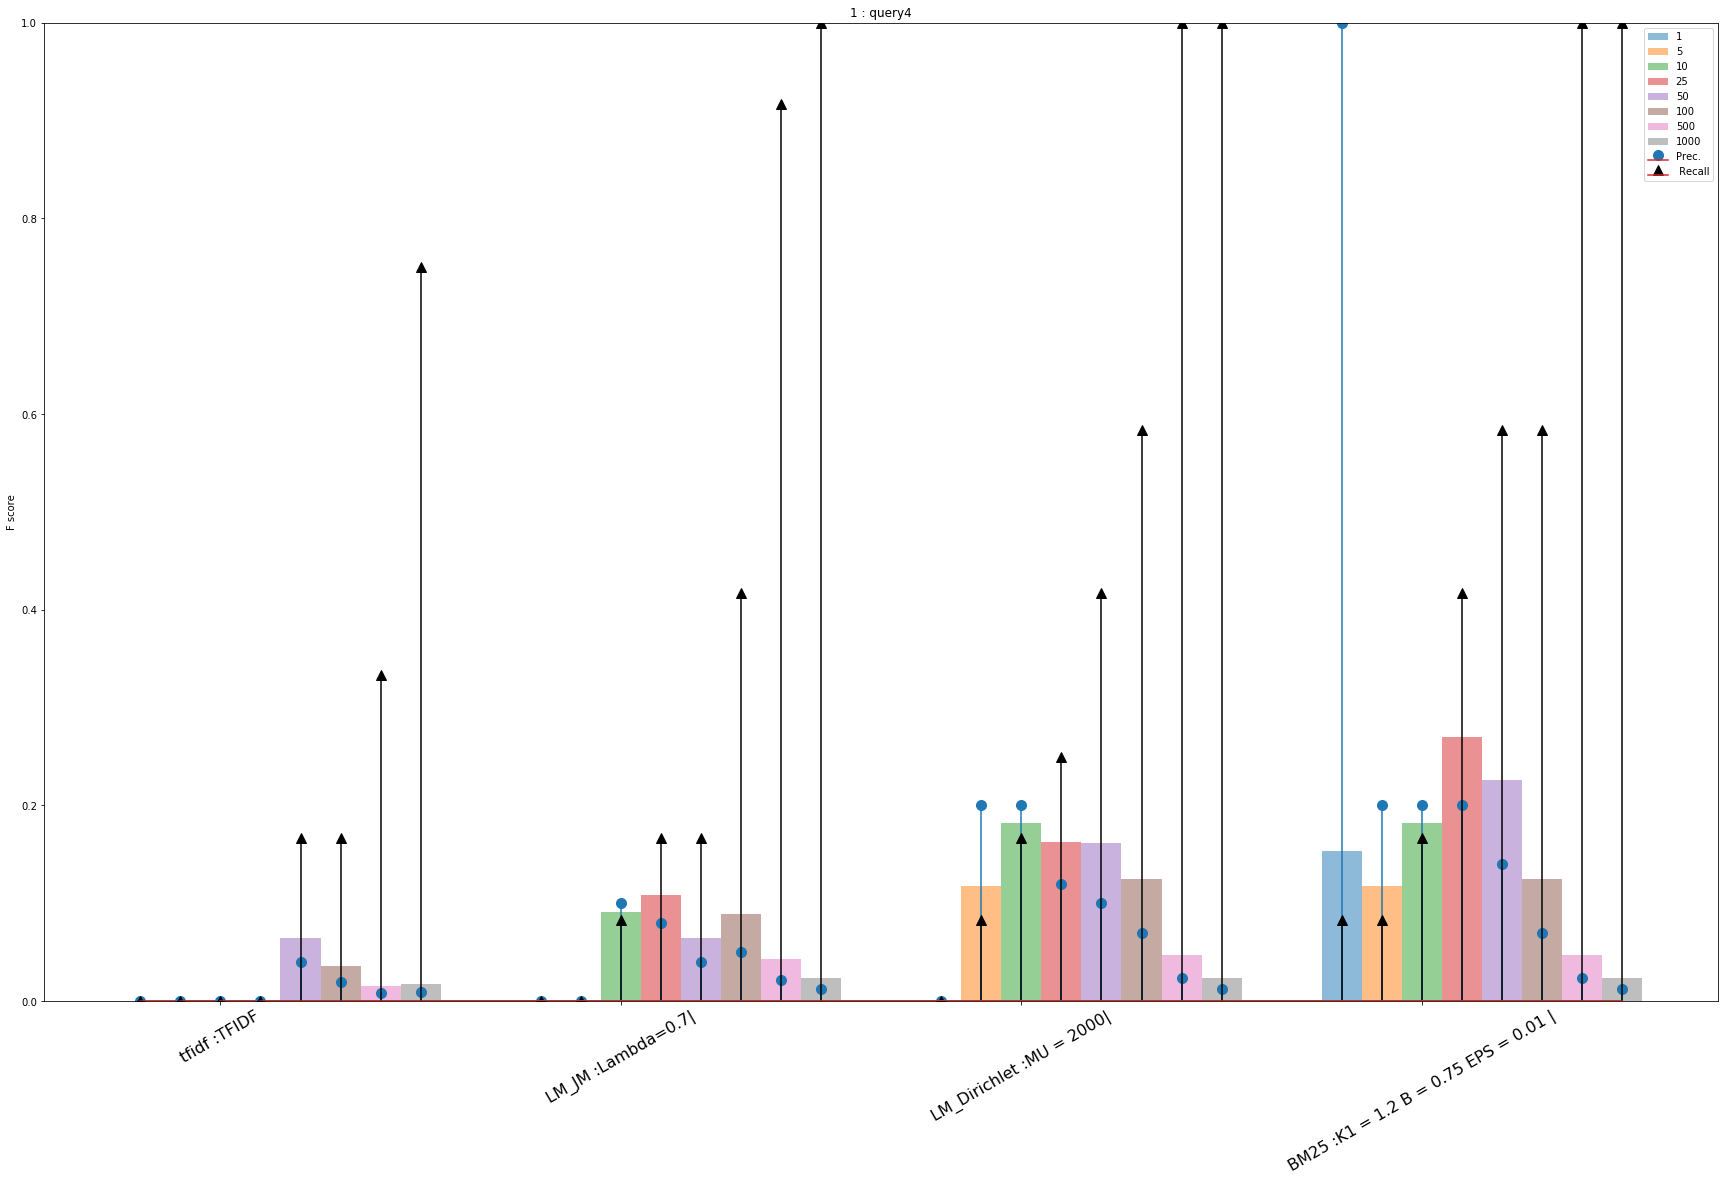

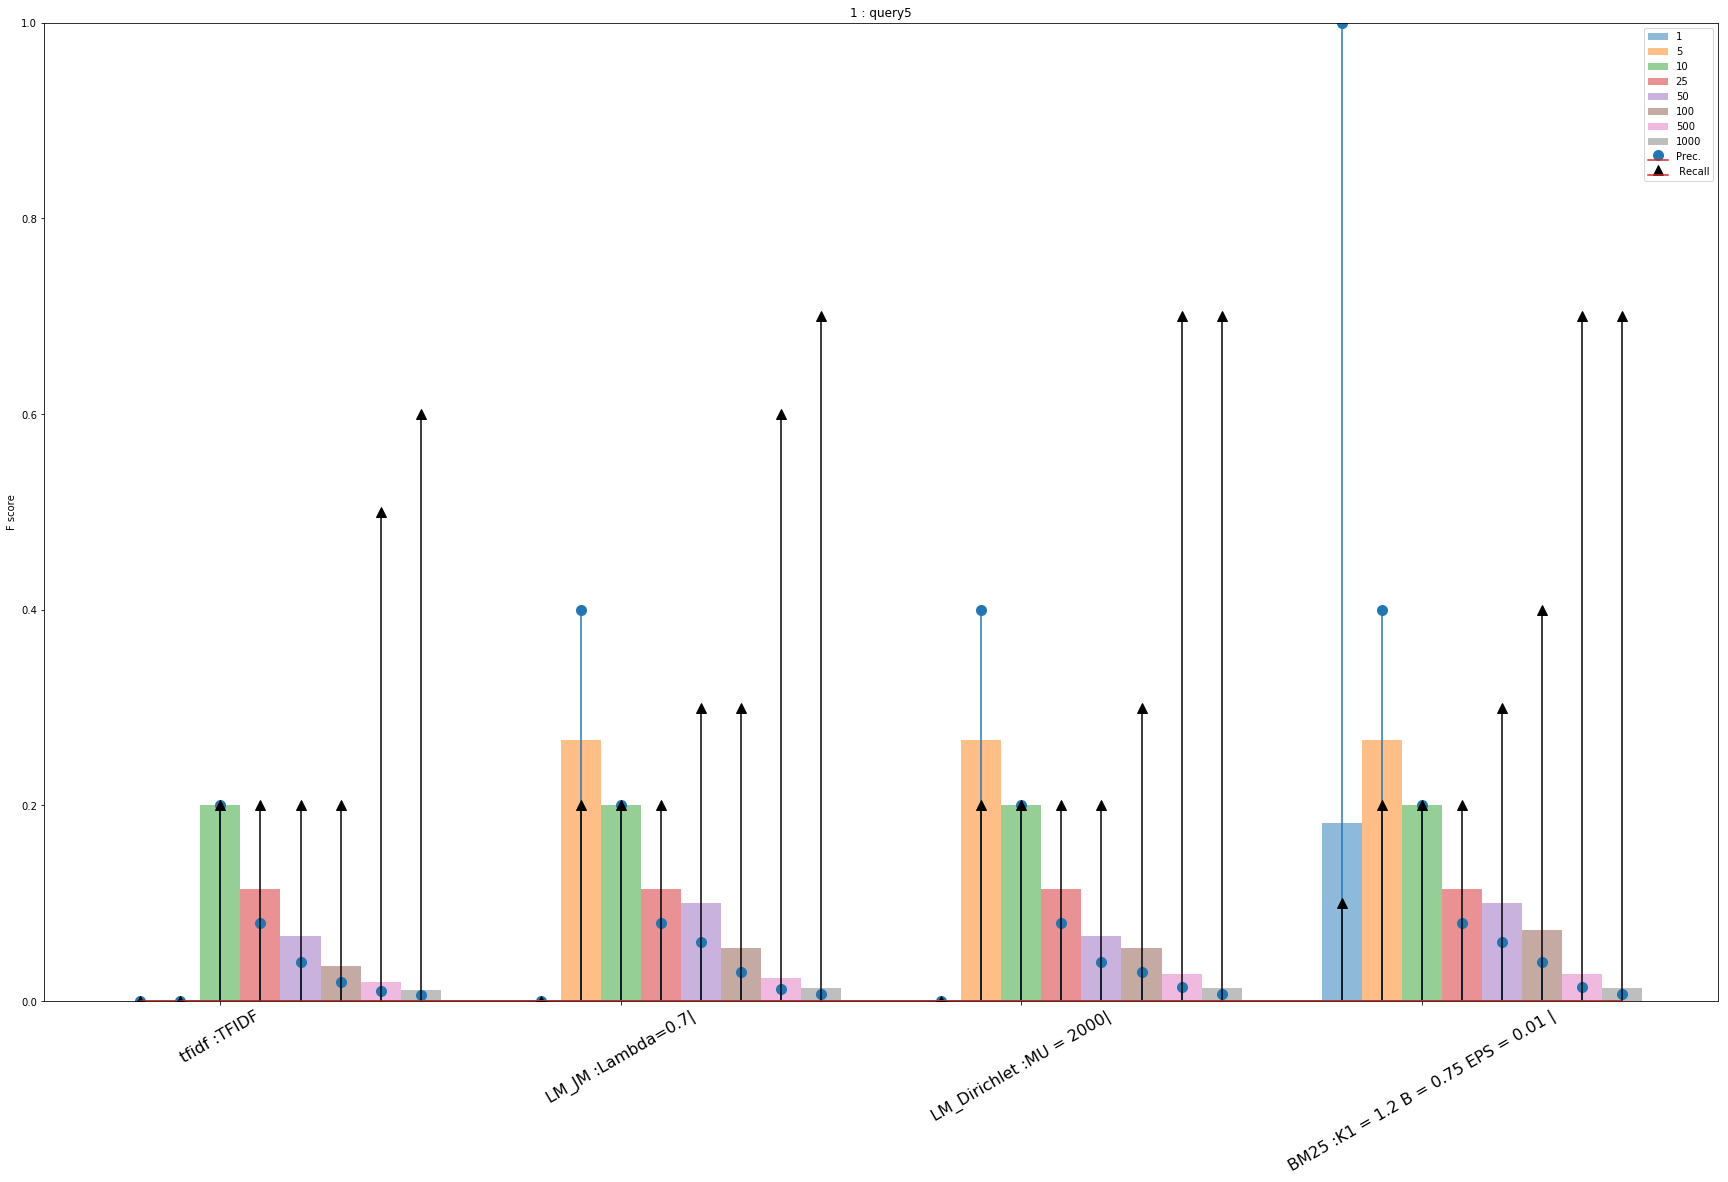

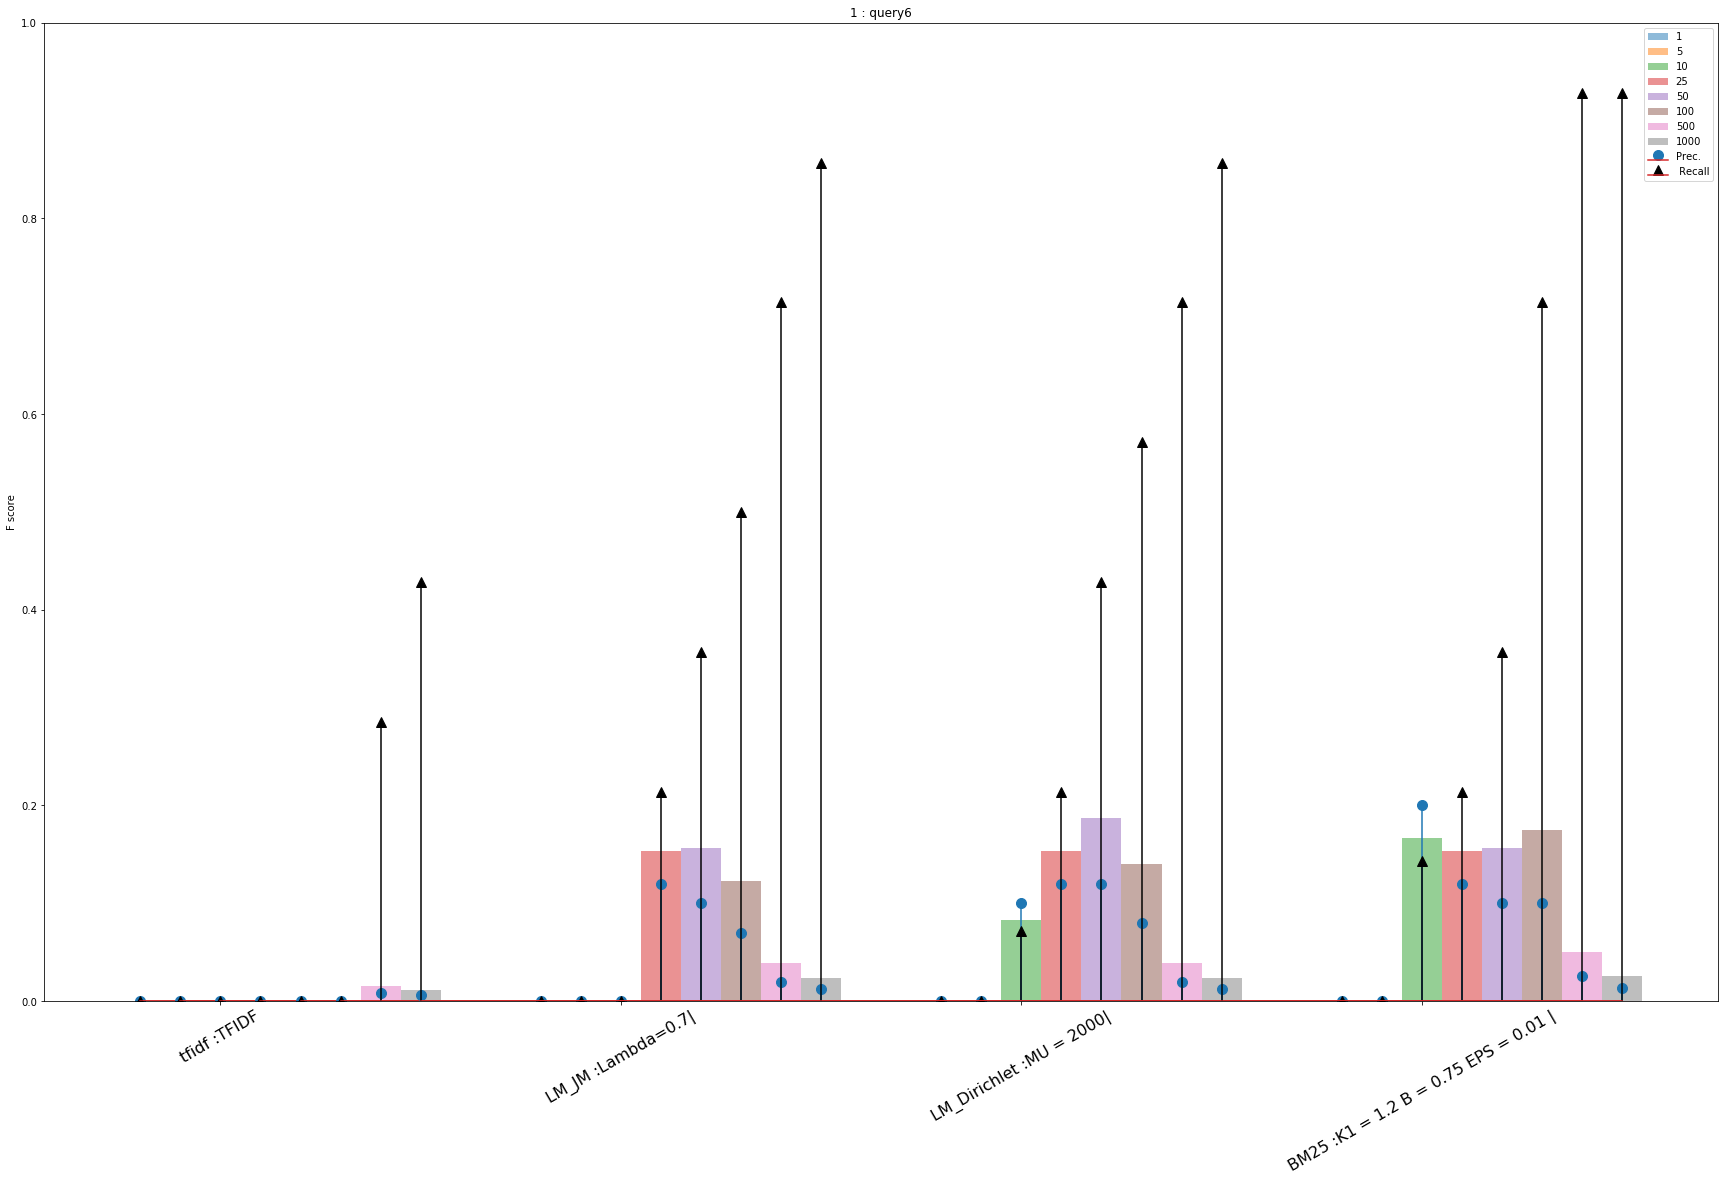

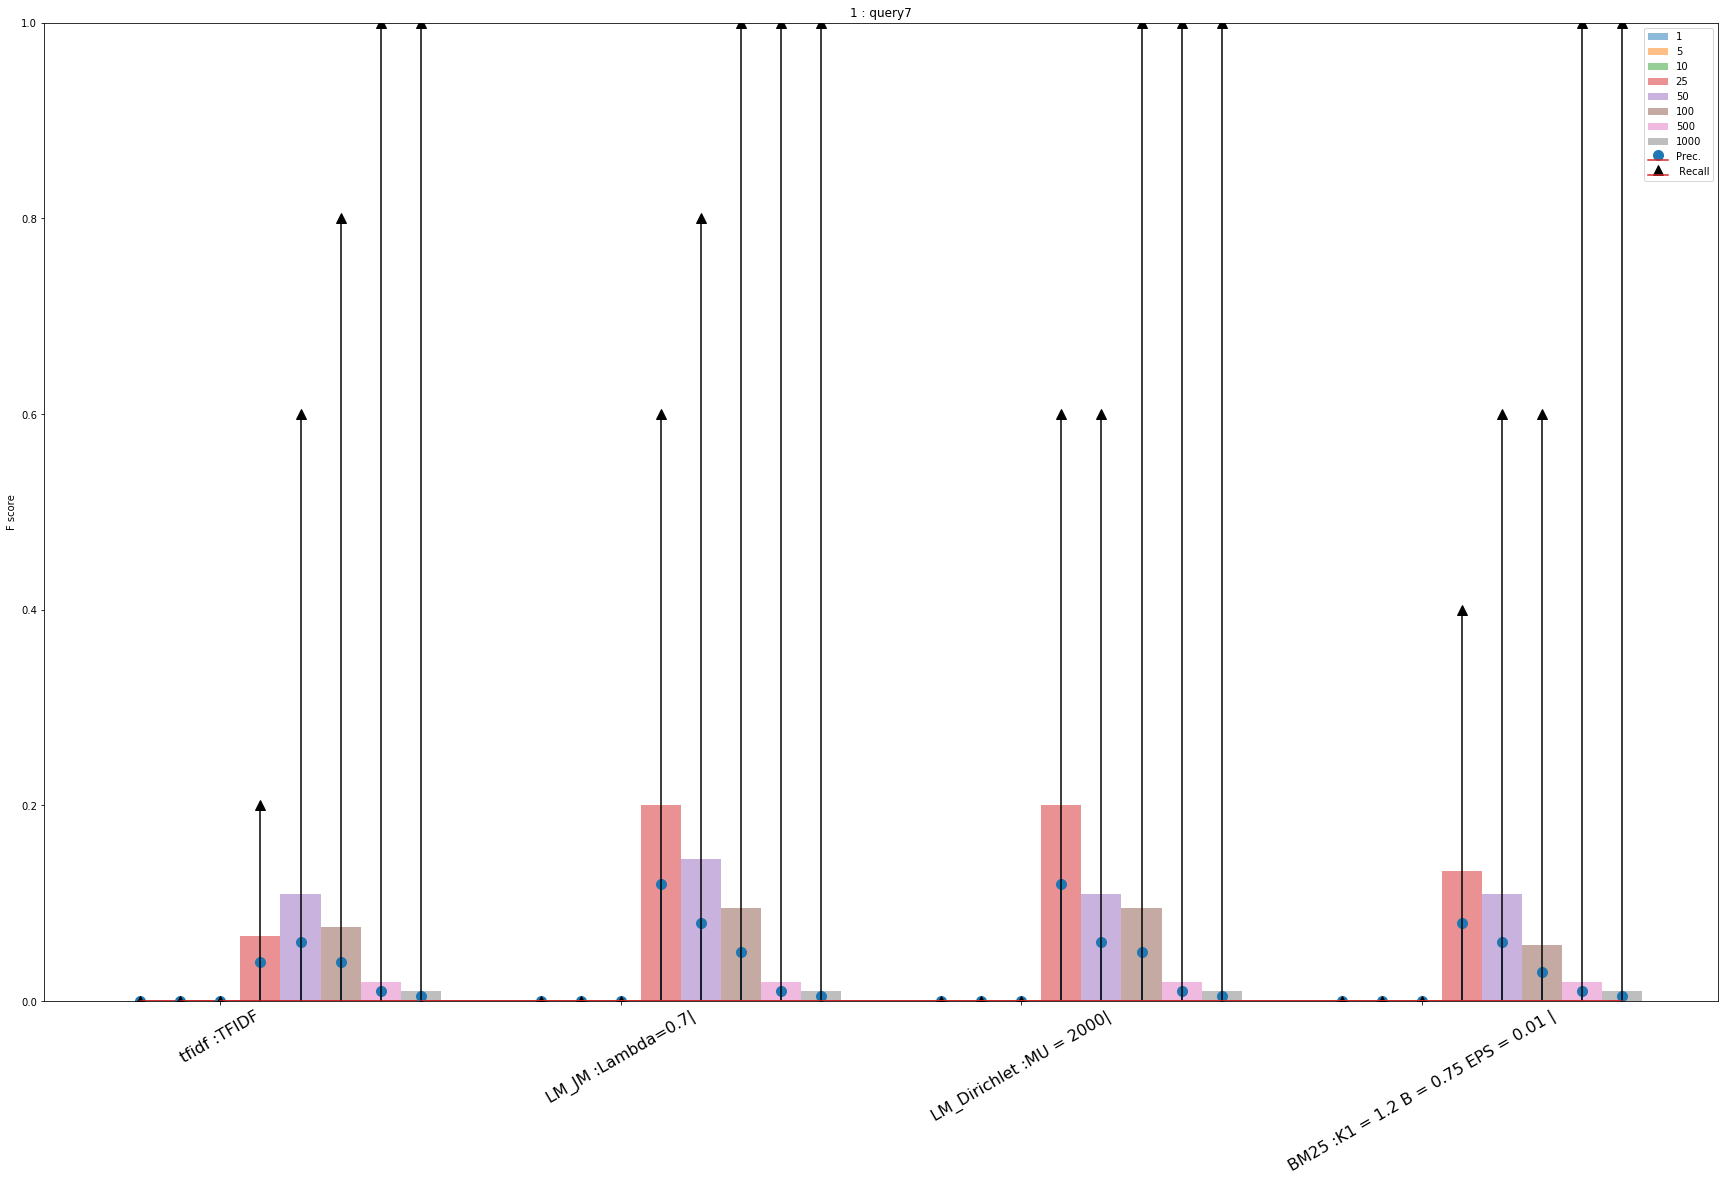

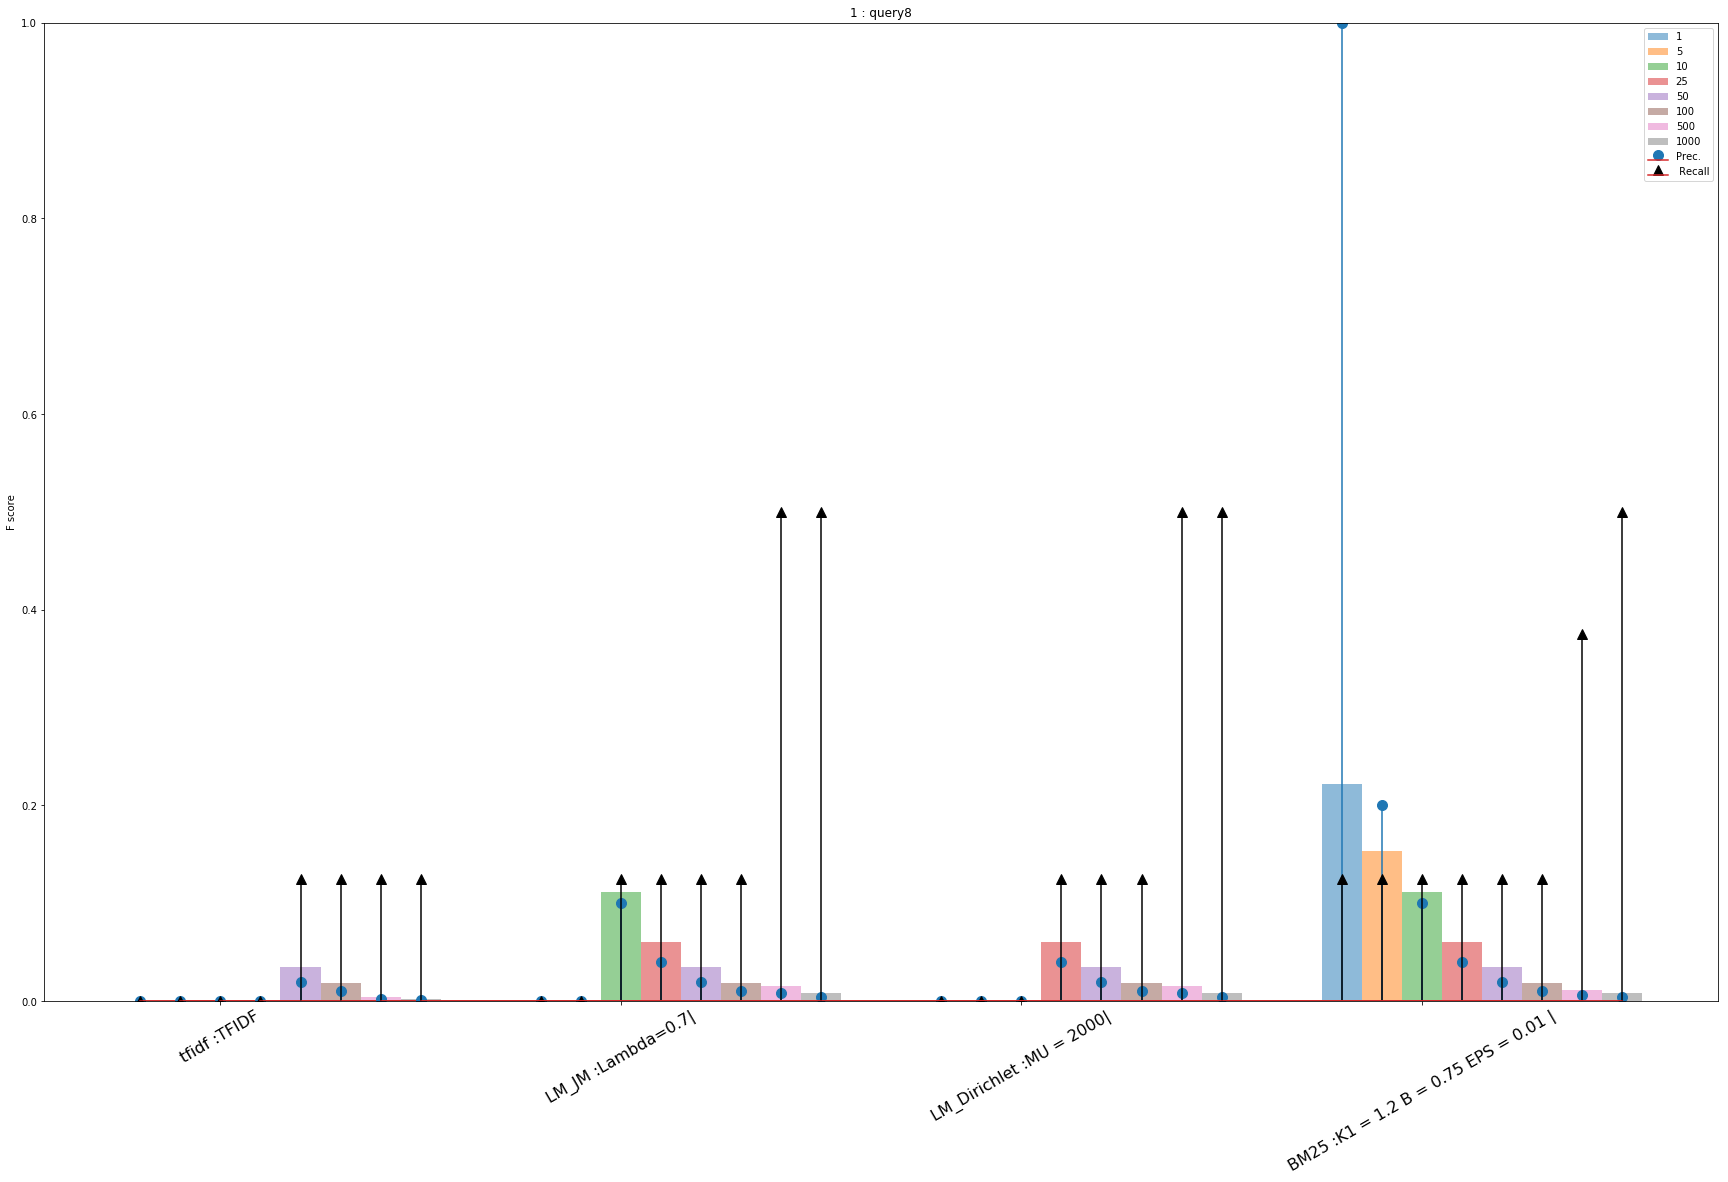

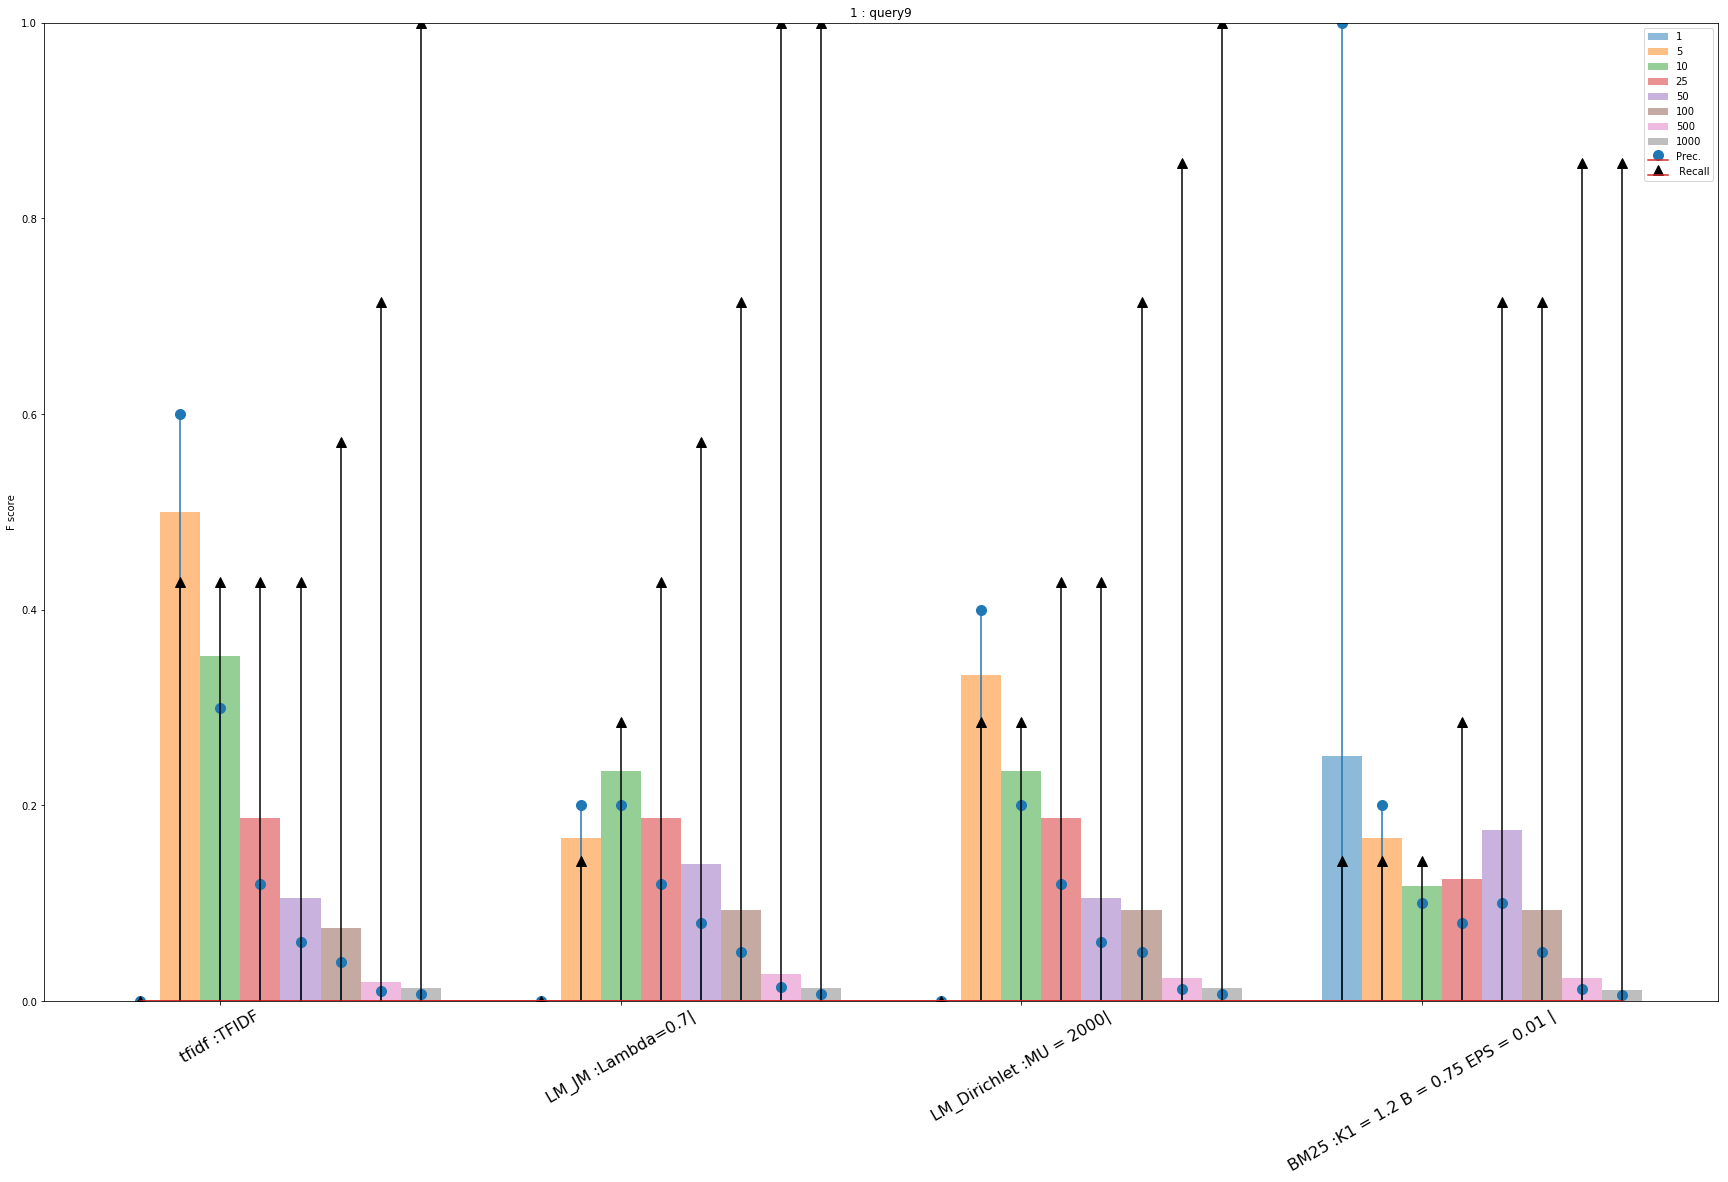

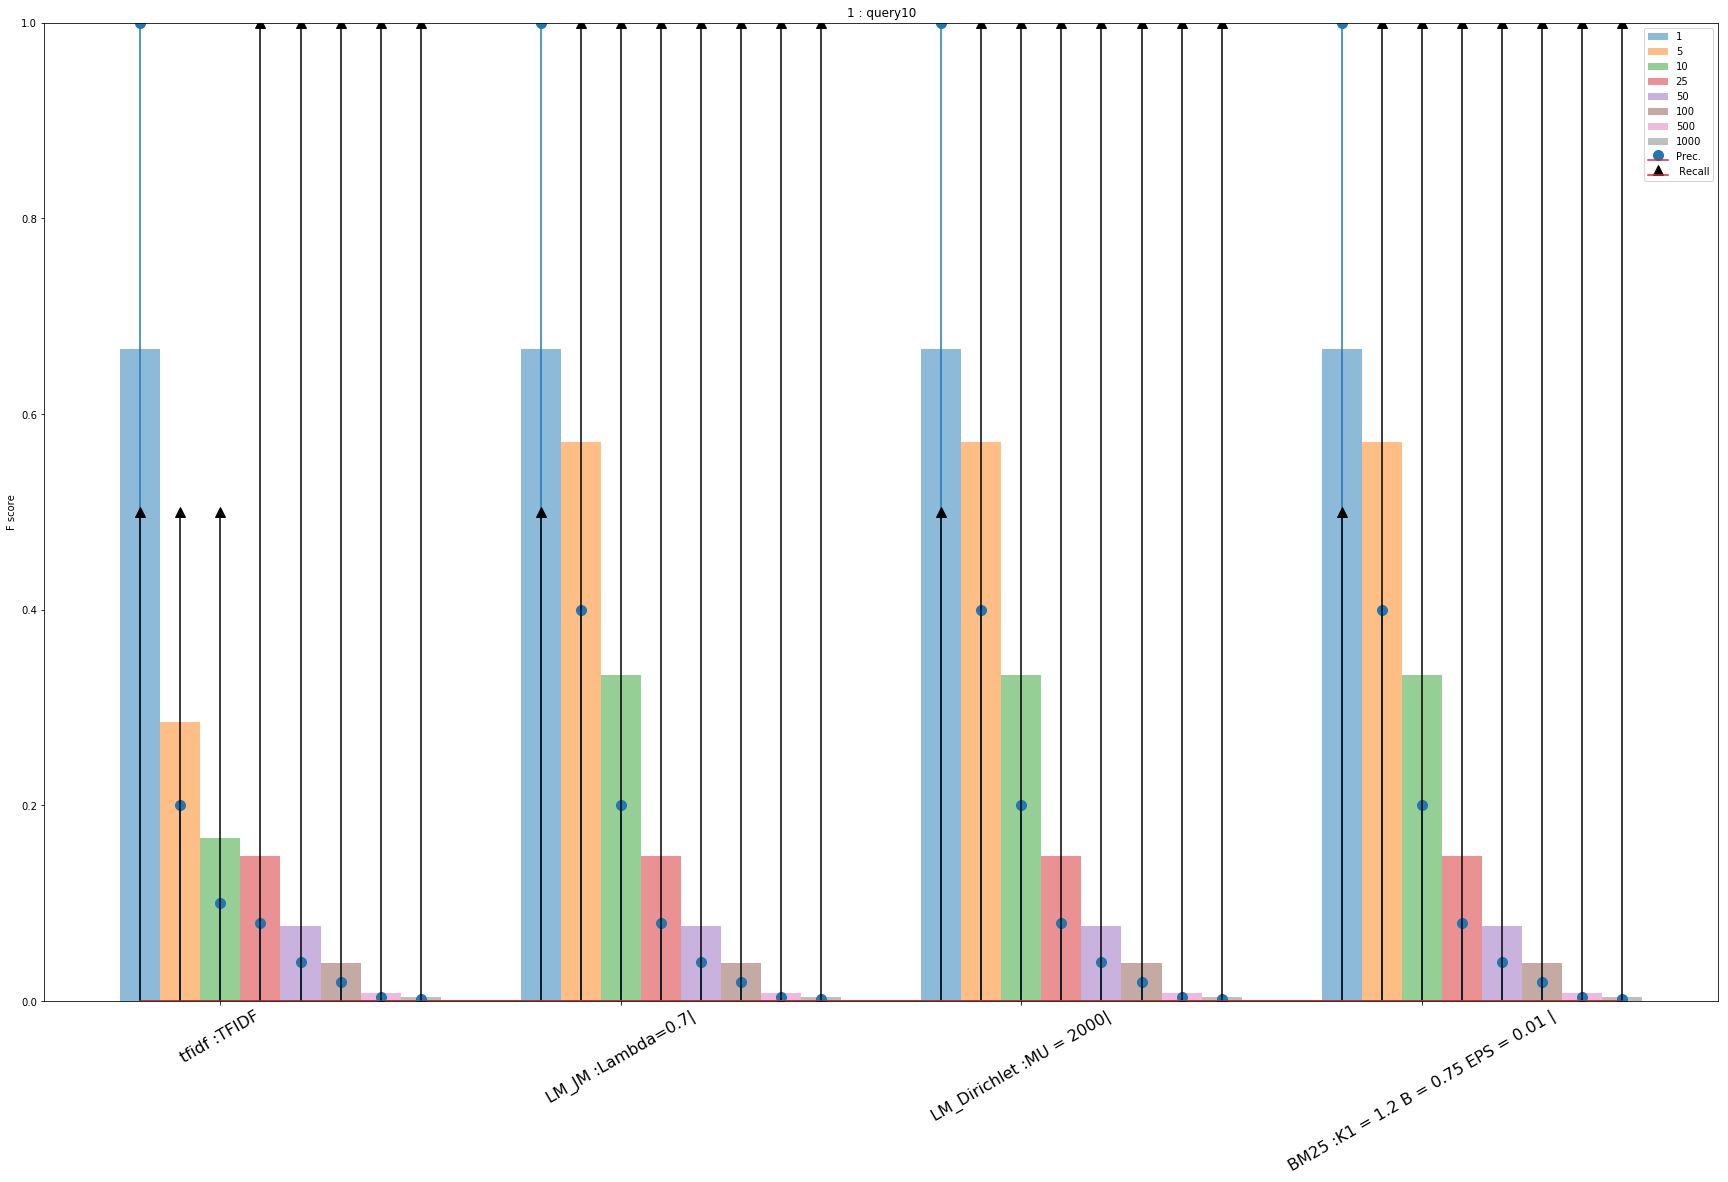

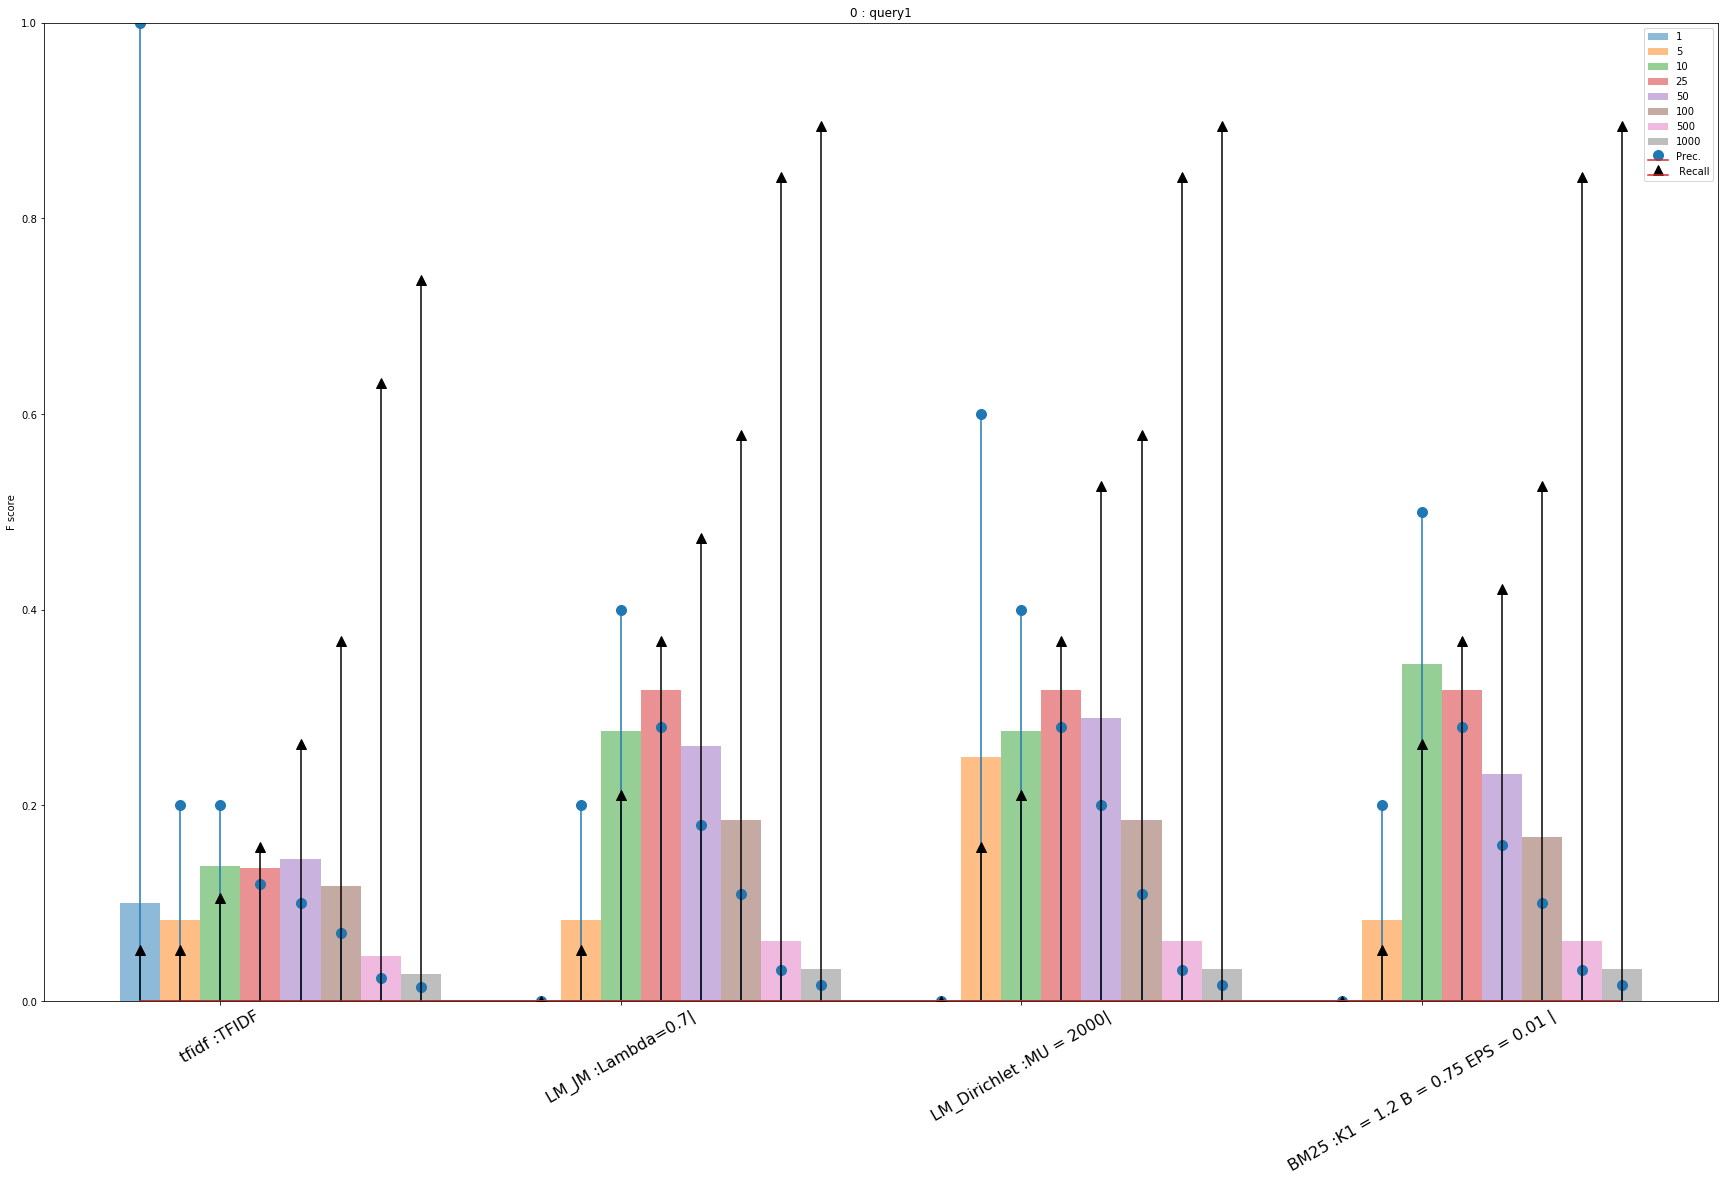

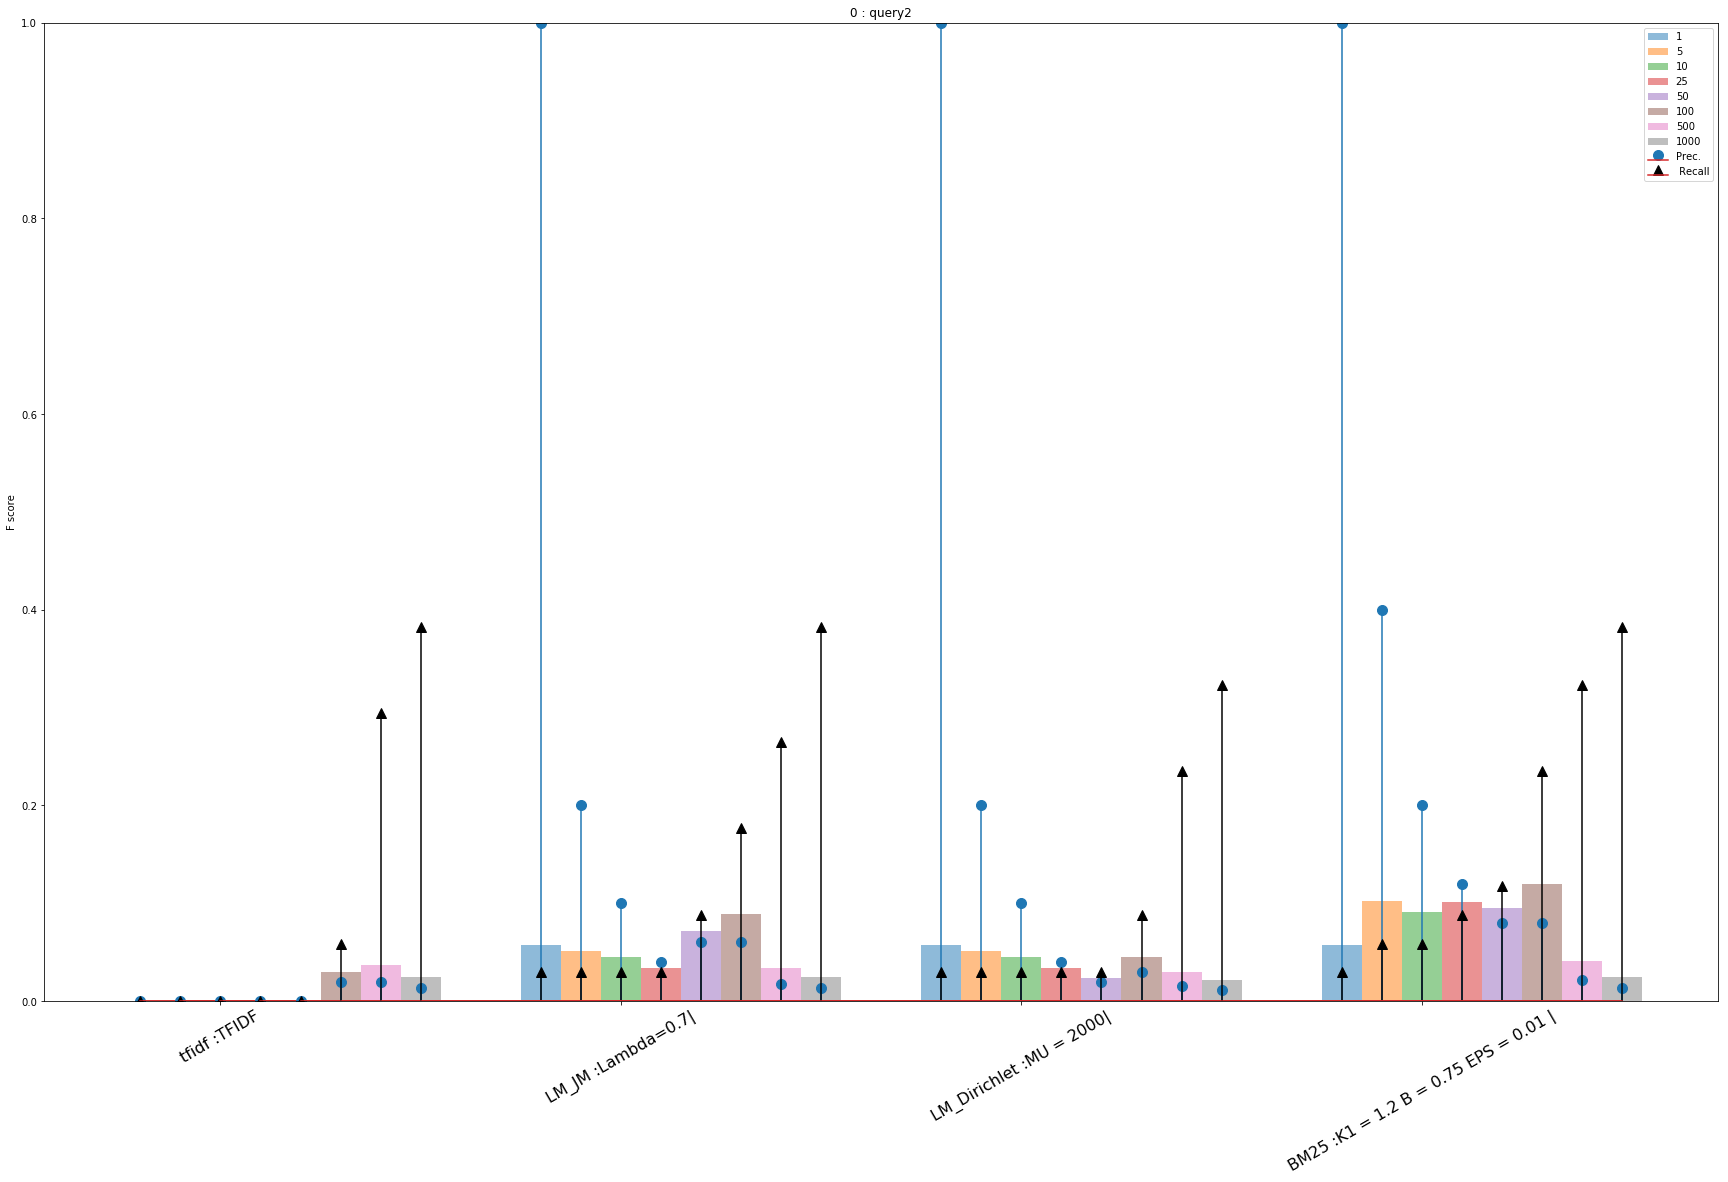

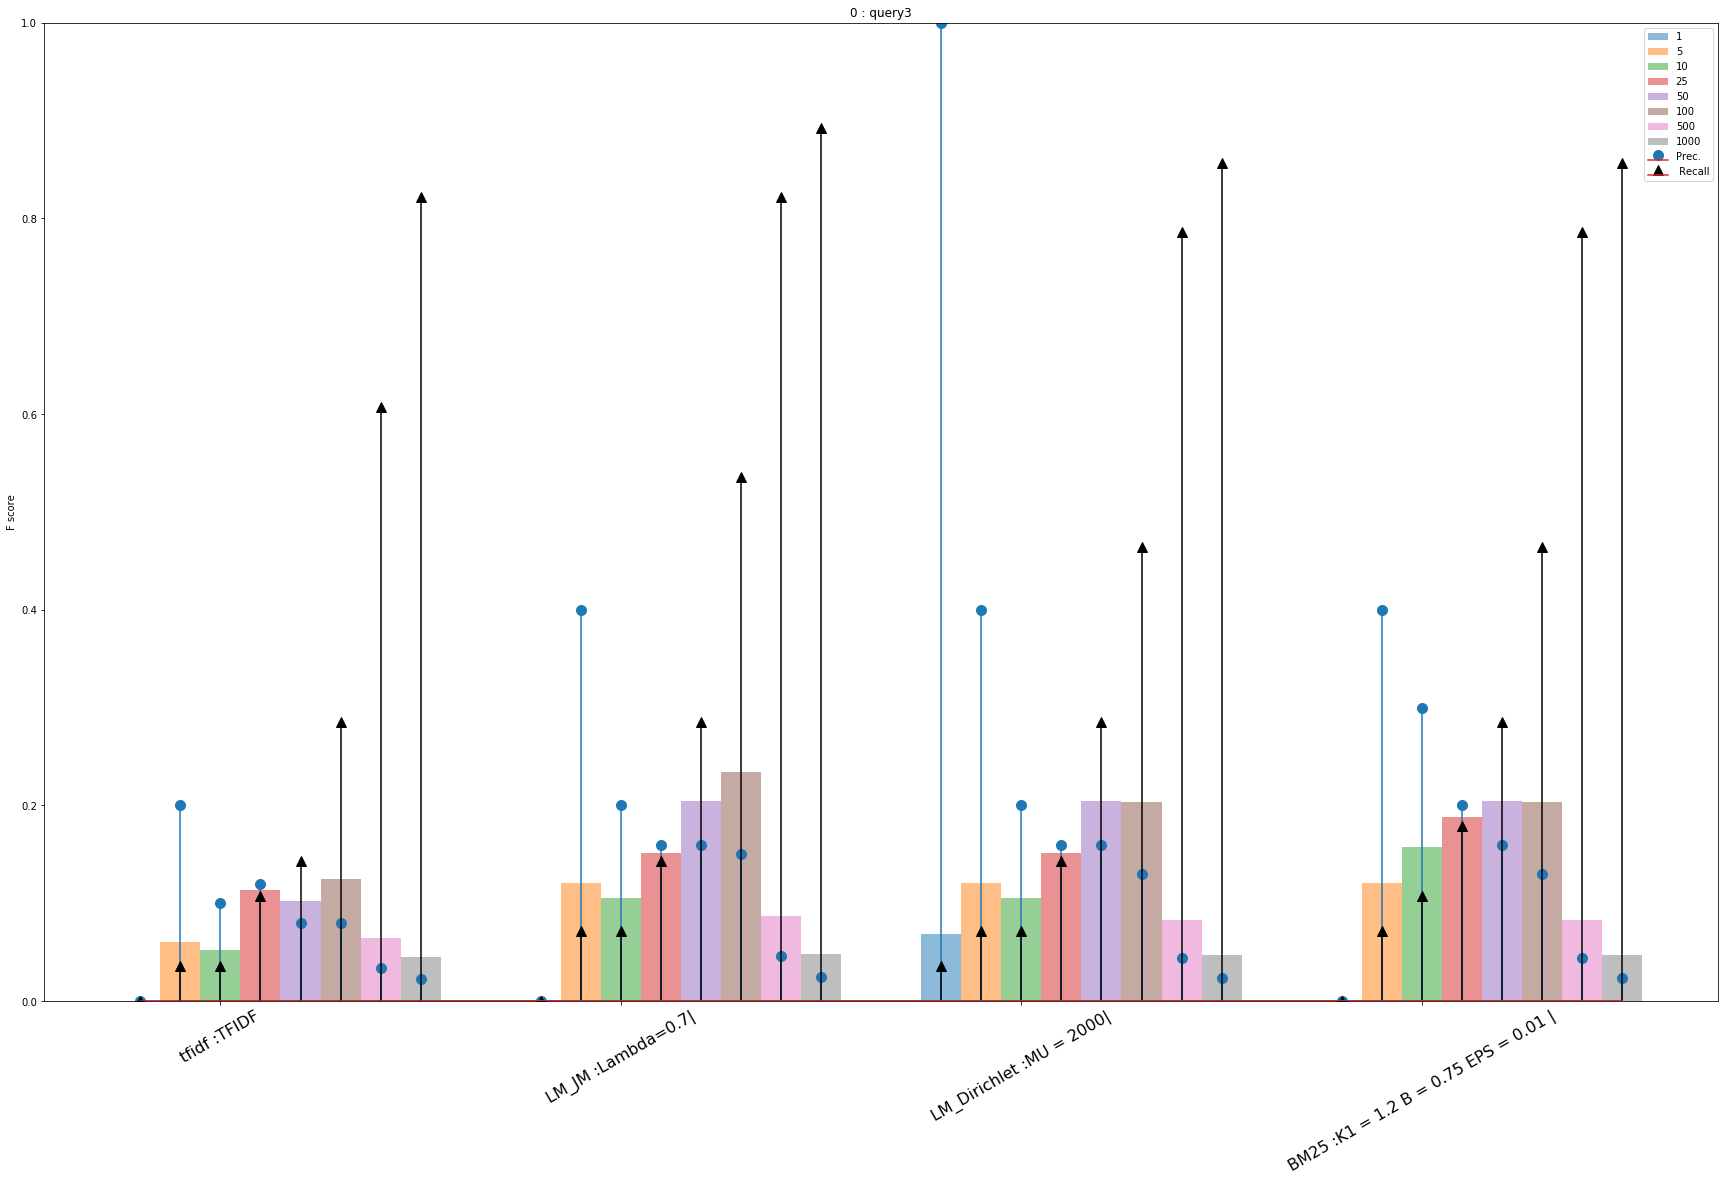

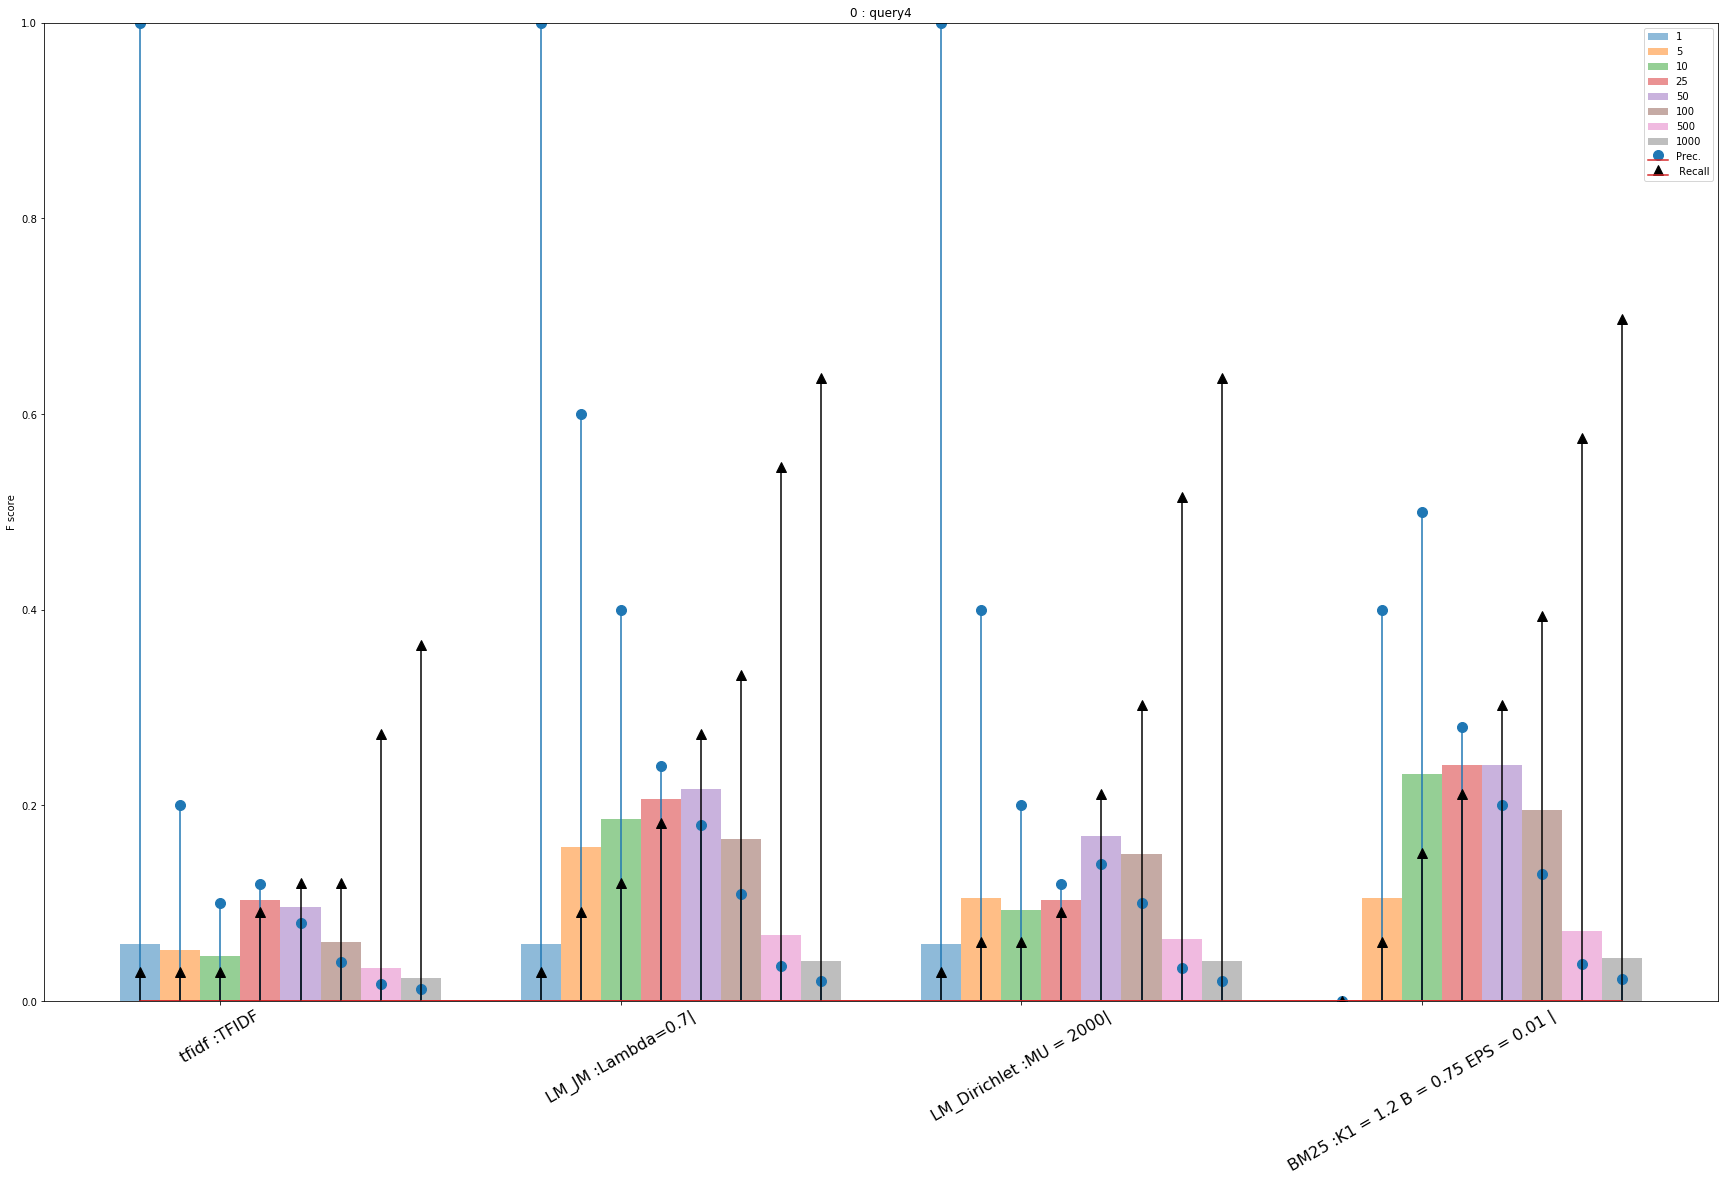

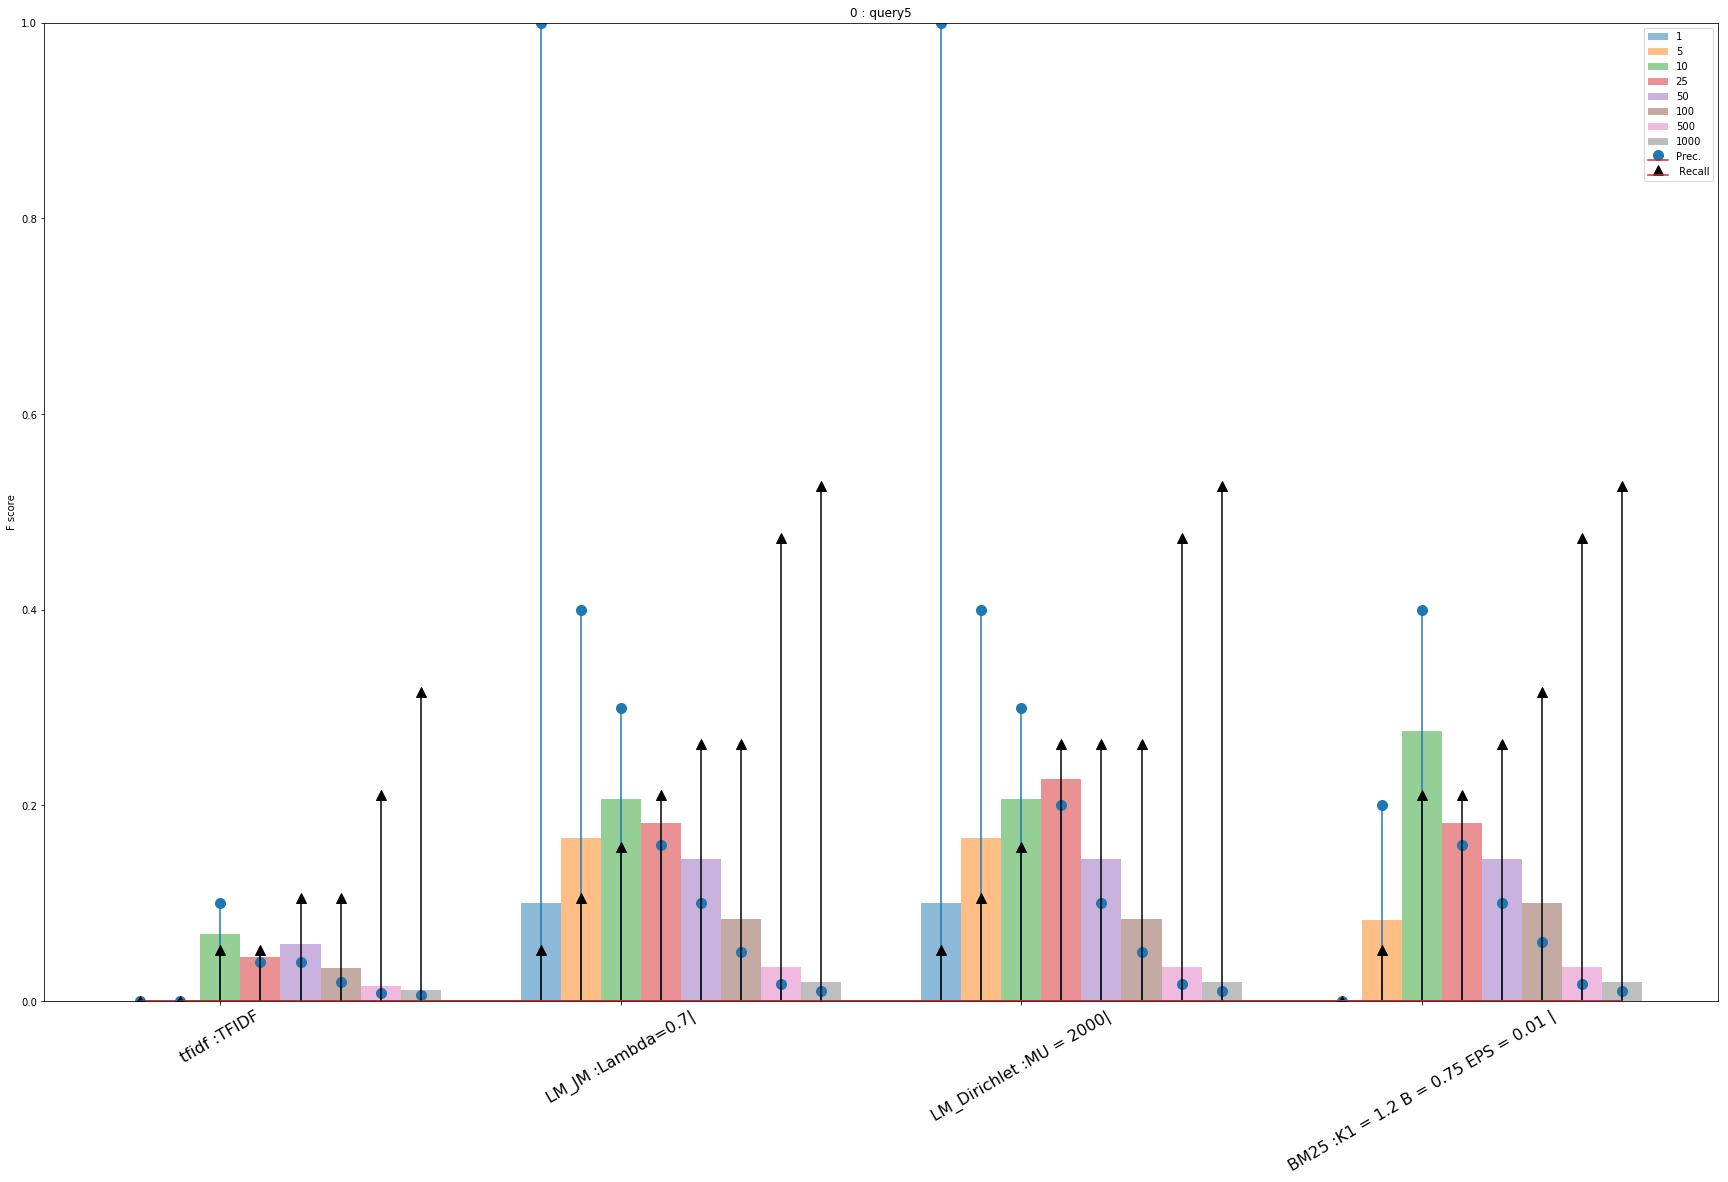

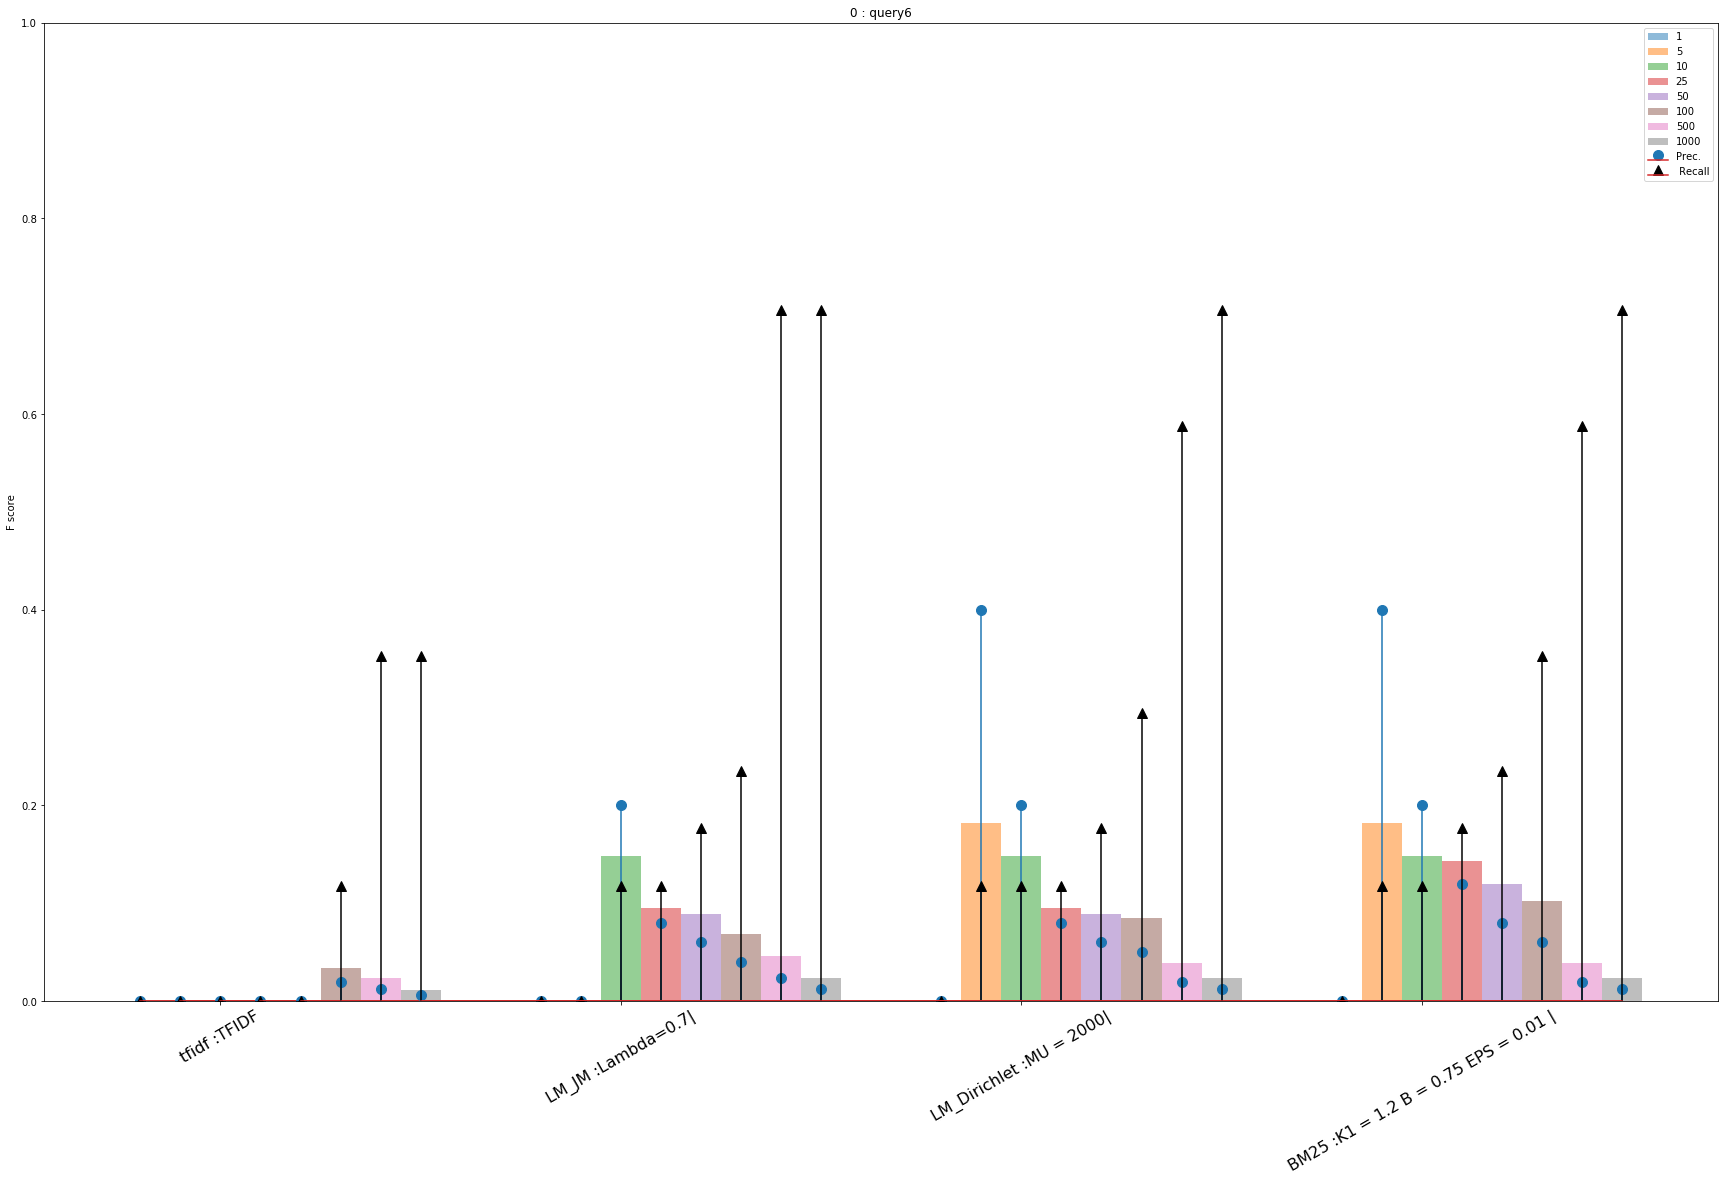

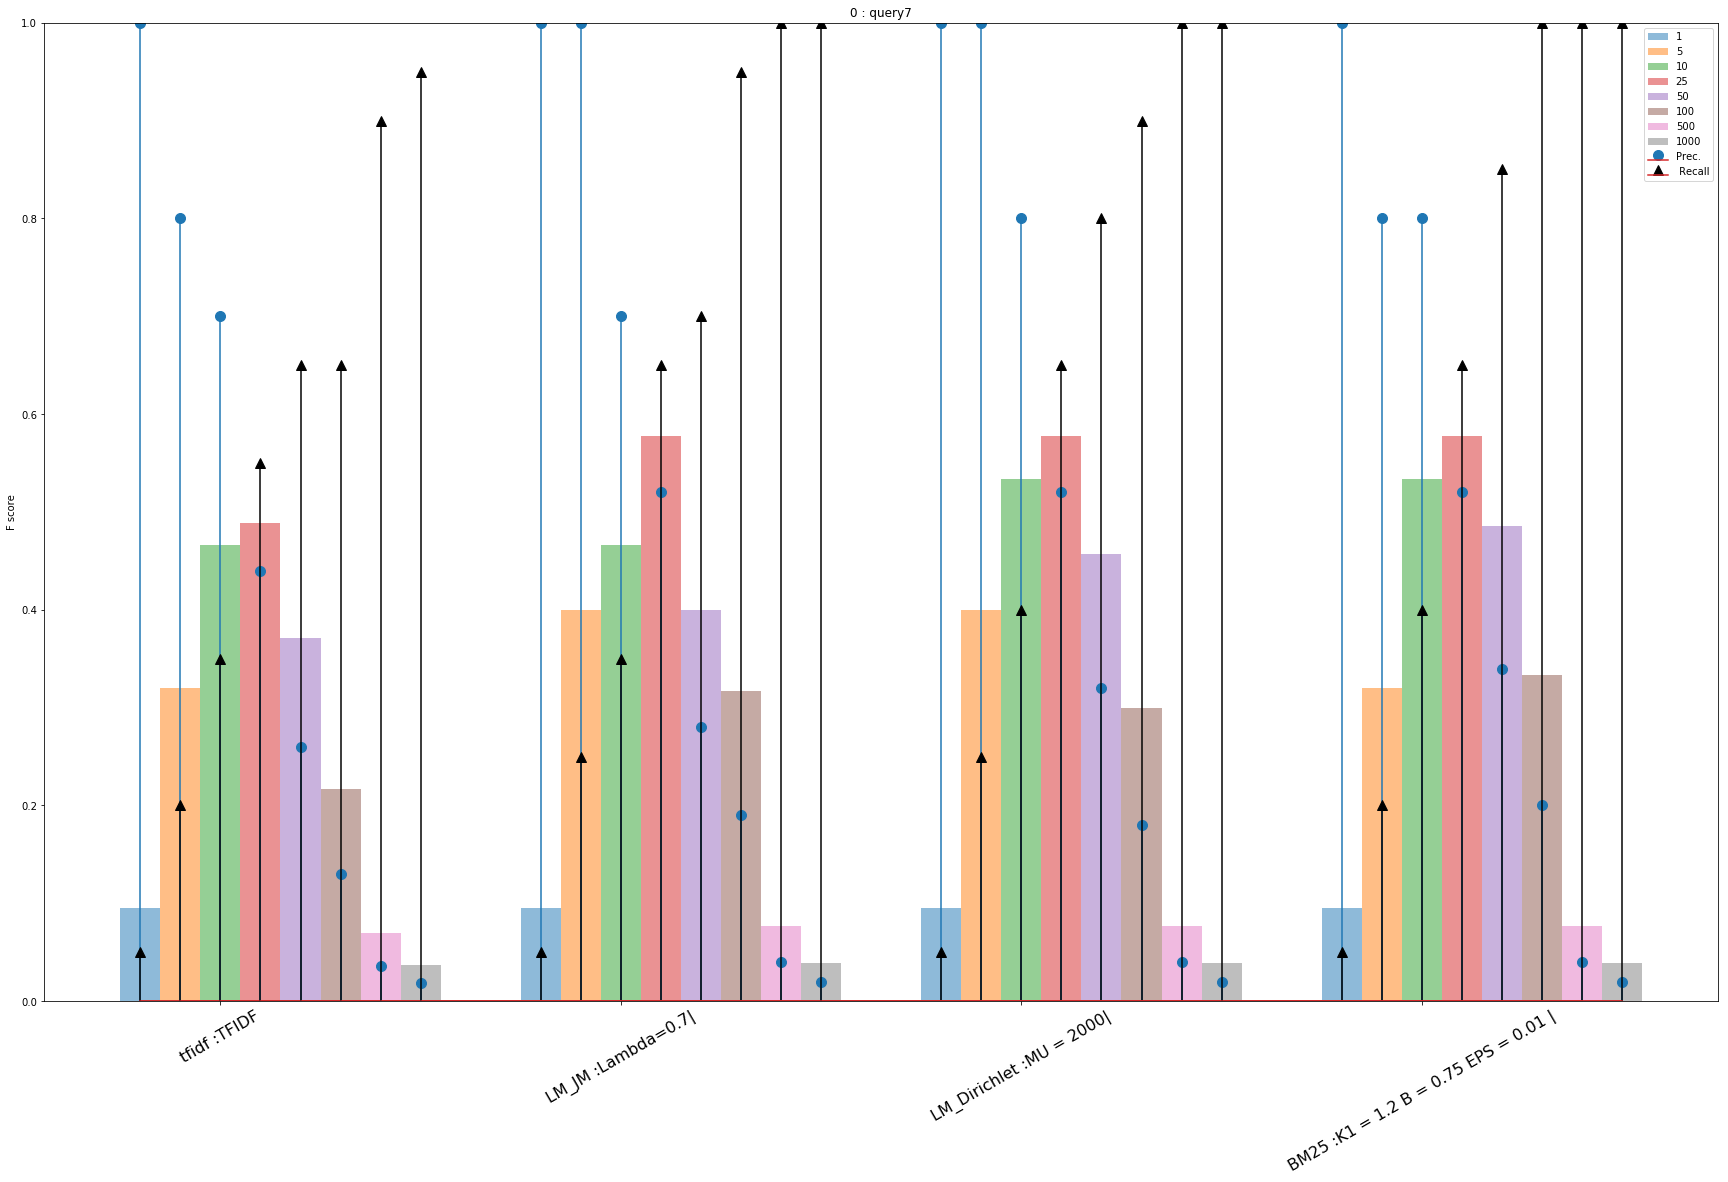

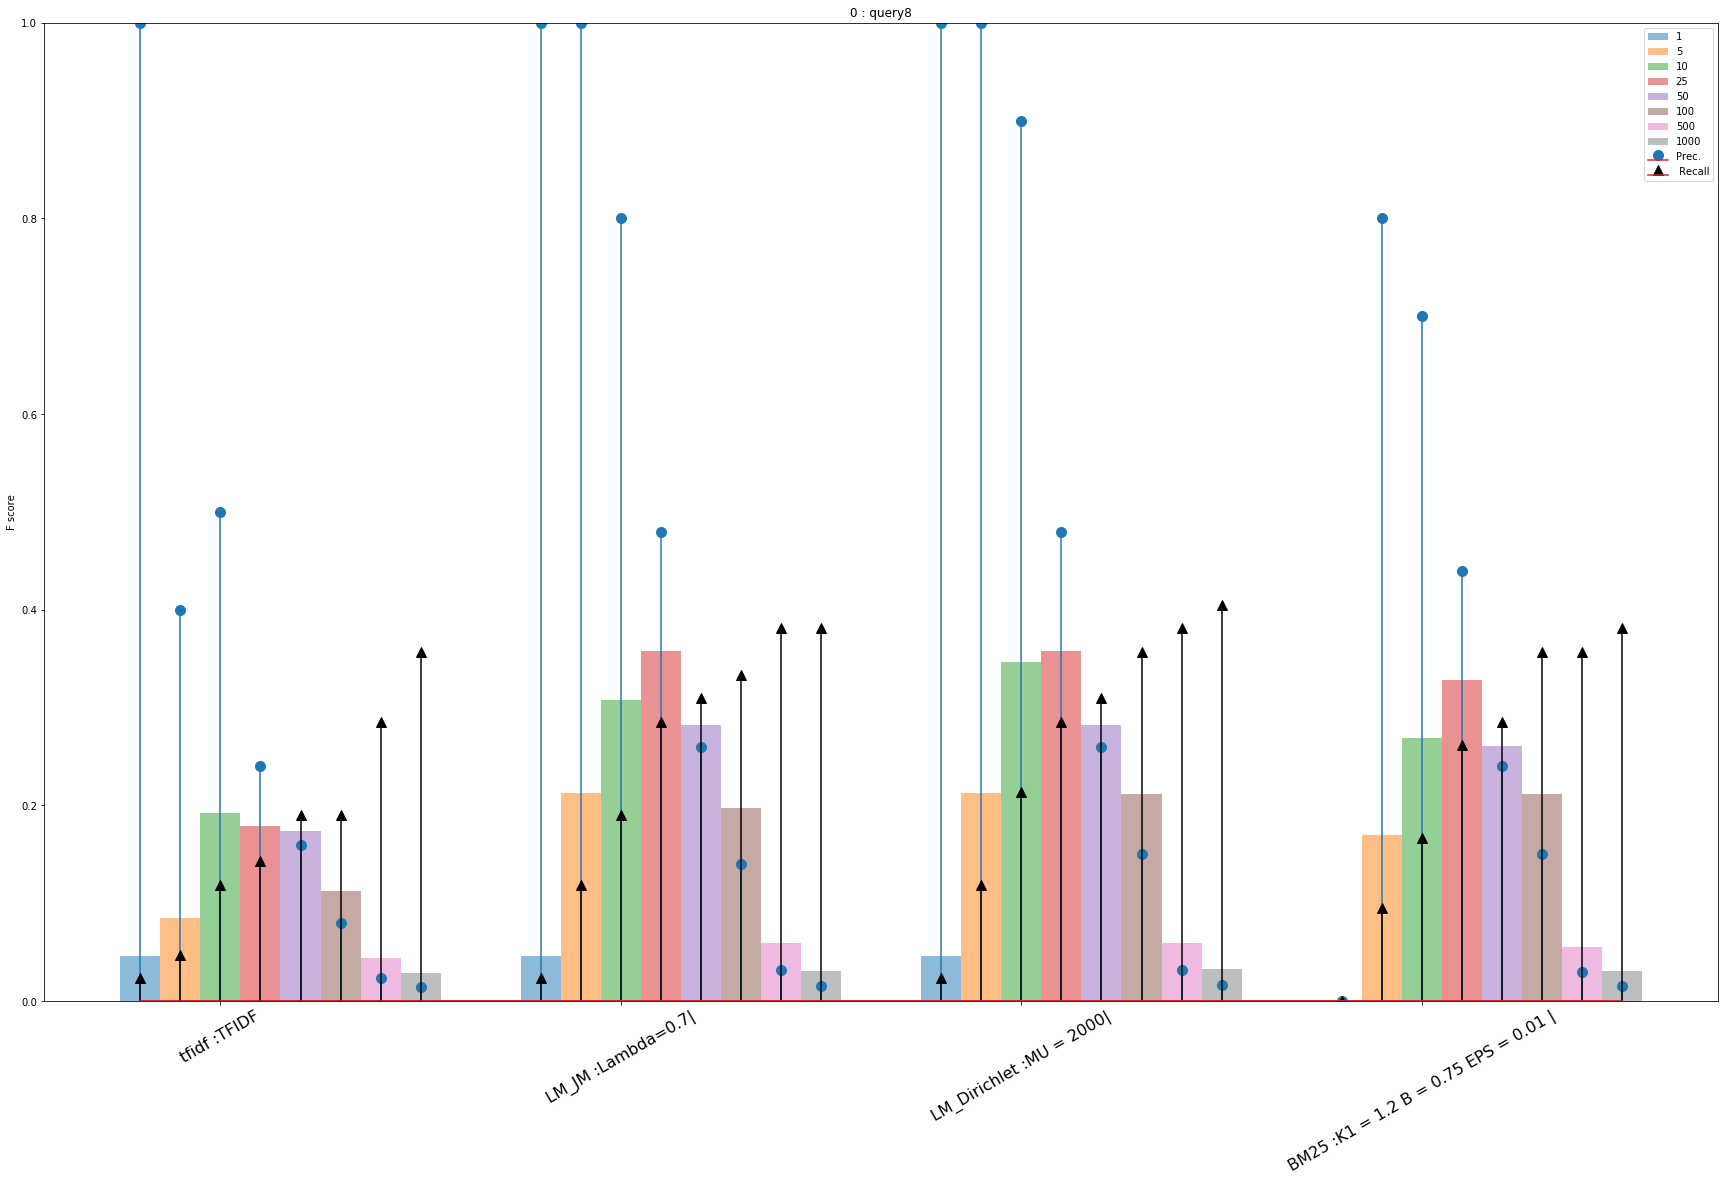

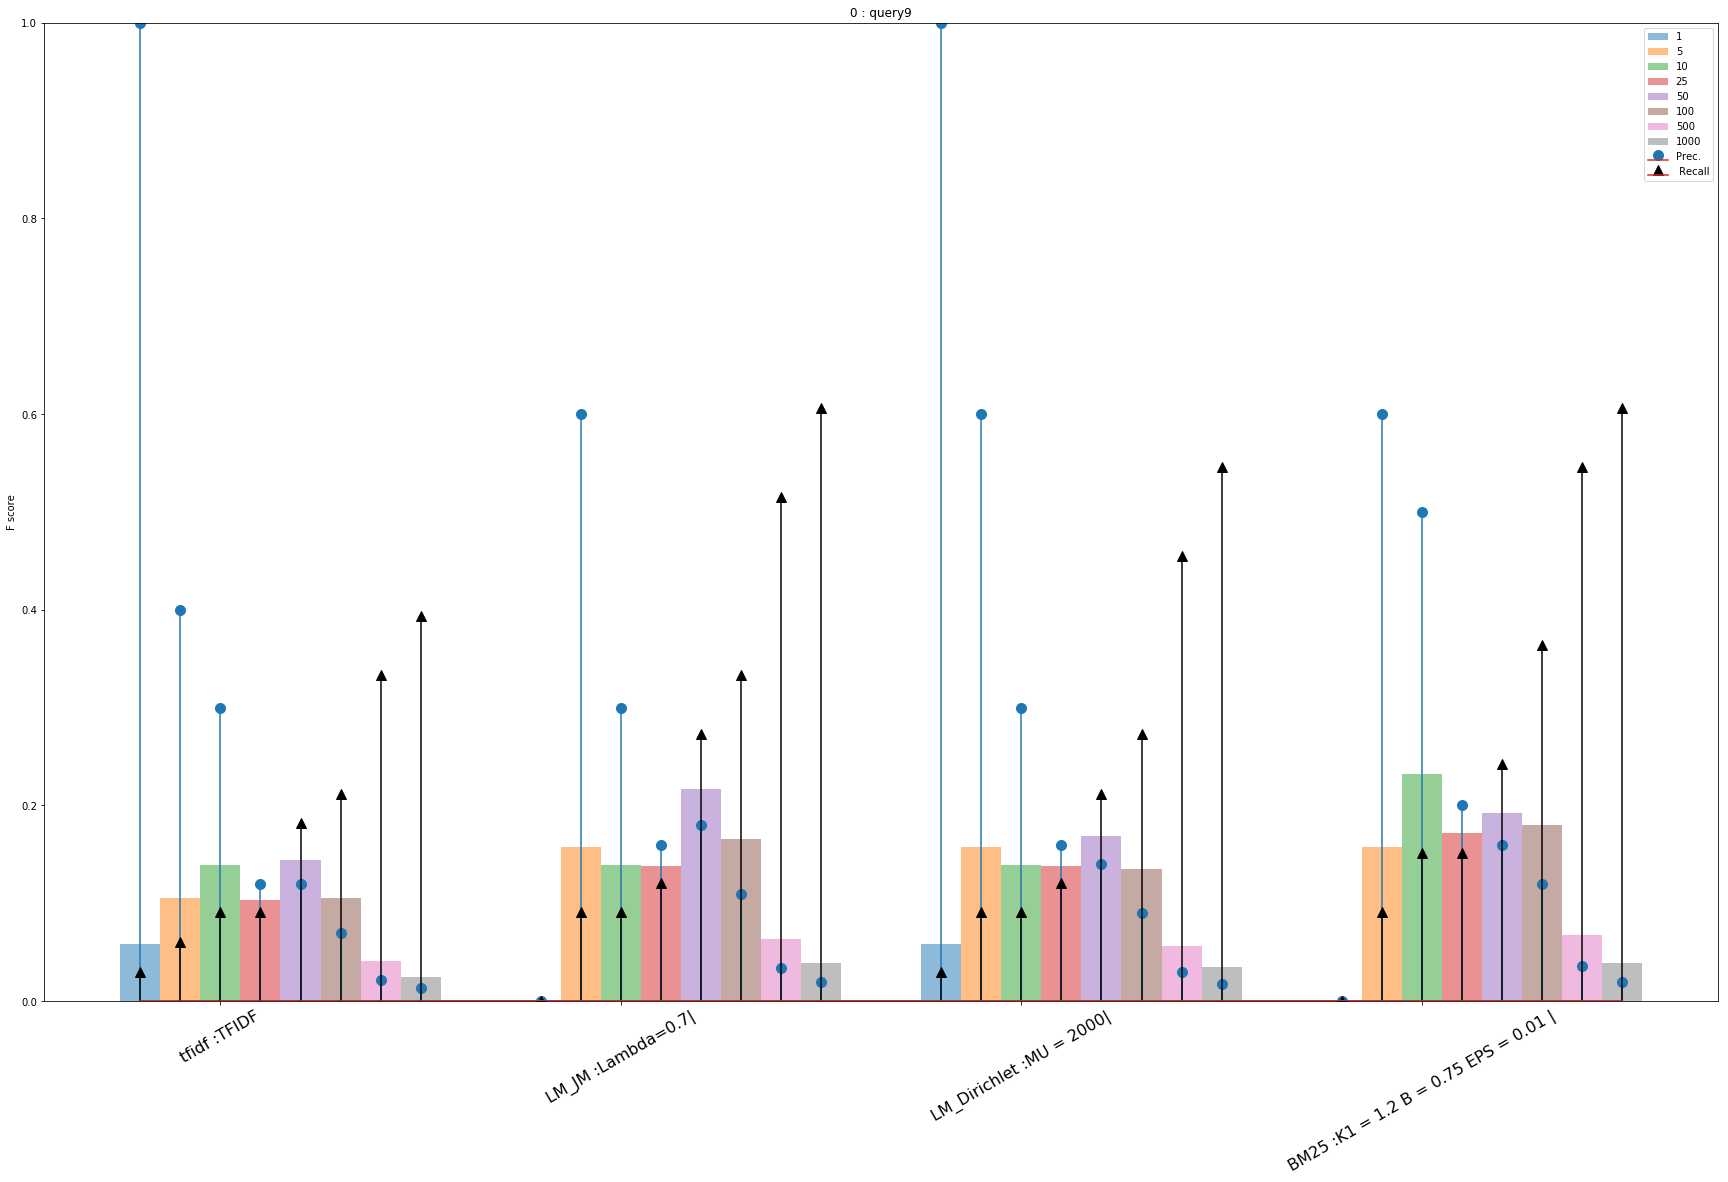

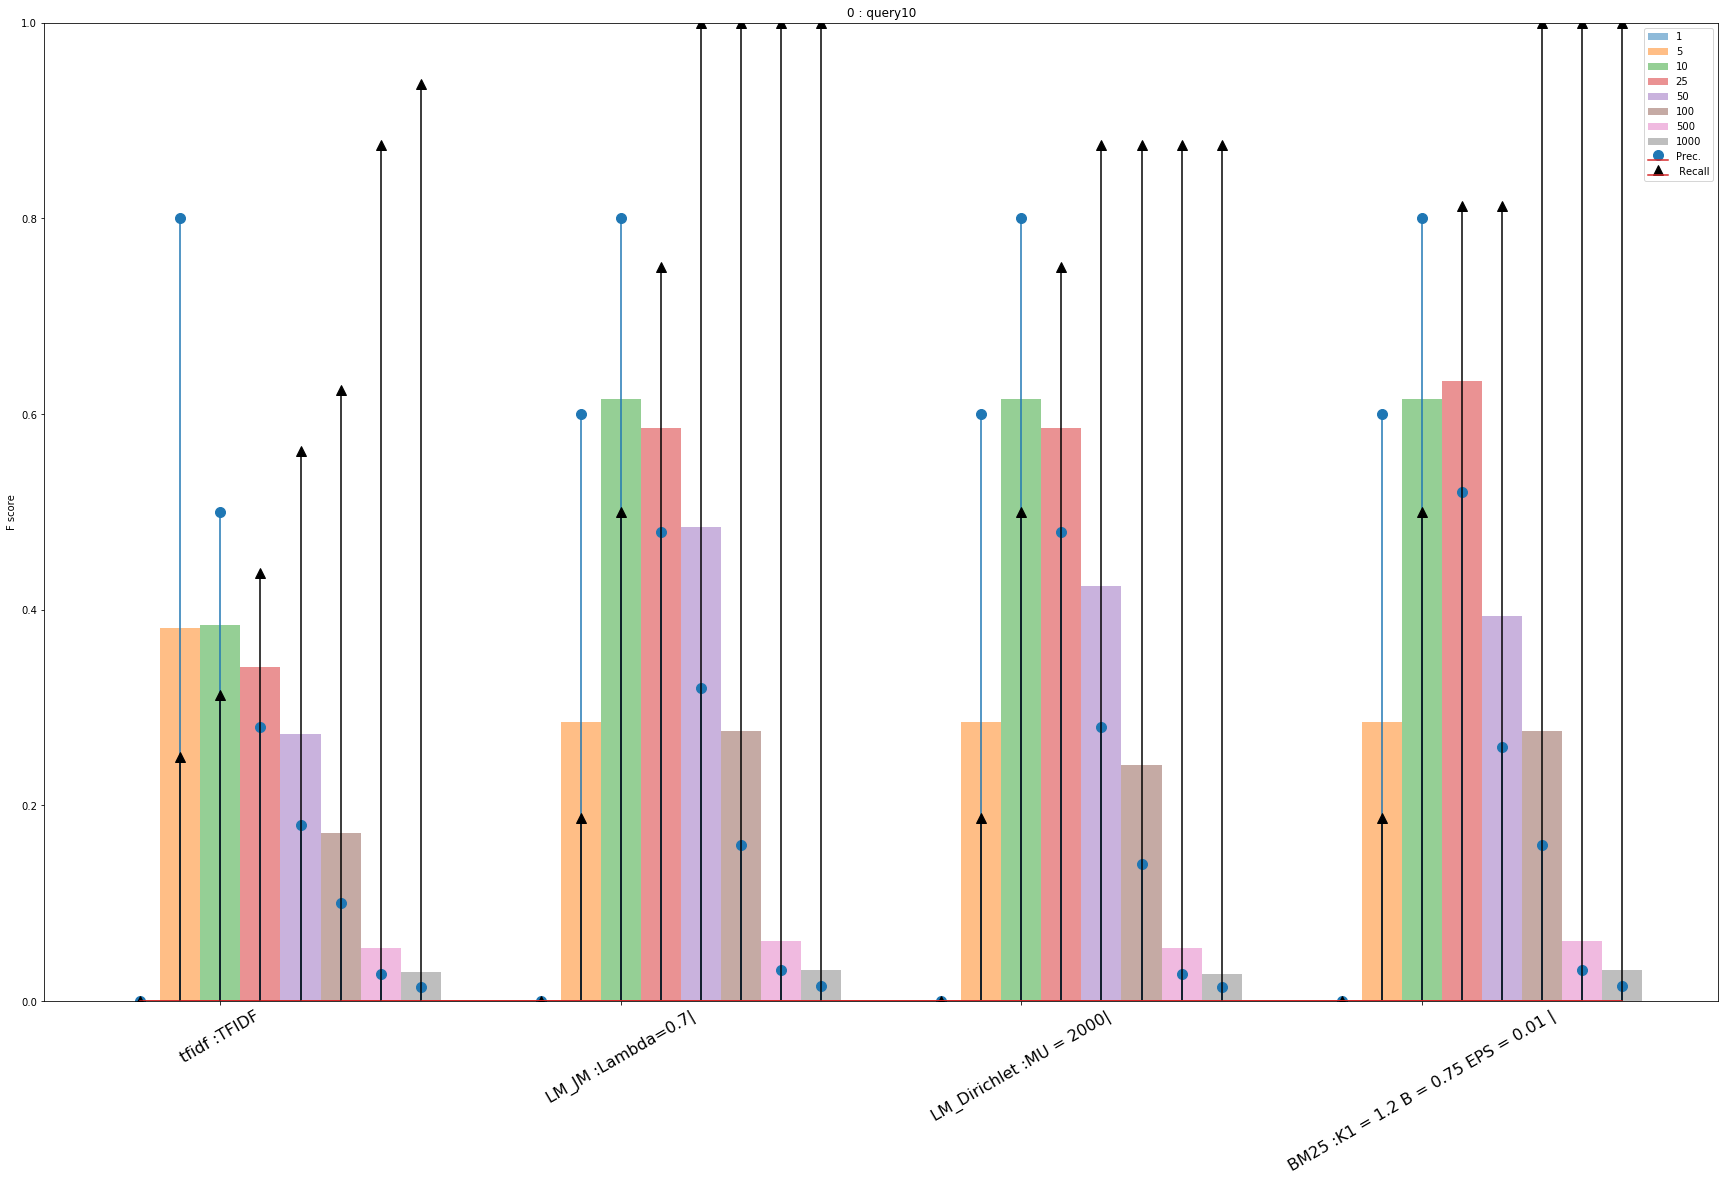

In [54]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('Fscore_plots.pdf')
K = [1, 5 ,10, 25, 50, 100, 500, 1000]
x = f.parse(0)
for rel in [10,1,0]:
    y = x[np.logical_and(x['Docs considered'] == rel, x['Precision/Recall'] == 'F')]
    y_1 = x[np.logical_and(x['Docs considered'] == rel, x['Precision/Recall'] == 'P')]
    y_2 = x[np.logical_and(x['Docs considered'] == rel, x['Precision/Recall'] == 'R')]
    for q in np.arange(1, 11):
        # A single plot for a query 
        z = y[y['Query'] == q]
        ind = np.arange(len(models))  # the x locations for the groups
        width = 1.0/(len(K) + 2)    # the width of the bars

        fig, ax = plt.subplots()
        fig.set_size_inches(30, 18) 
        rects = []
        for num, k in enumerate(K):
            #fscore for different k
            rects.append(ax.bar(ind + num*width, z[k], width, alpha= 0.5))

        for i,k in enumerate(K):
            # Precision for different k
            t=ax.stem(ind+ i*width, y_1[y_1['Query'] == q][k])
            # Recall for different k
            s=ax.stem(ind + i*width, y_2[y_2['Query'] == q][k],linefmt = 'k', markerfmt='k^')
            t[0].set_markersize(10)
            s[0].set_markersize(10)
        
        ax.set_ylim([0,1])
        # add some text for labels, title and axes ticks
        ax.set_ylabel('F score')
        ax.set_title(str(rel) + ' : query' + str(q))
        ax.set_xticks(ind + 2*width)
        ax.set_xticklabels(models,rotation=30, fontsize=16)

        ax.legend([rect[0] for rect in rects] + [t, s], K + ['Prec.', ' Recall'])
        plt.show()
        fig.savefig(pp, format='pdf')
        plt.close(fig)

pp.close()

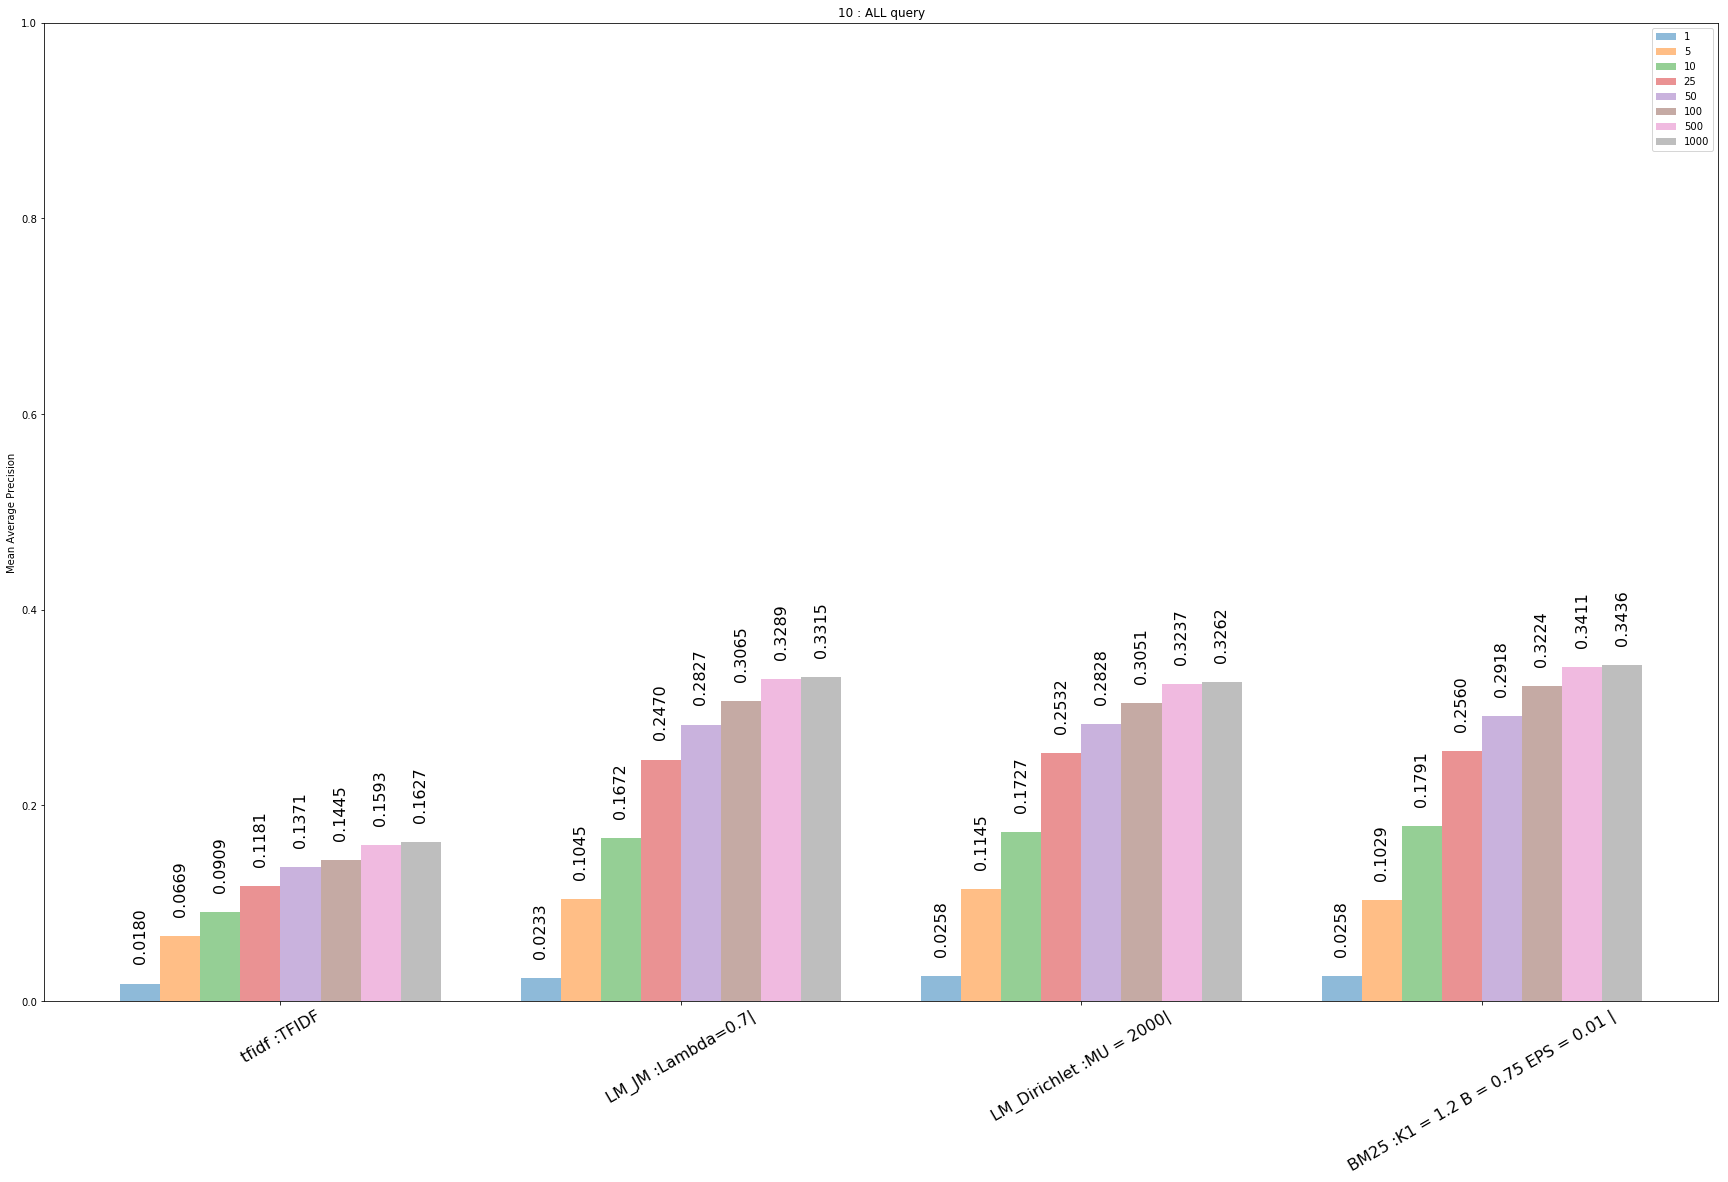

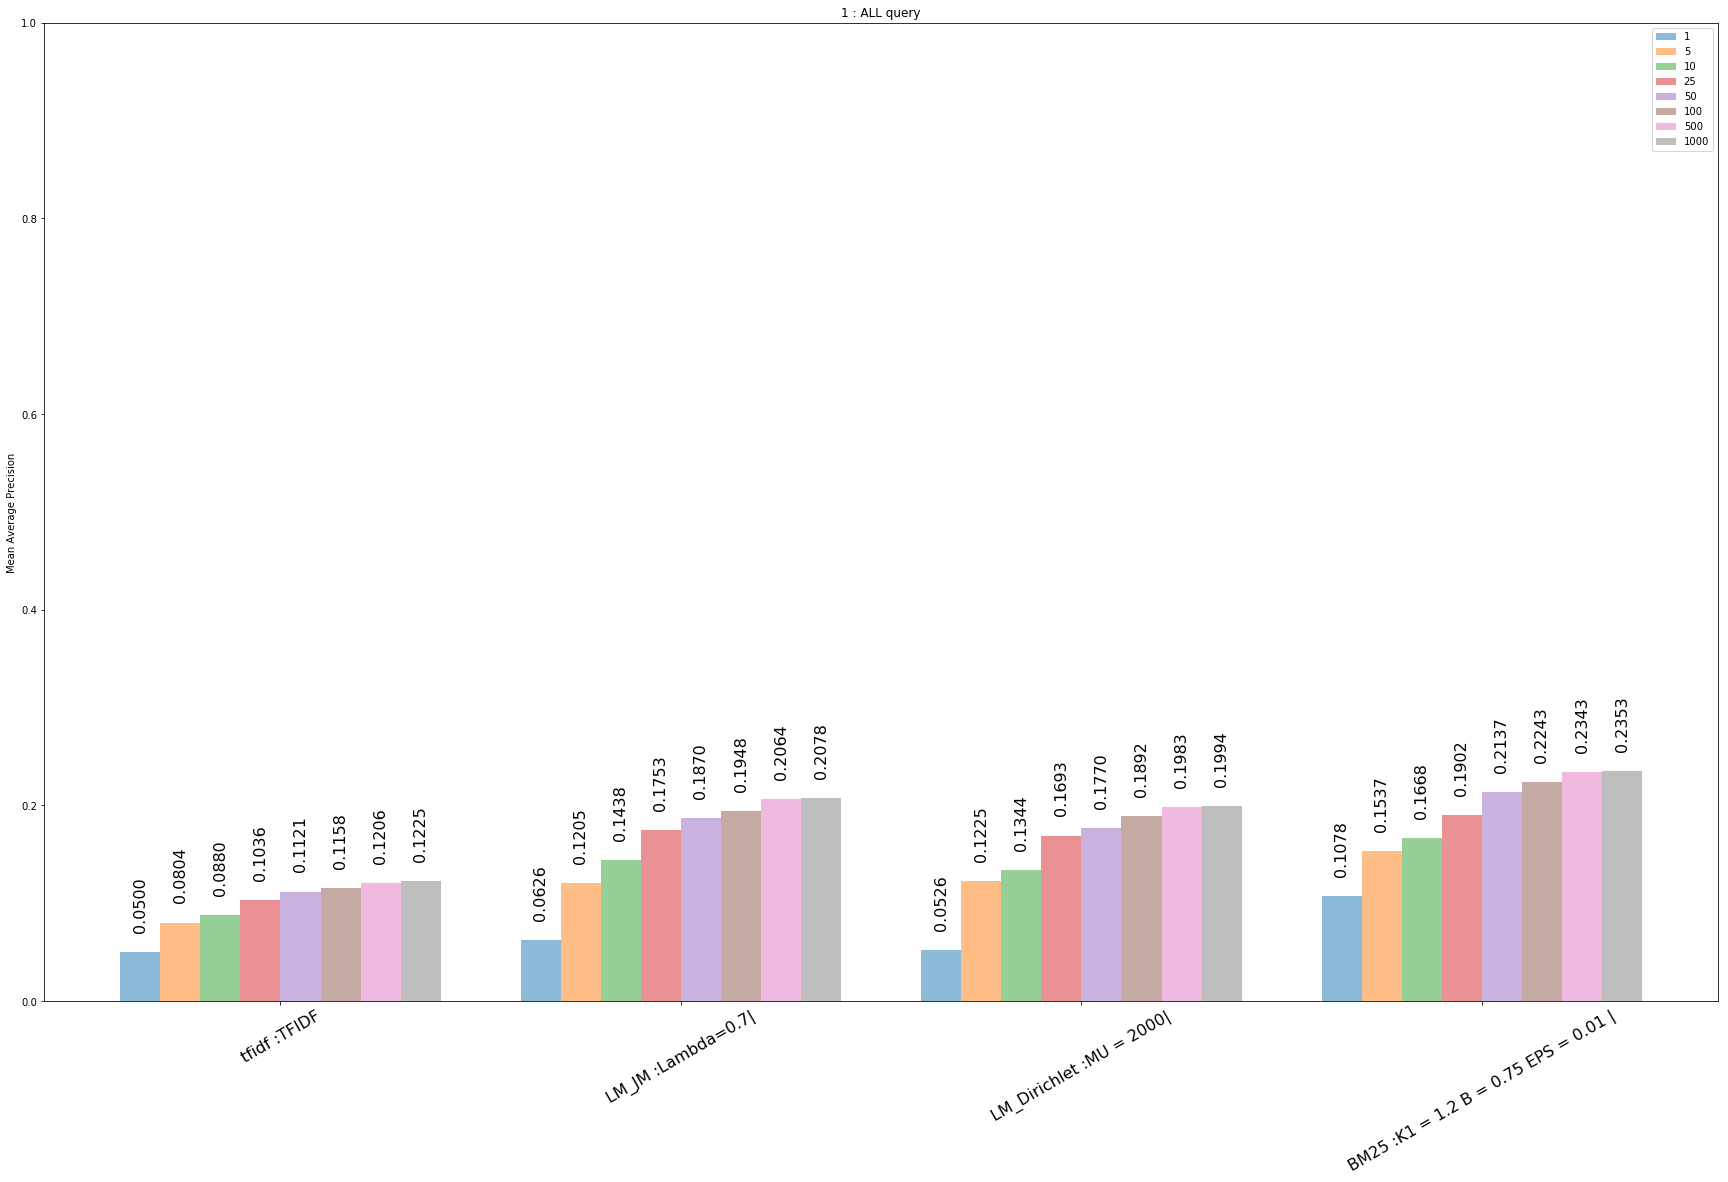

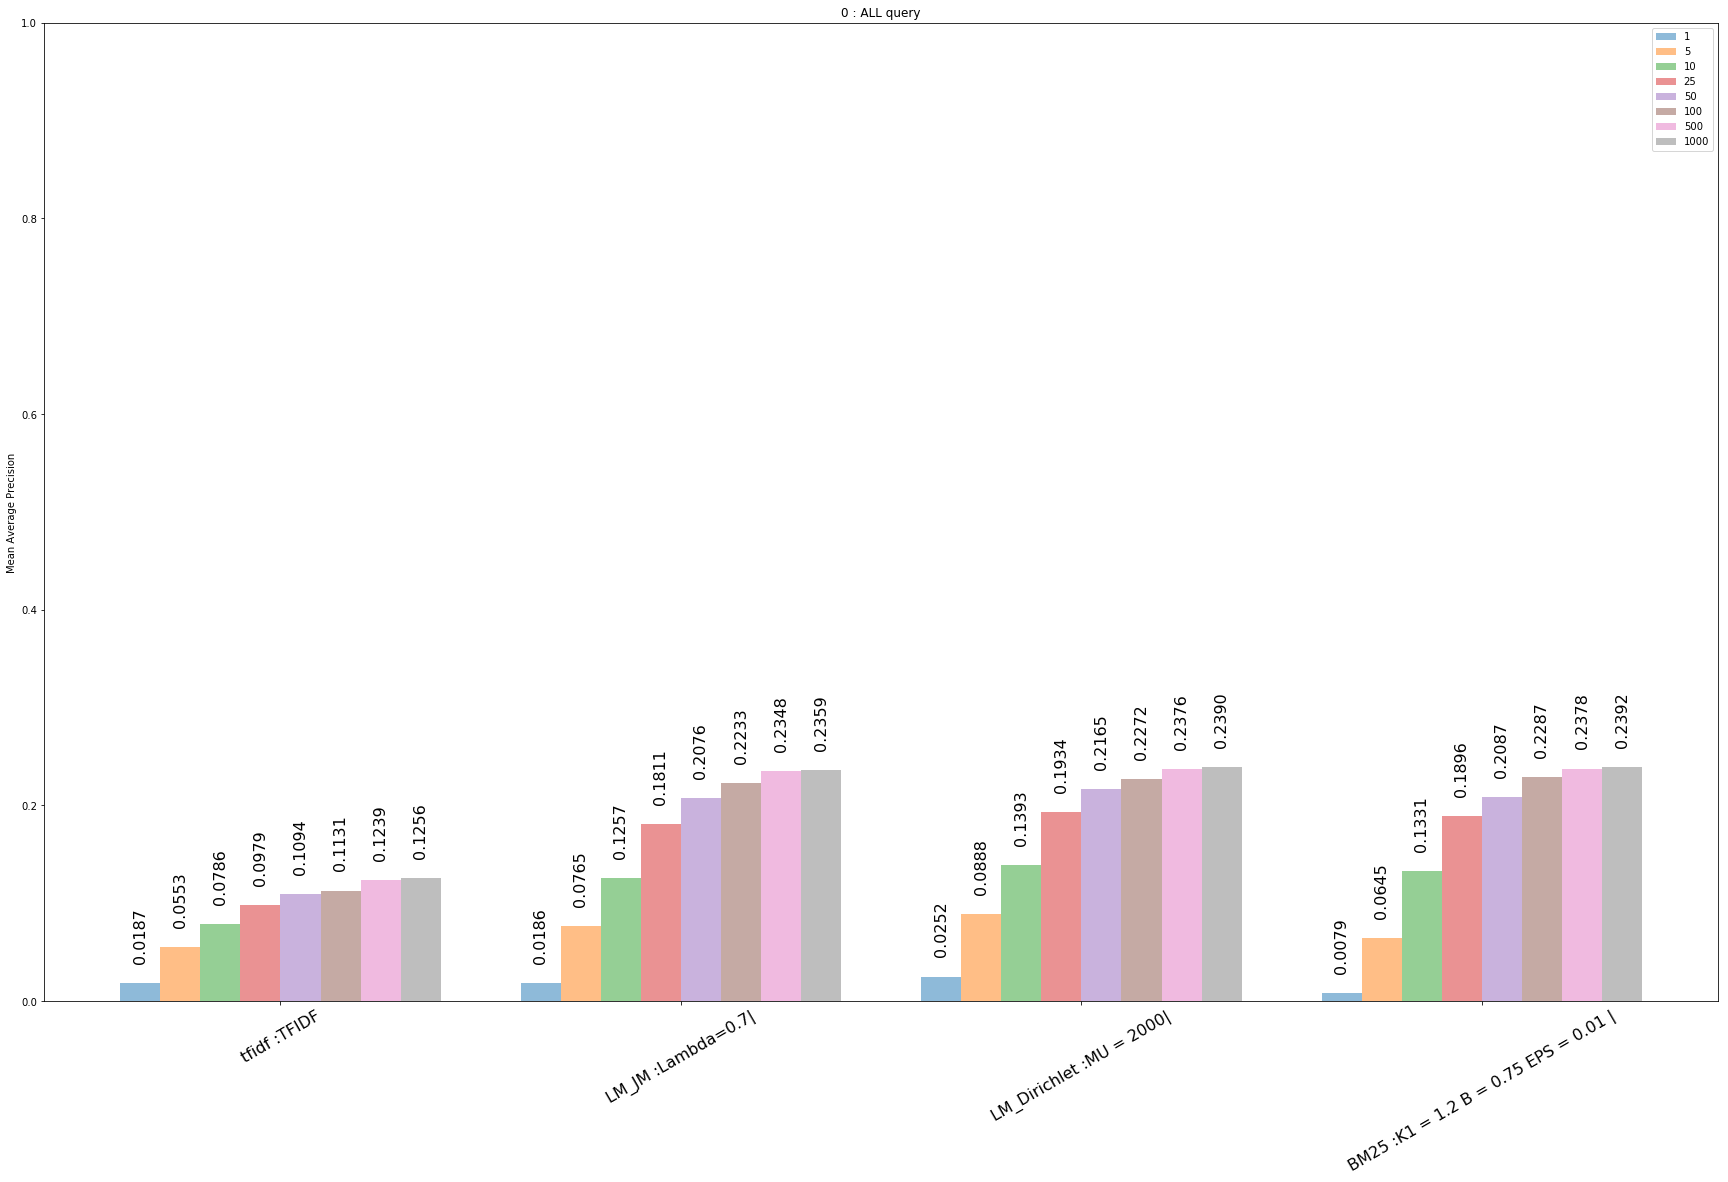

In [55]:
#MAP
pp = PdfPages('MAP.pdf')


for rel in [10,1,0]:
    x = f.parse(1)
    x = x[x['Docs considered'] == rel]
    y = x.groupby(['Model'],as_index=False, sort= False).mean()


    ind = np.arange(len(models))  # the x locations for the groups
    width = 1.0/(len(K) + 2)    # the width of the bars

    fig, ax = plt.subplots()
    fig.set_size_inches(30, 18)

    rects = []
    for k,j in enumerate(K):
        rects.append(ax.bar(ind + k*width, y[j], width, alpha= 0.5))

    ax.set_ylim([0,1])
    # add some text for labels, title and axes ticks
    ax.set_ylabel('Mean Average Precision')
    ax.set_title(str(rel) + ' : ALL query')
    ax.set_xticks(ind + 3.5*width)
    ax.set_xticklabels(models,rotation=30, fontsize=16)

    ax.legend(rects, K)

    for rect in rects:
        autolabel(rect)

    plt.show()
    fig.savefig(pp, format='pdf')
    plt.close(fig)

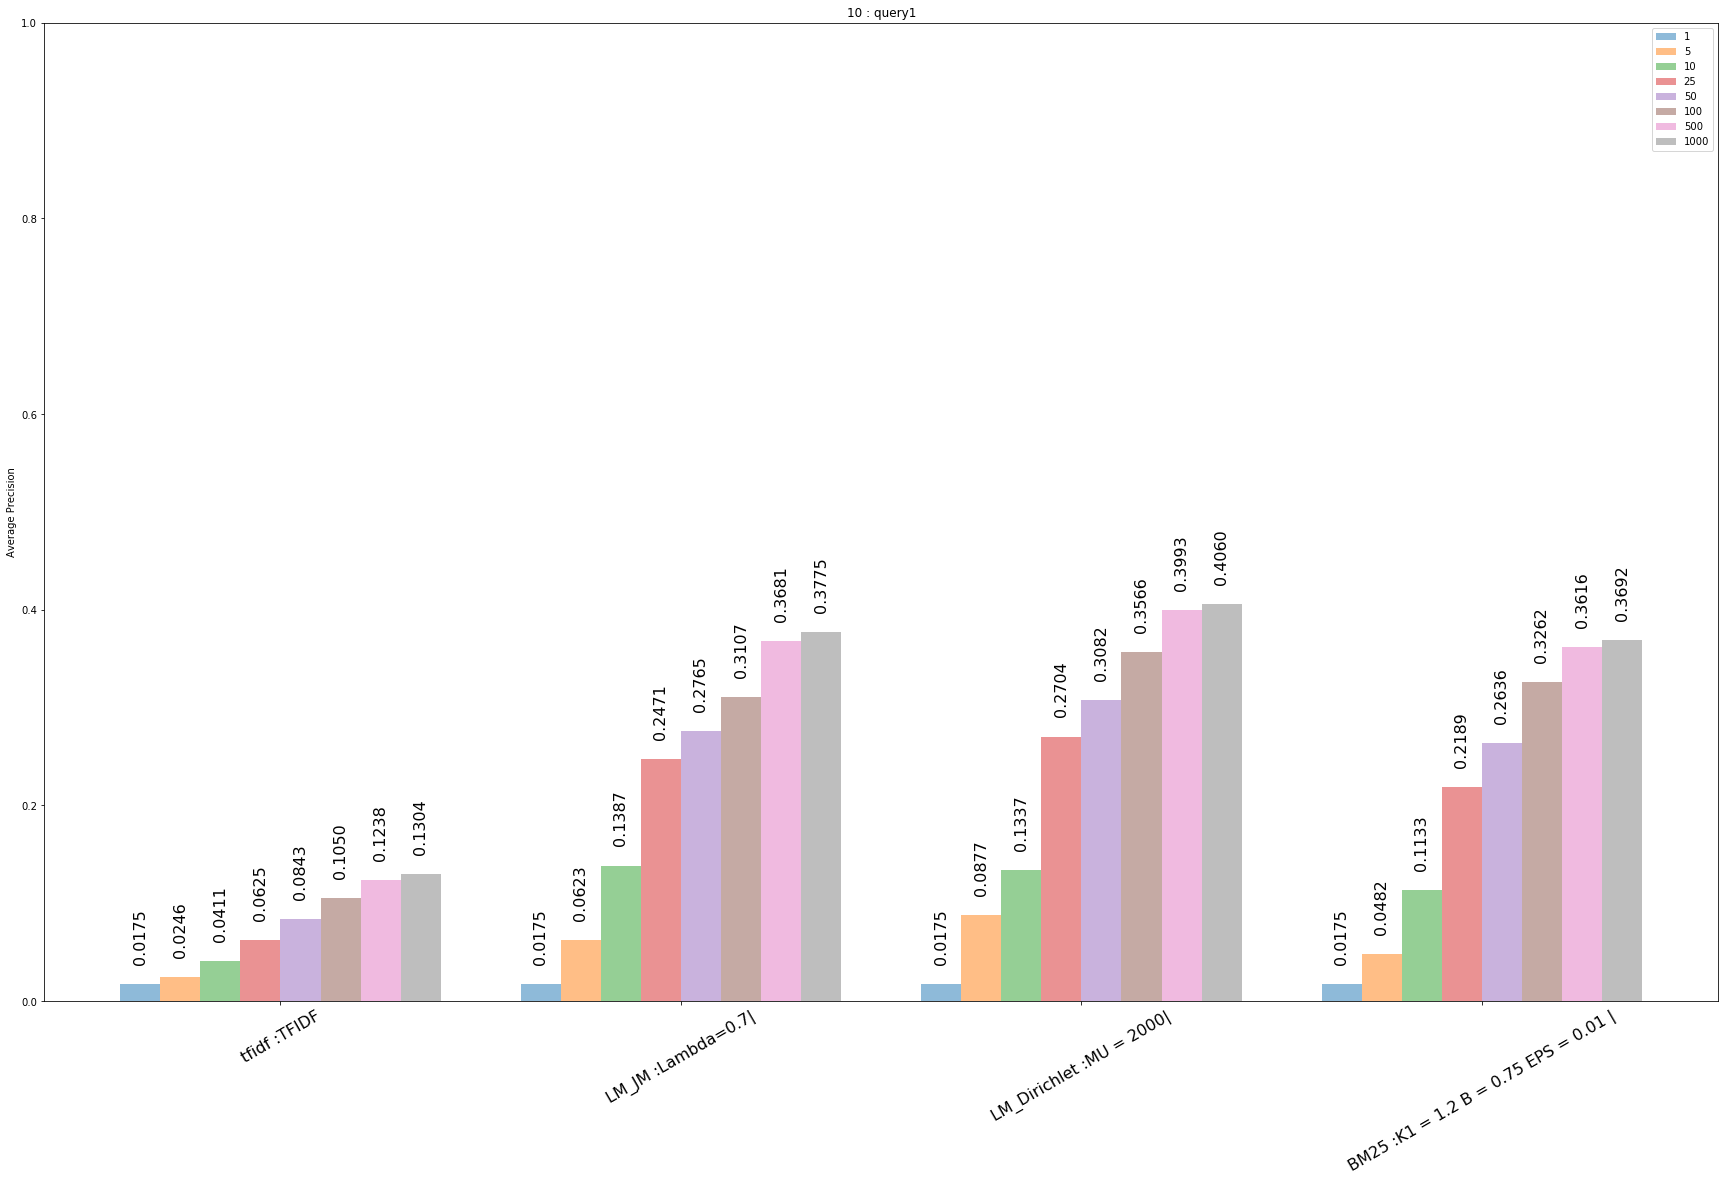

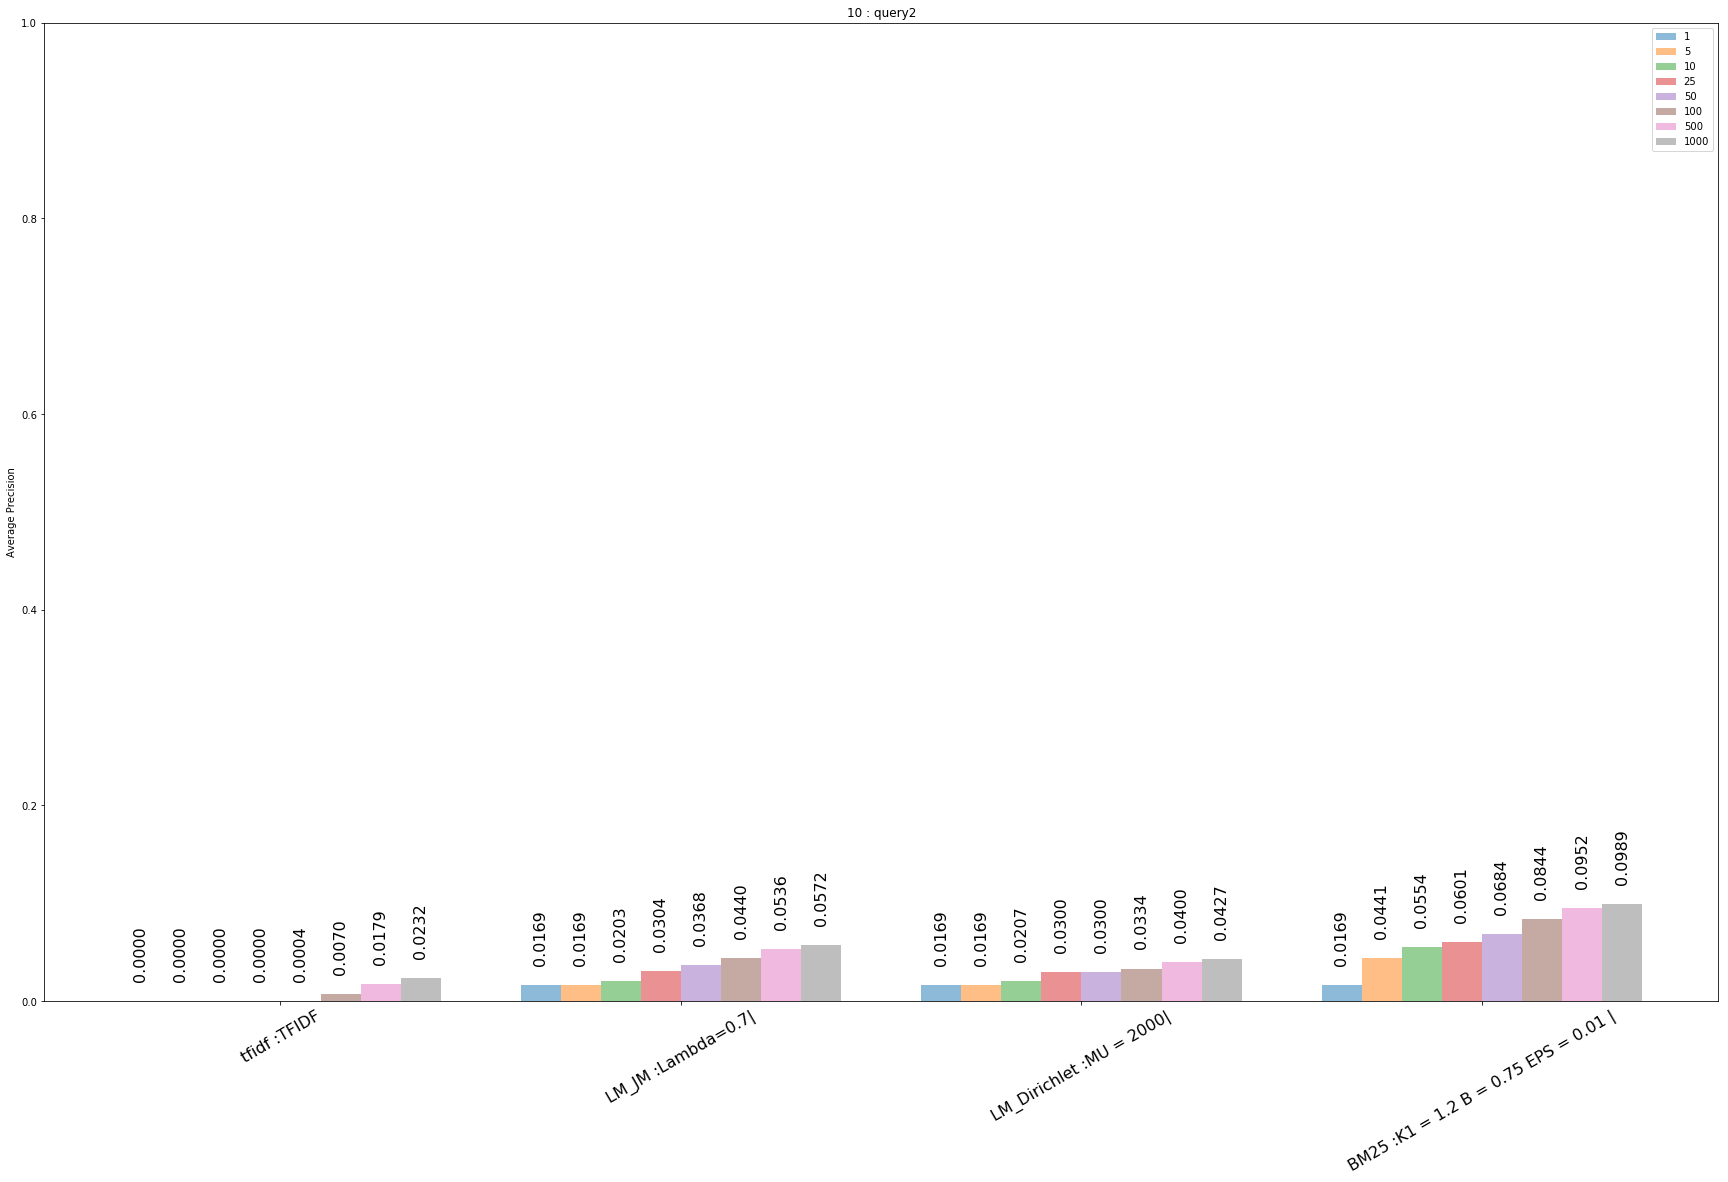

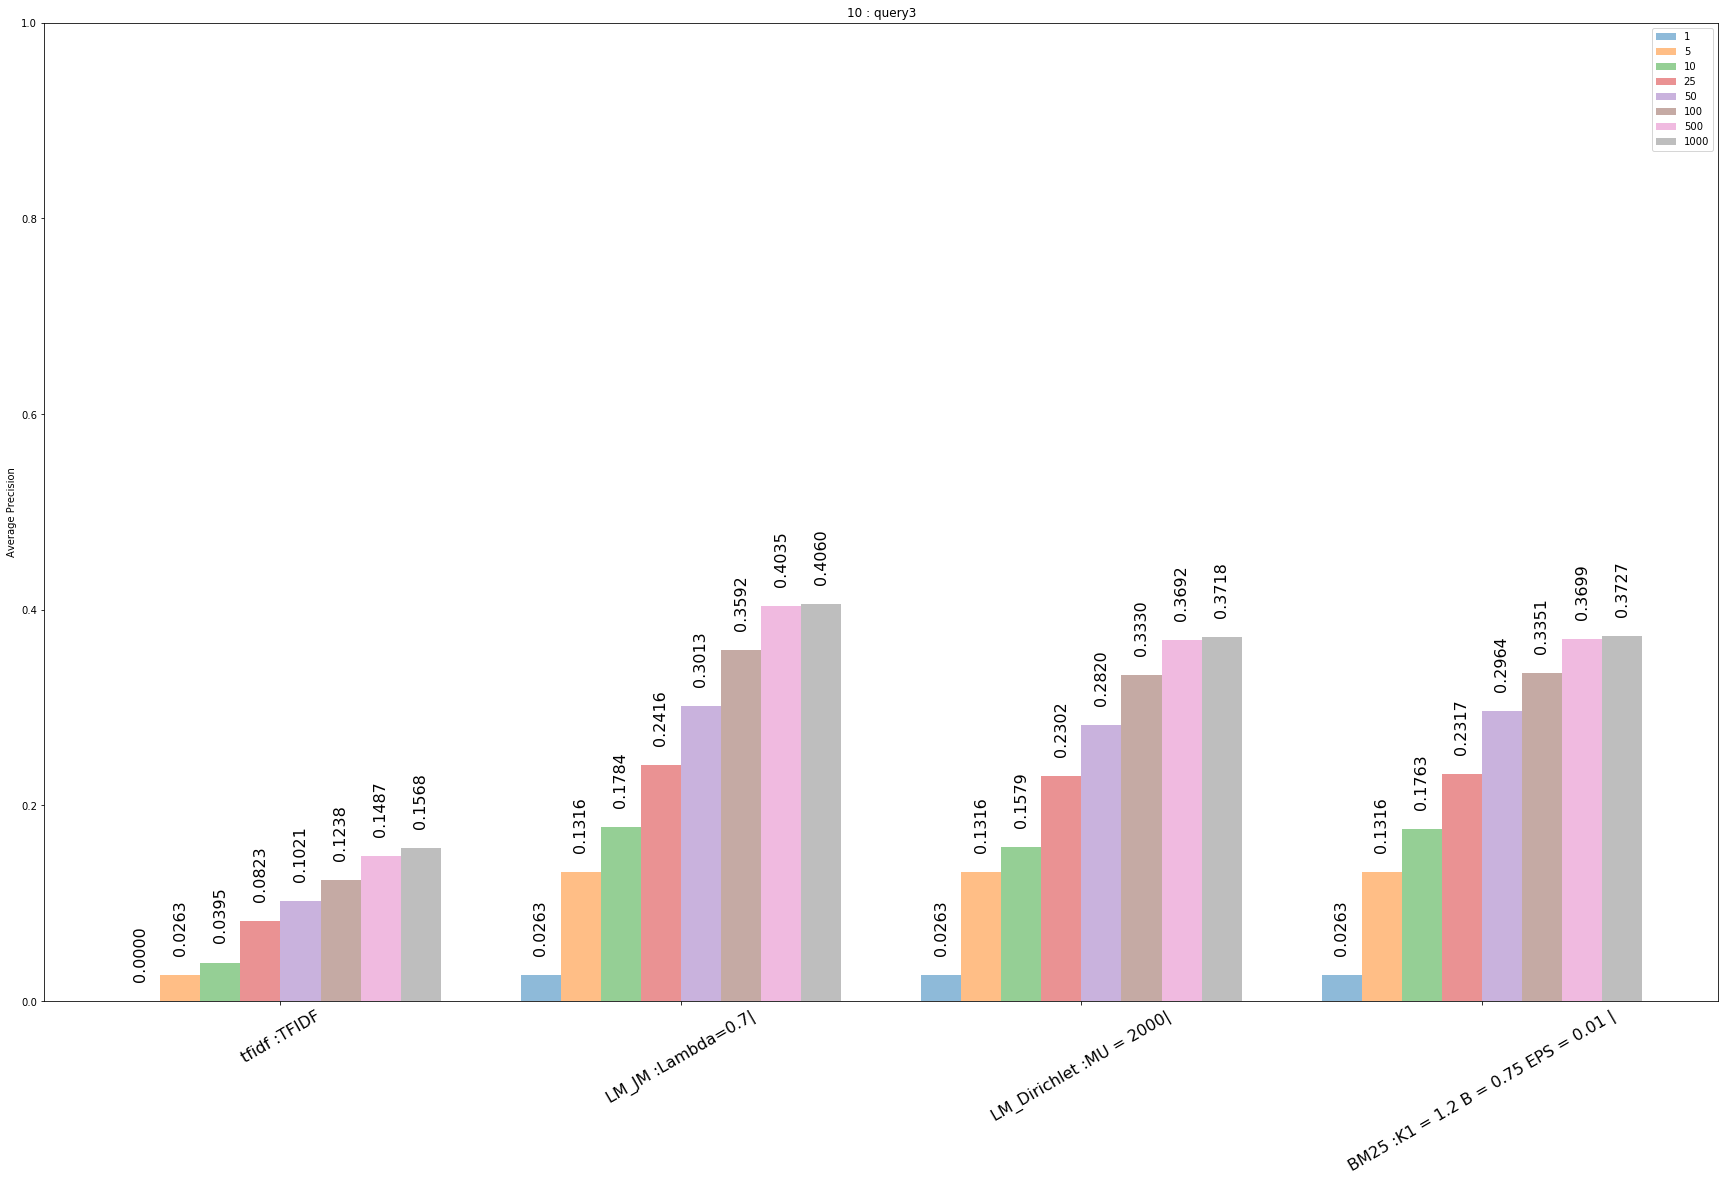

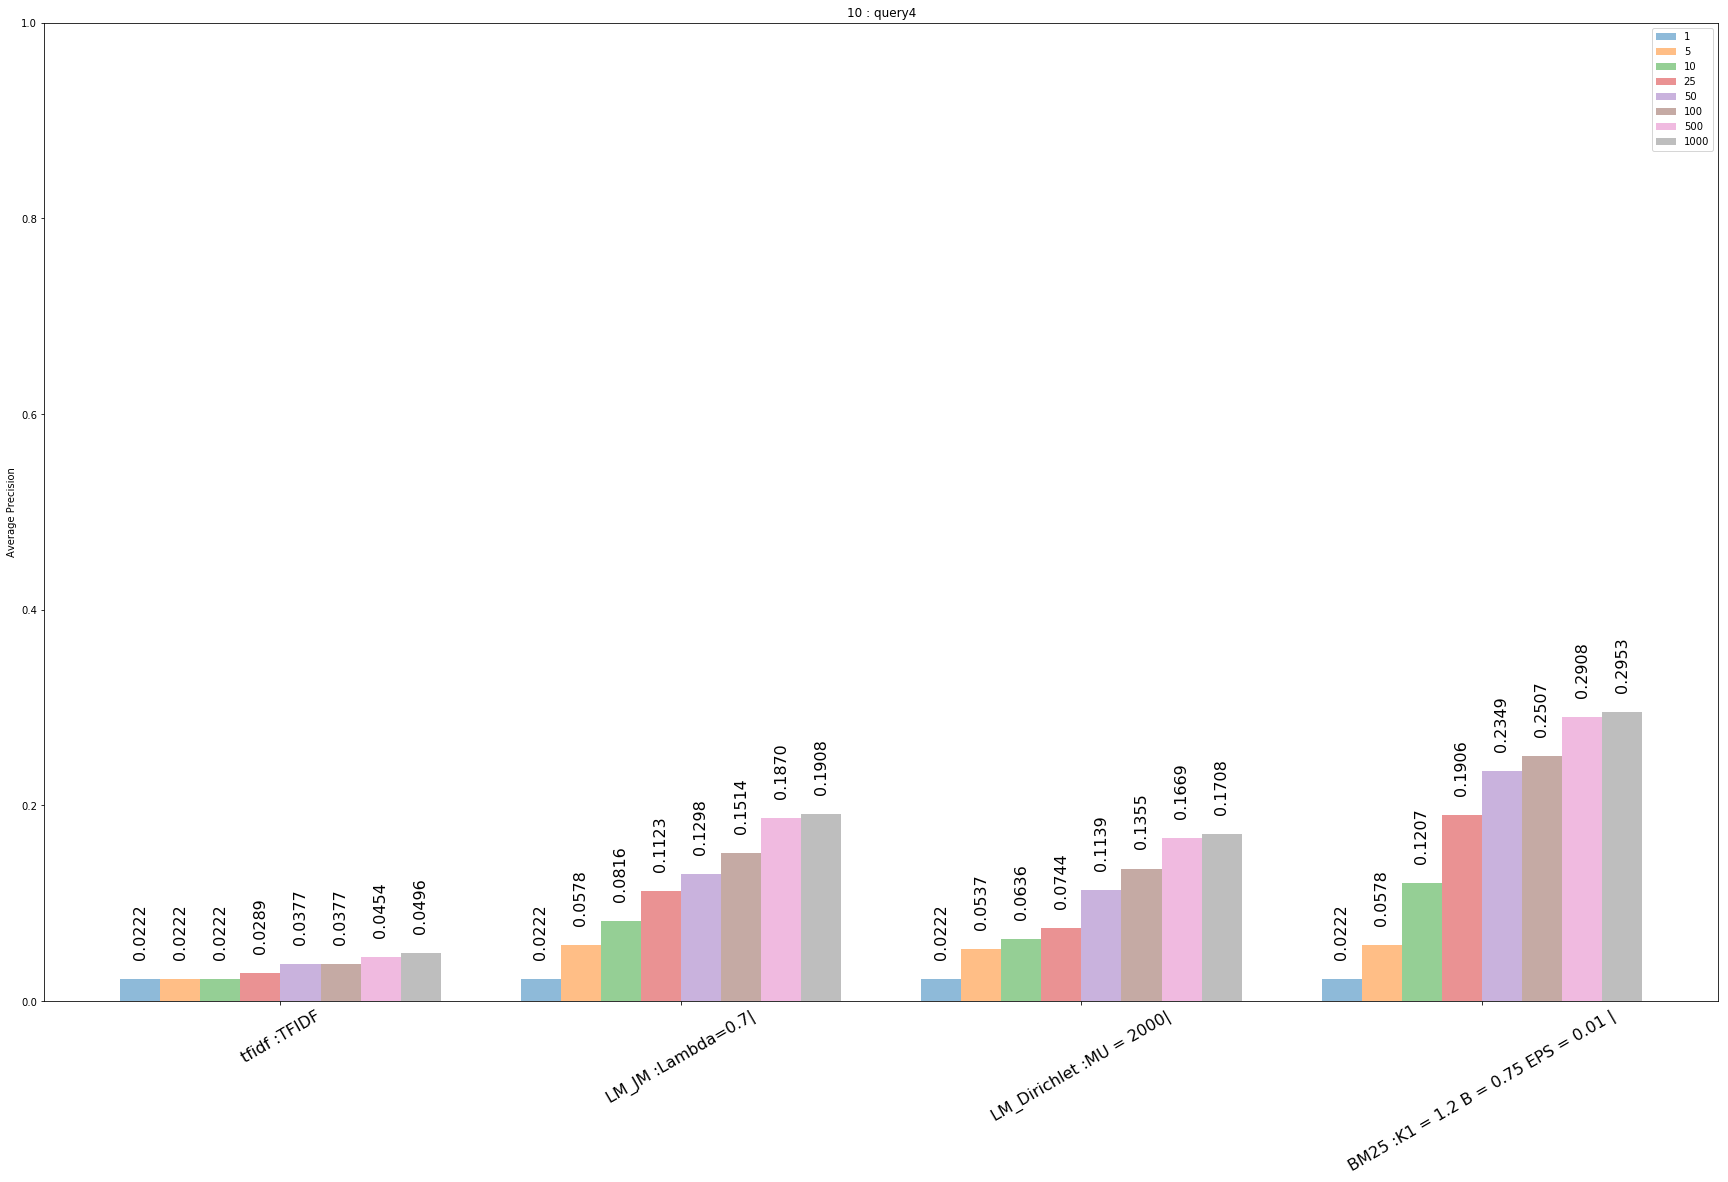

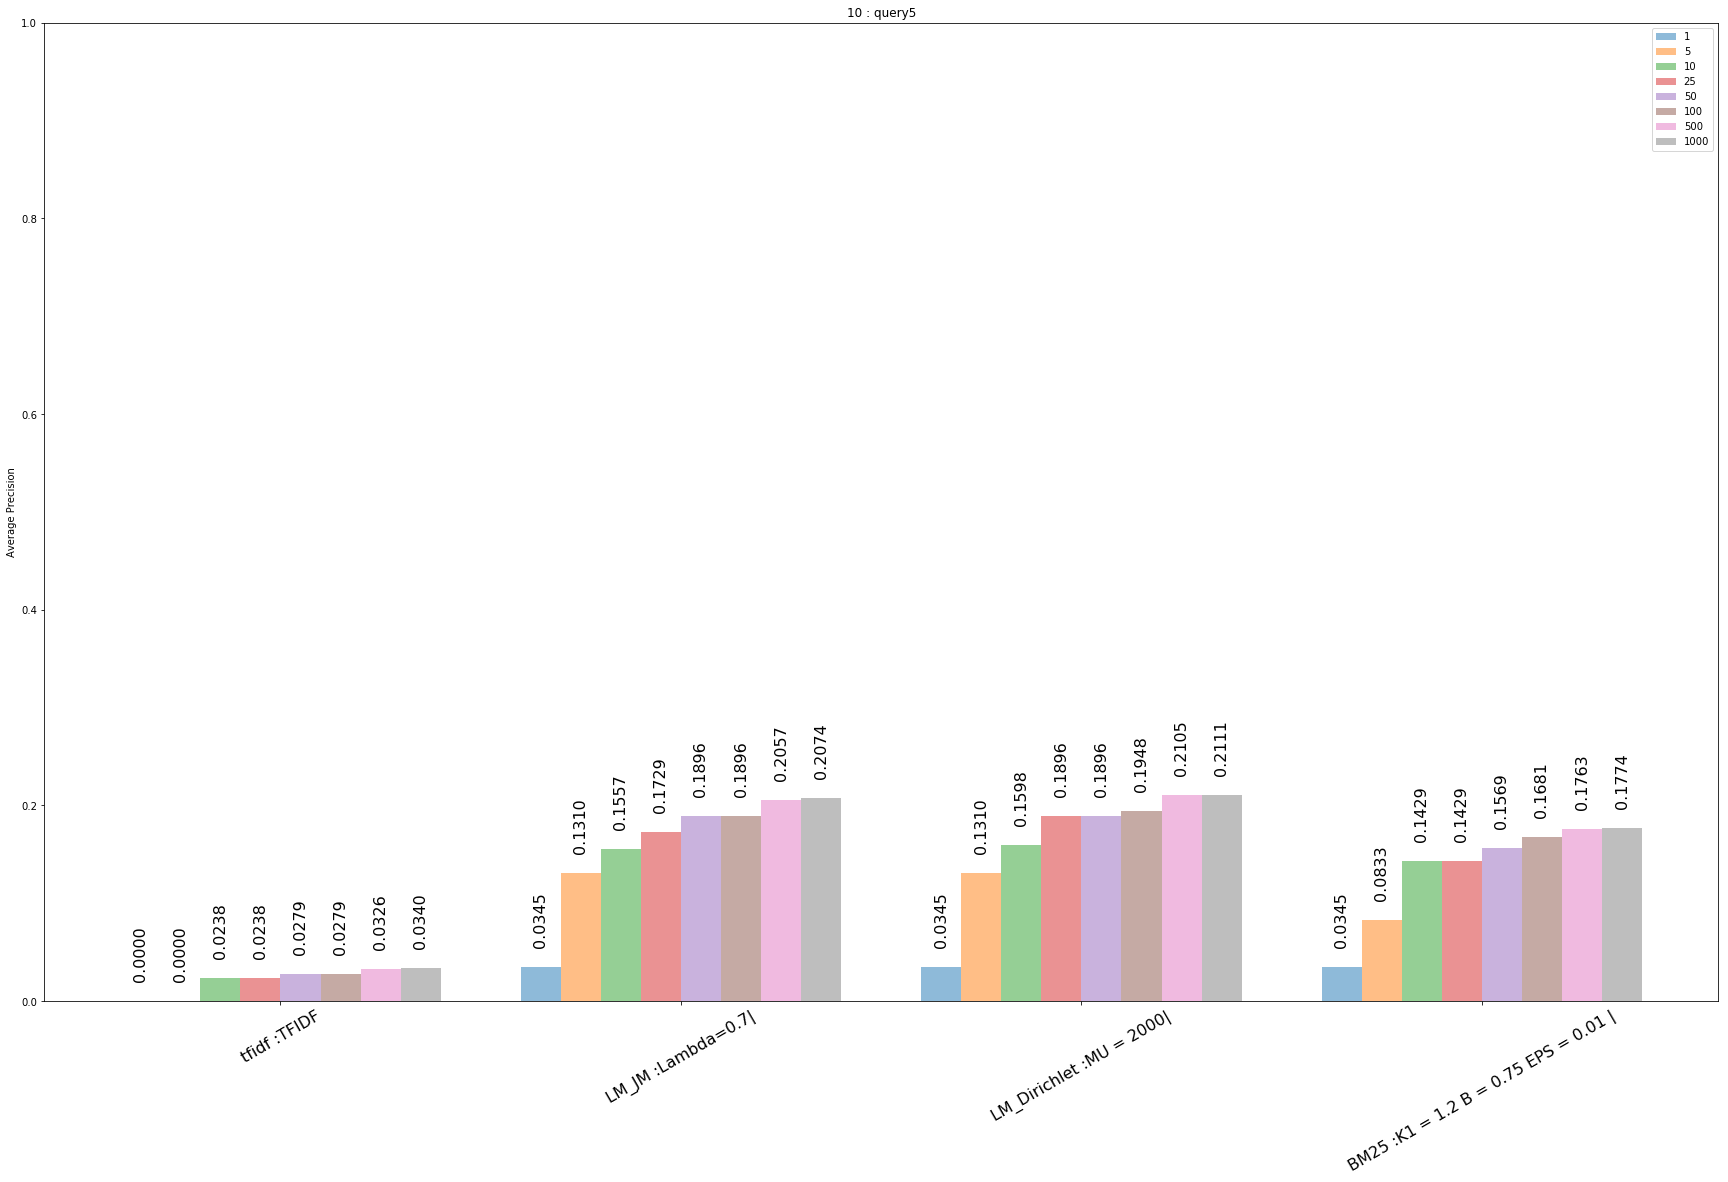

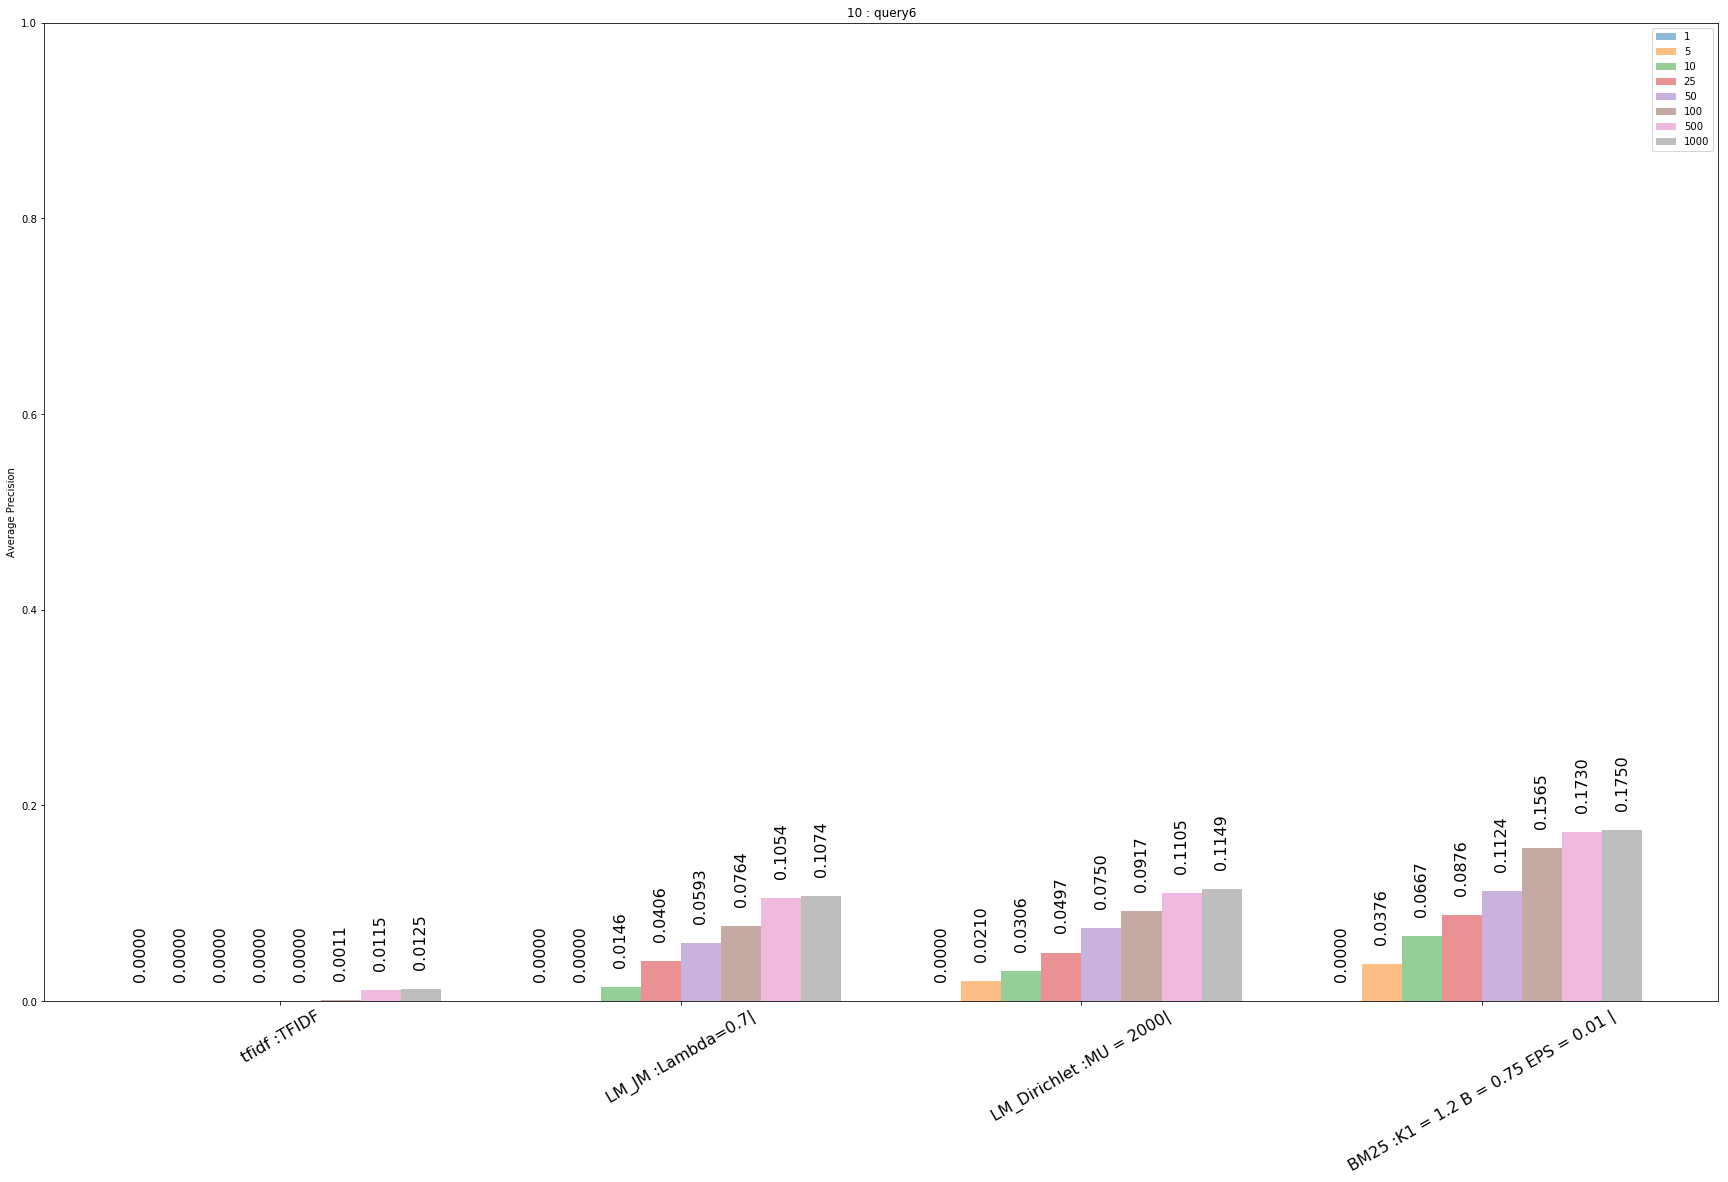

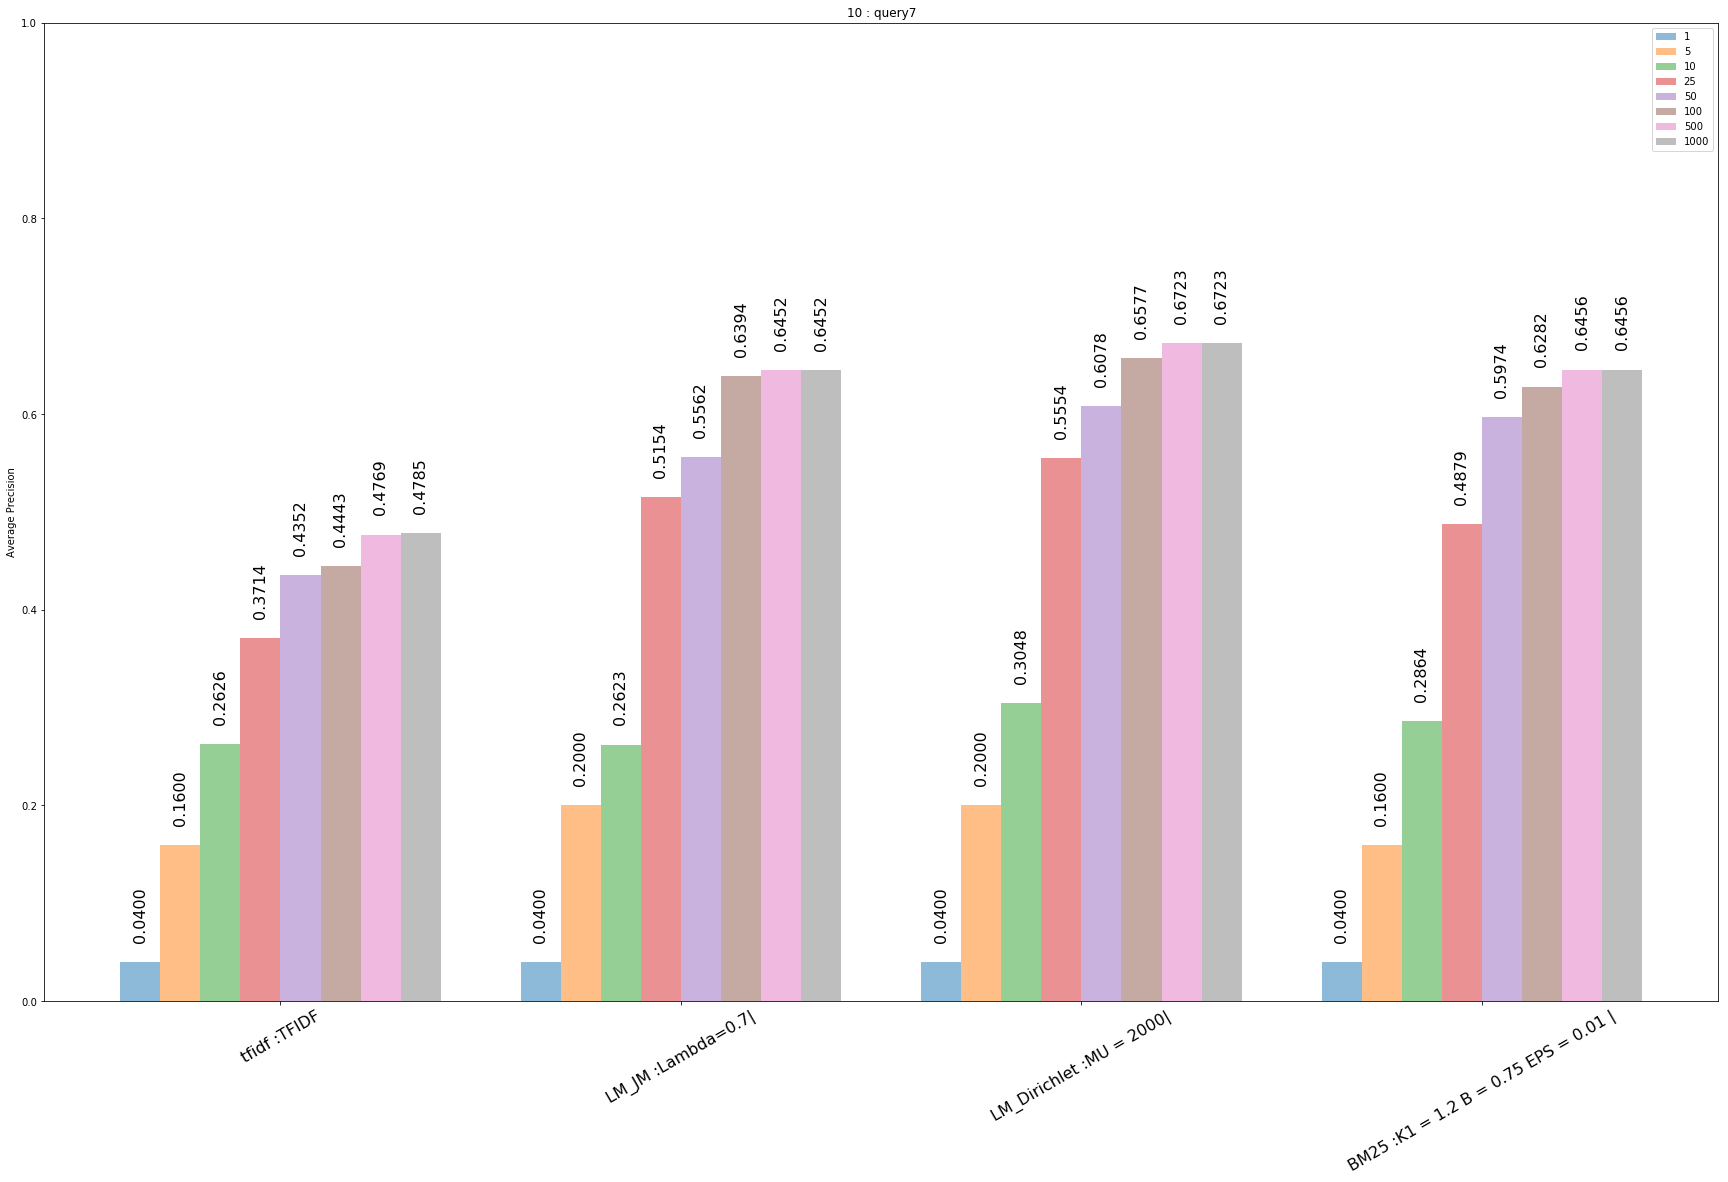

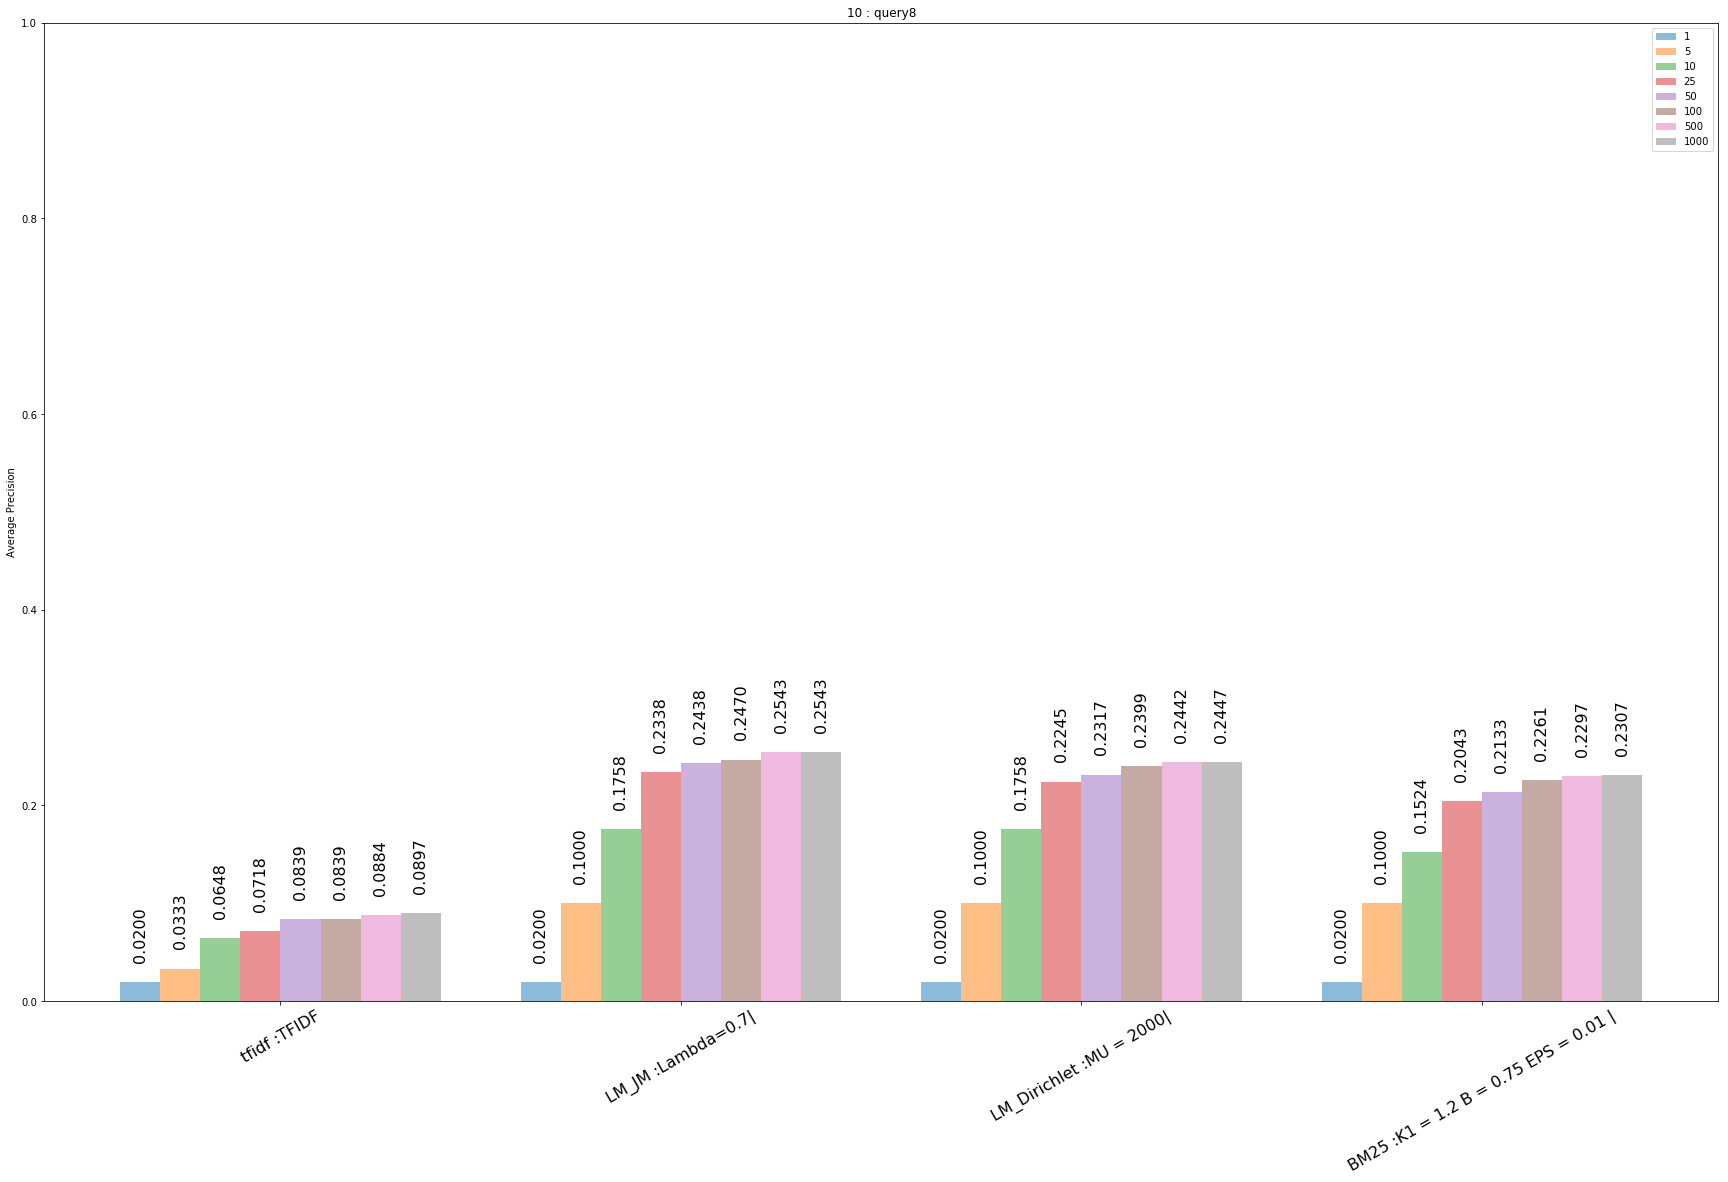

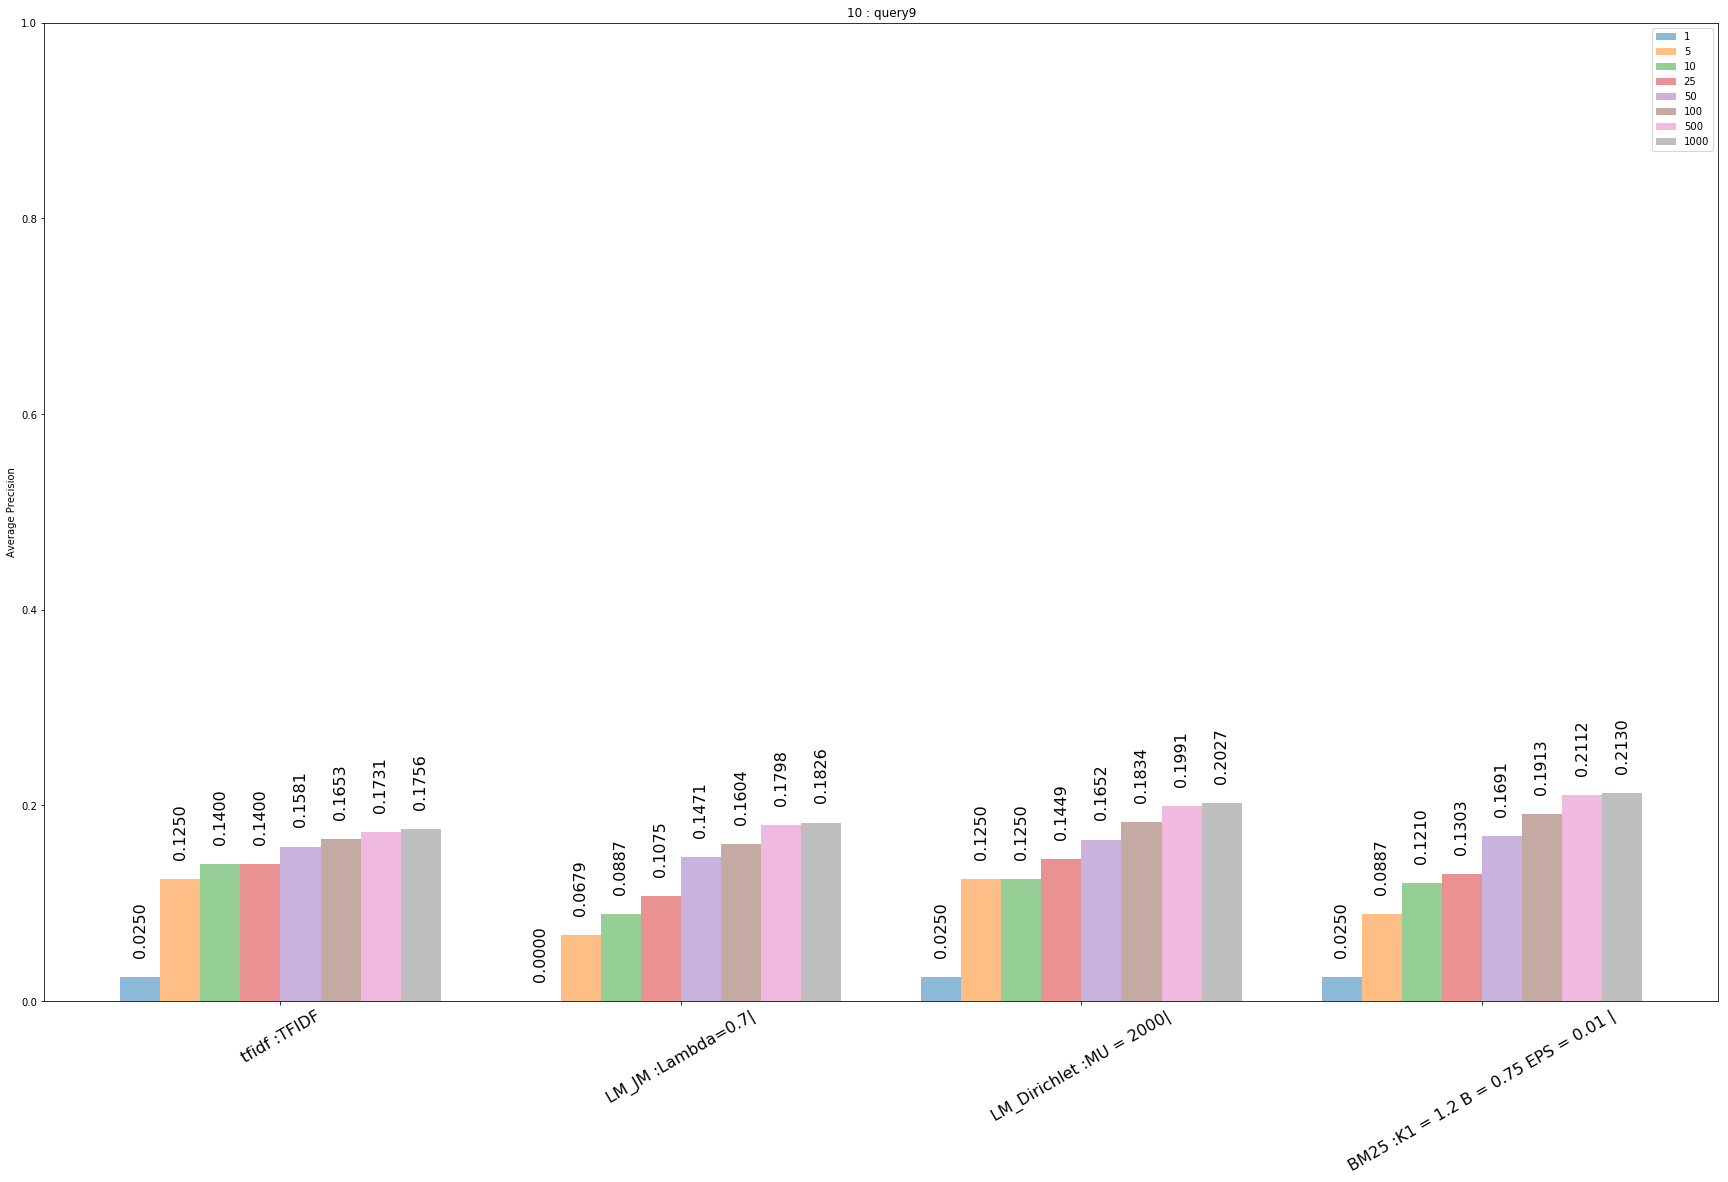

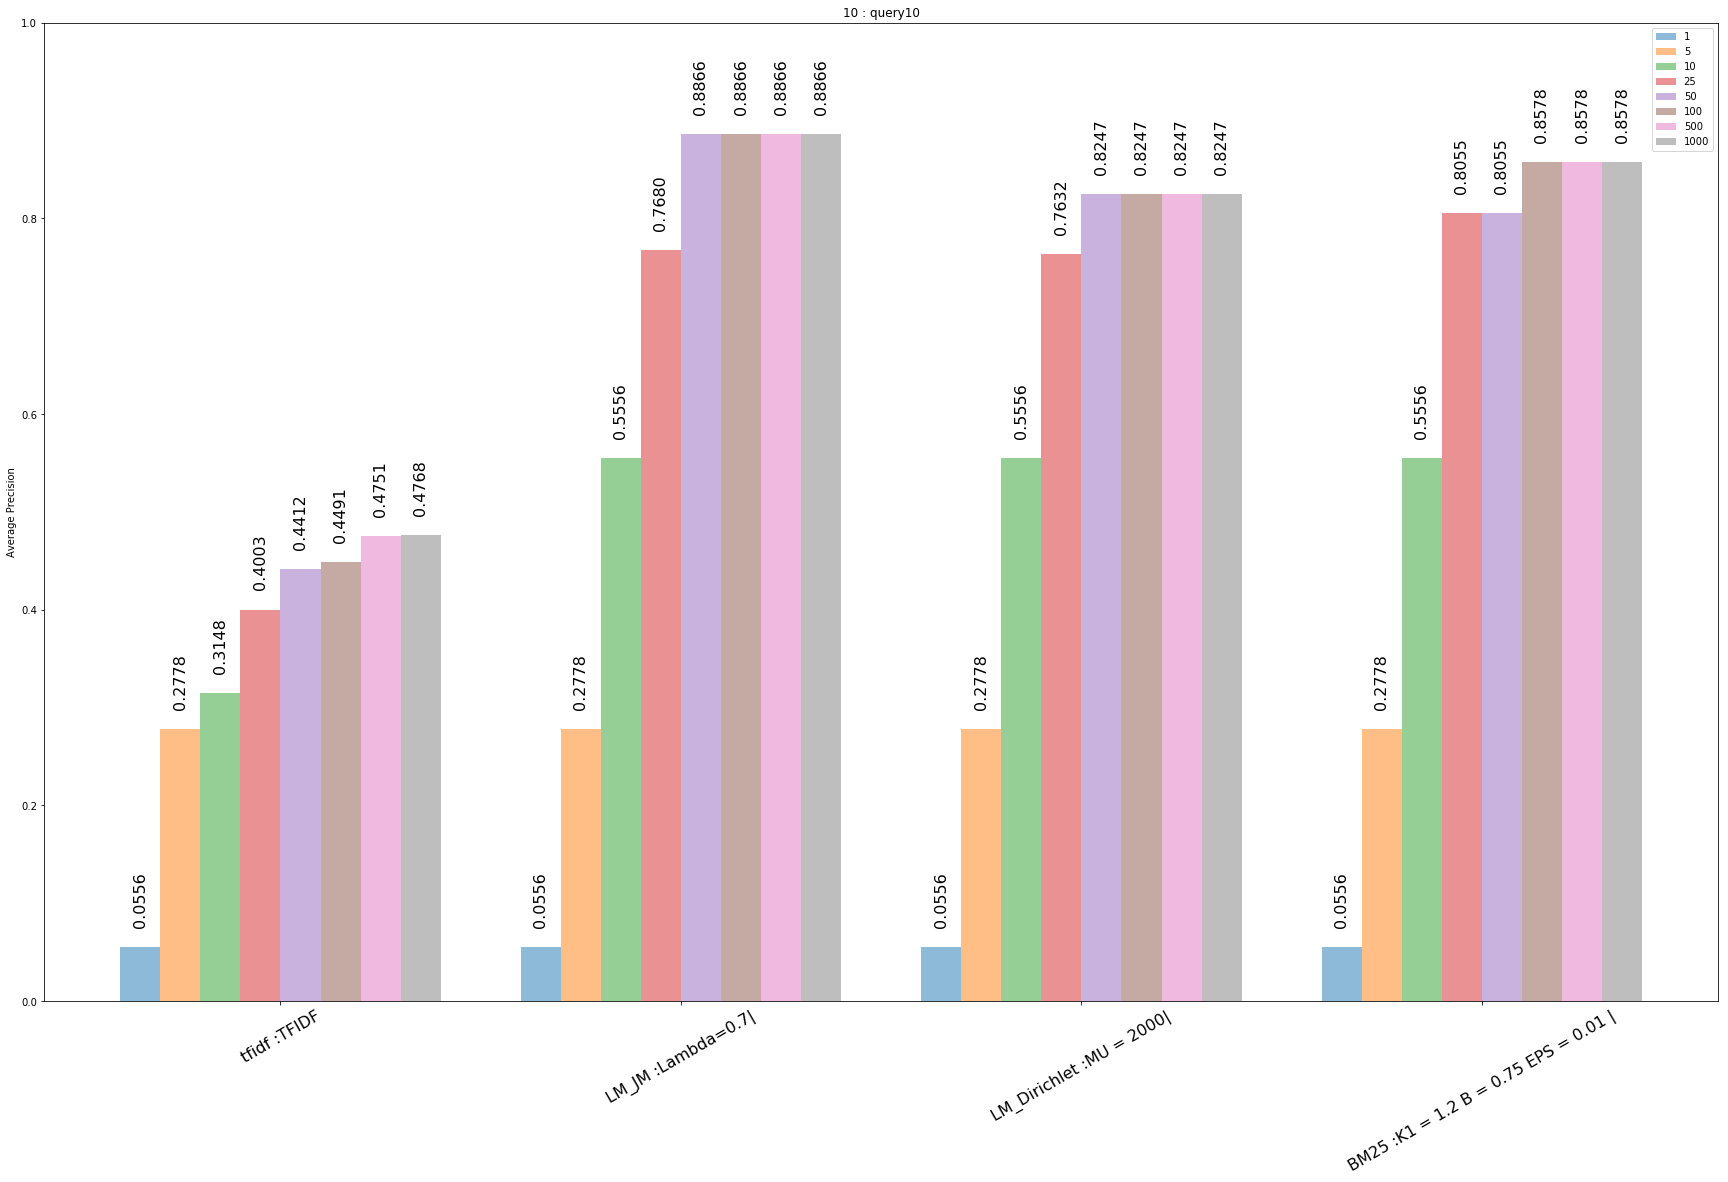

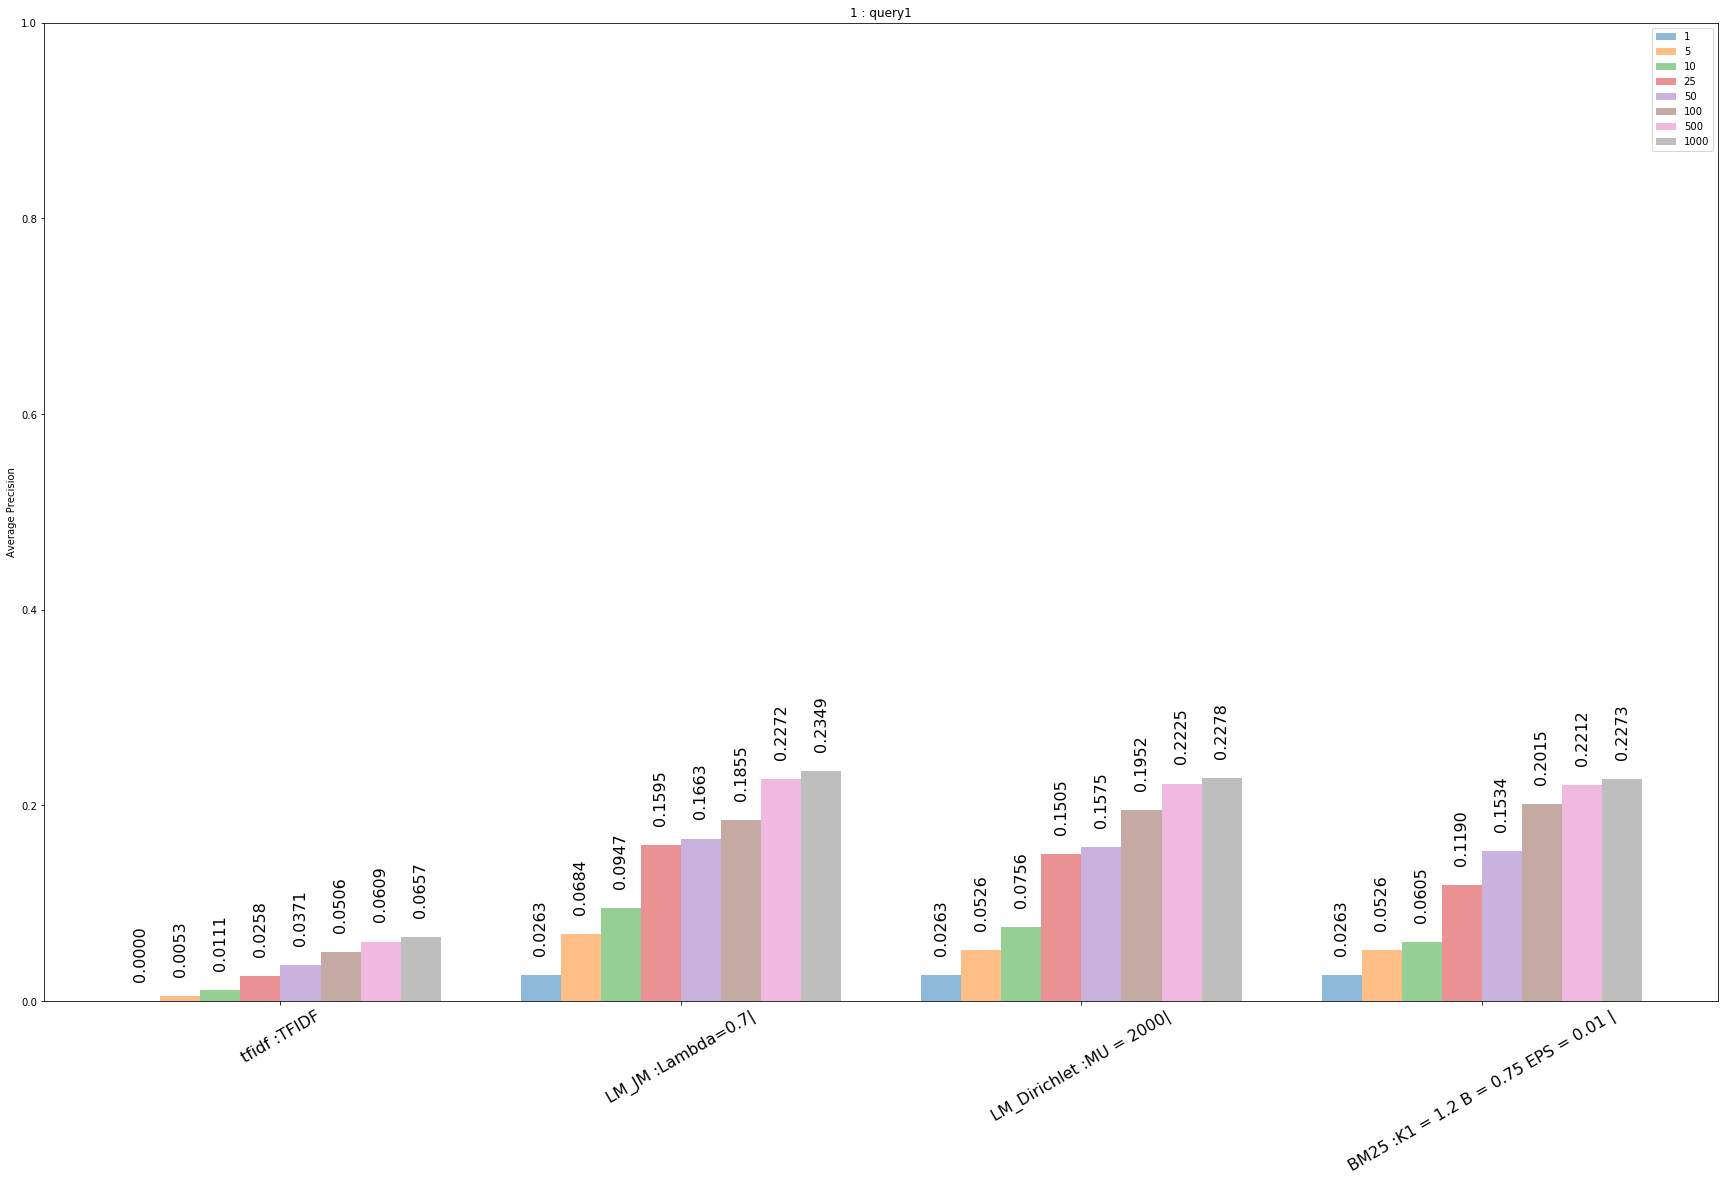

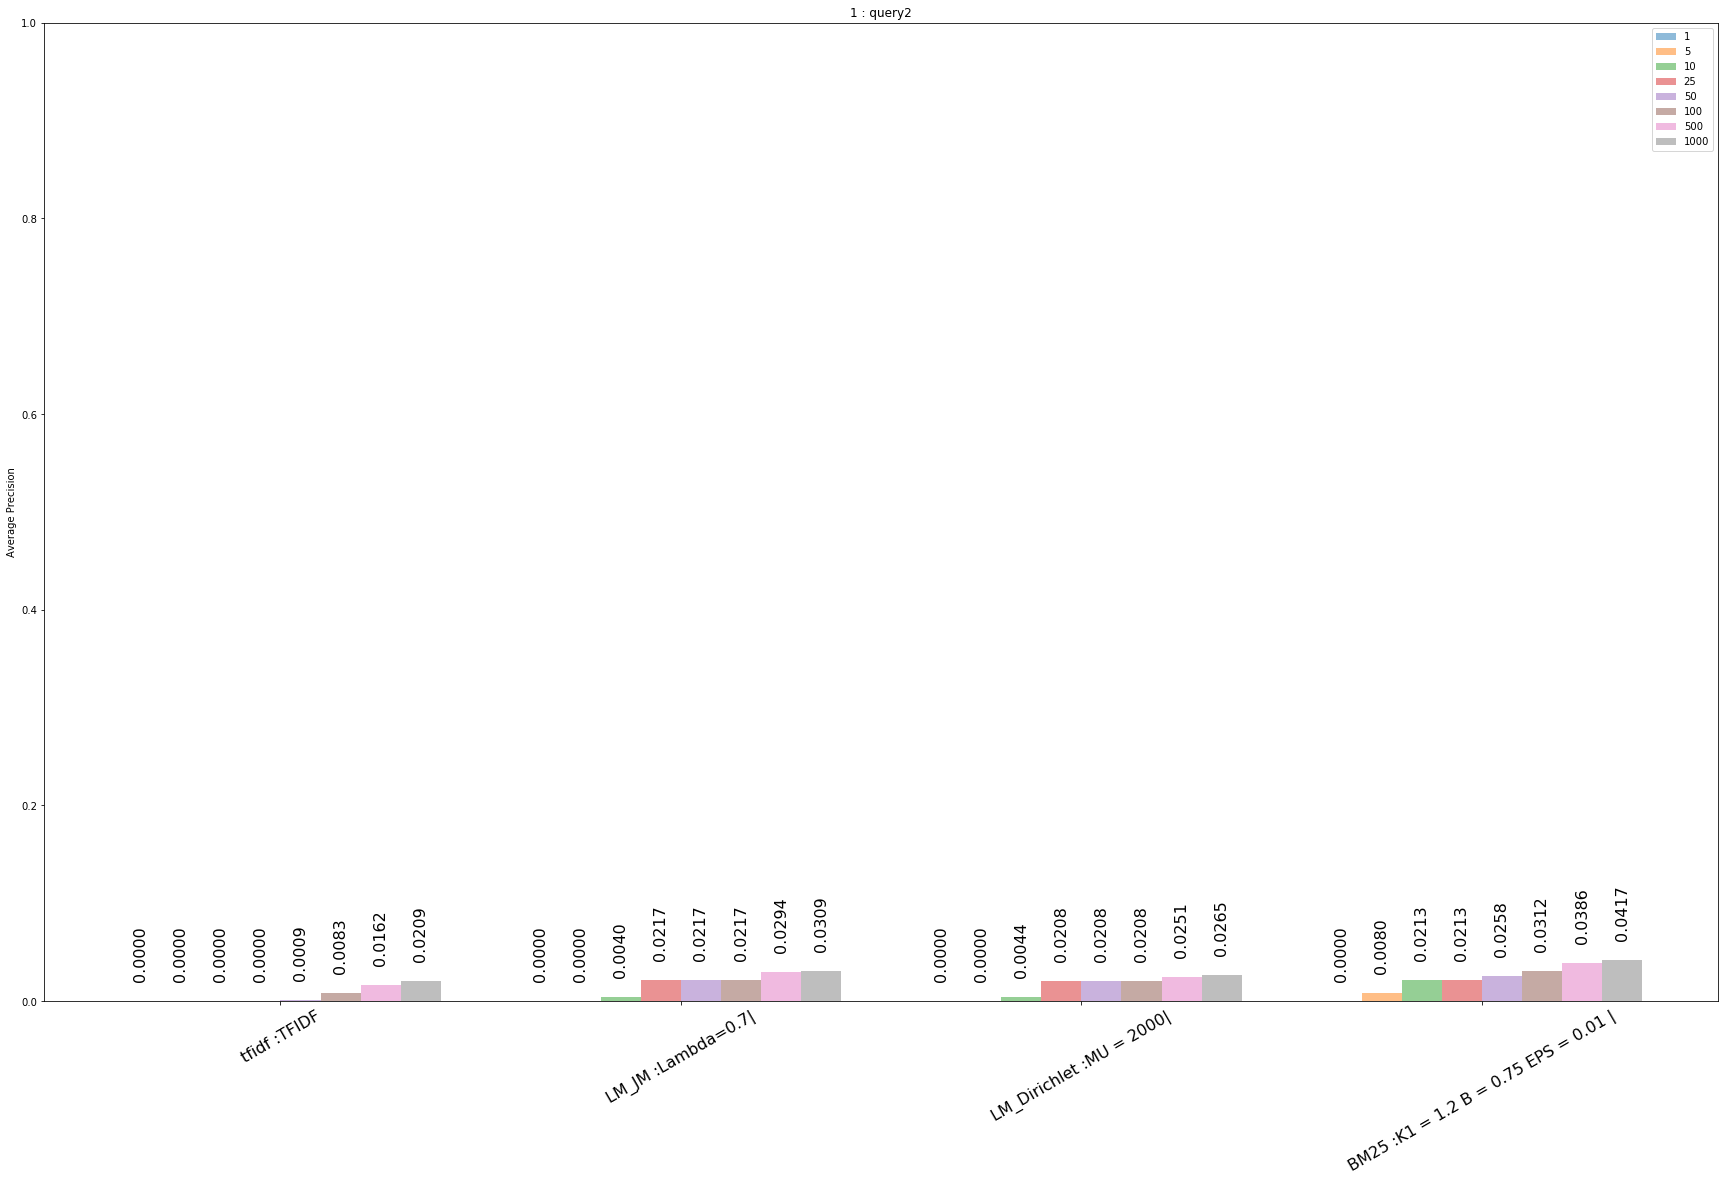

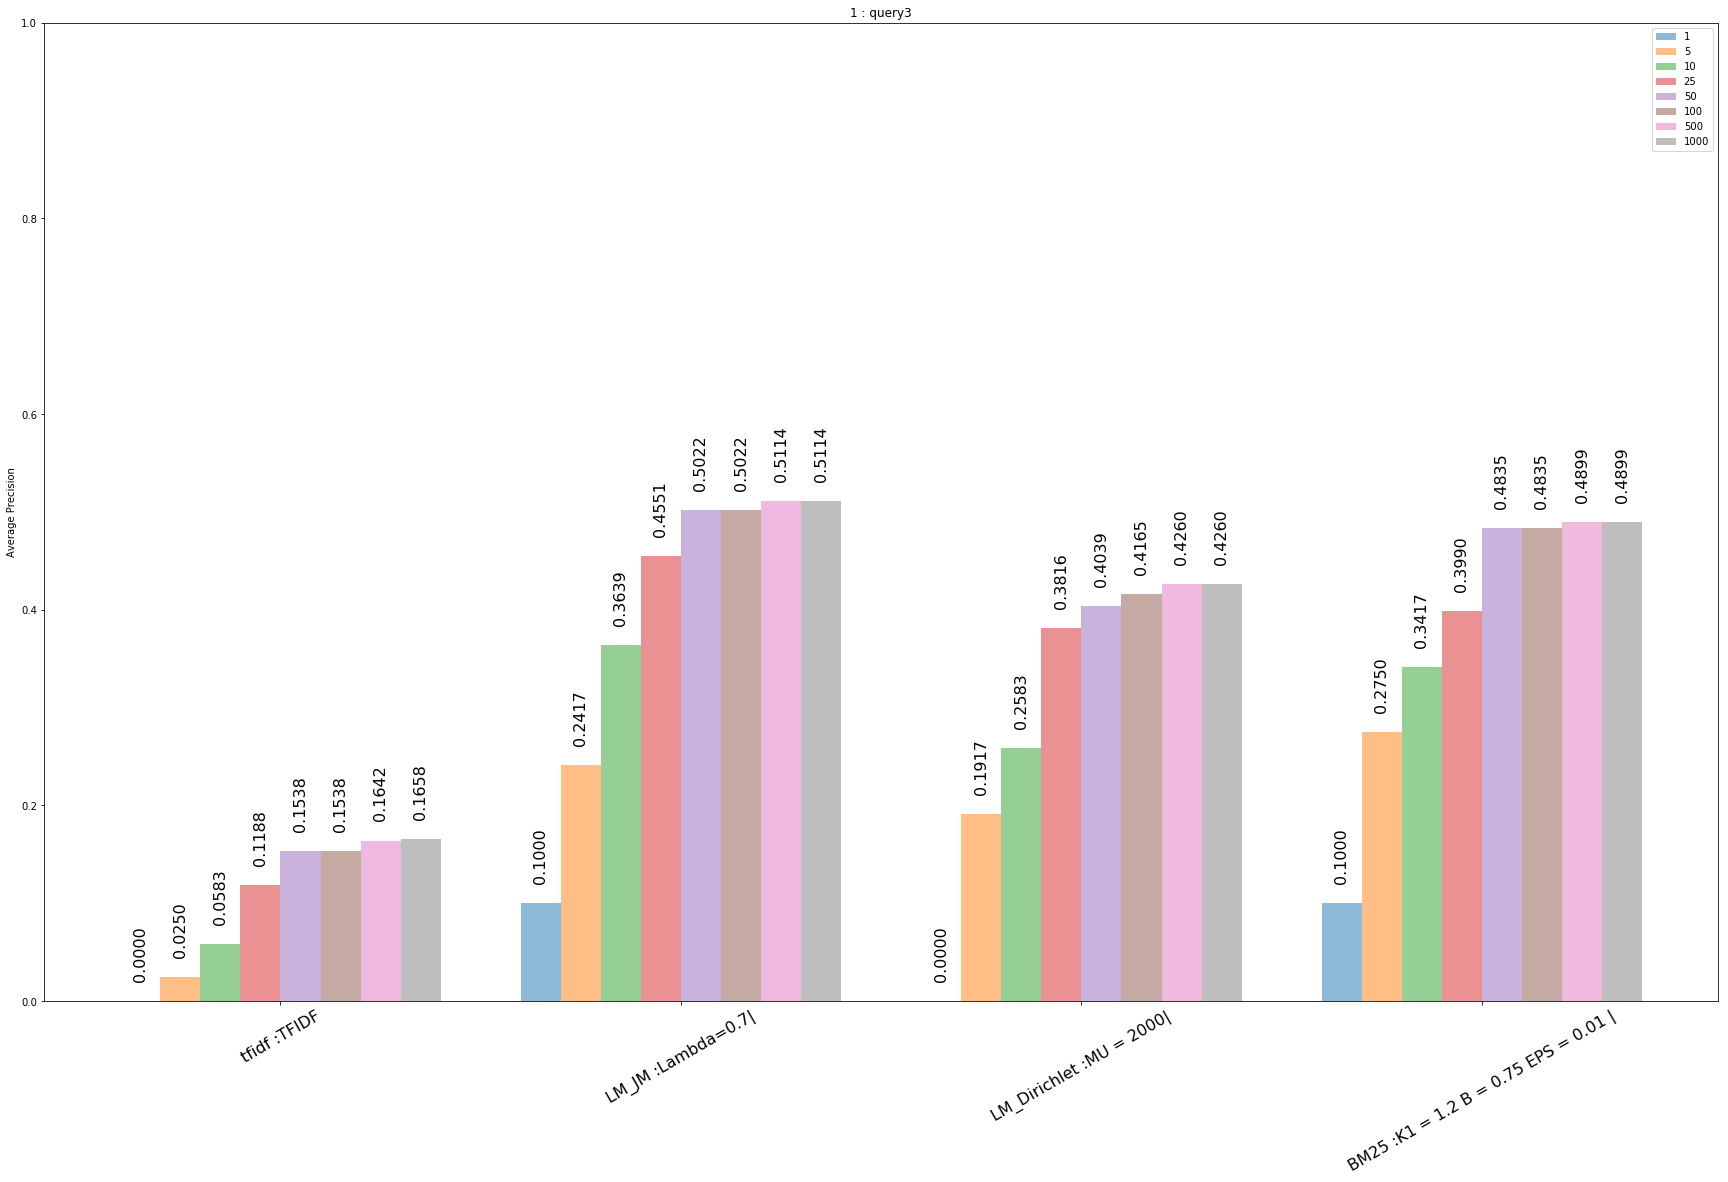

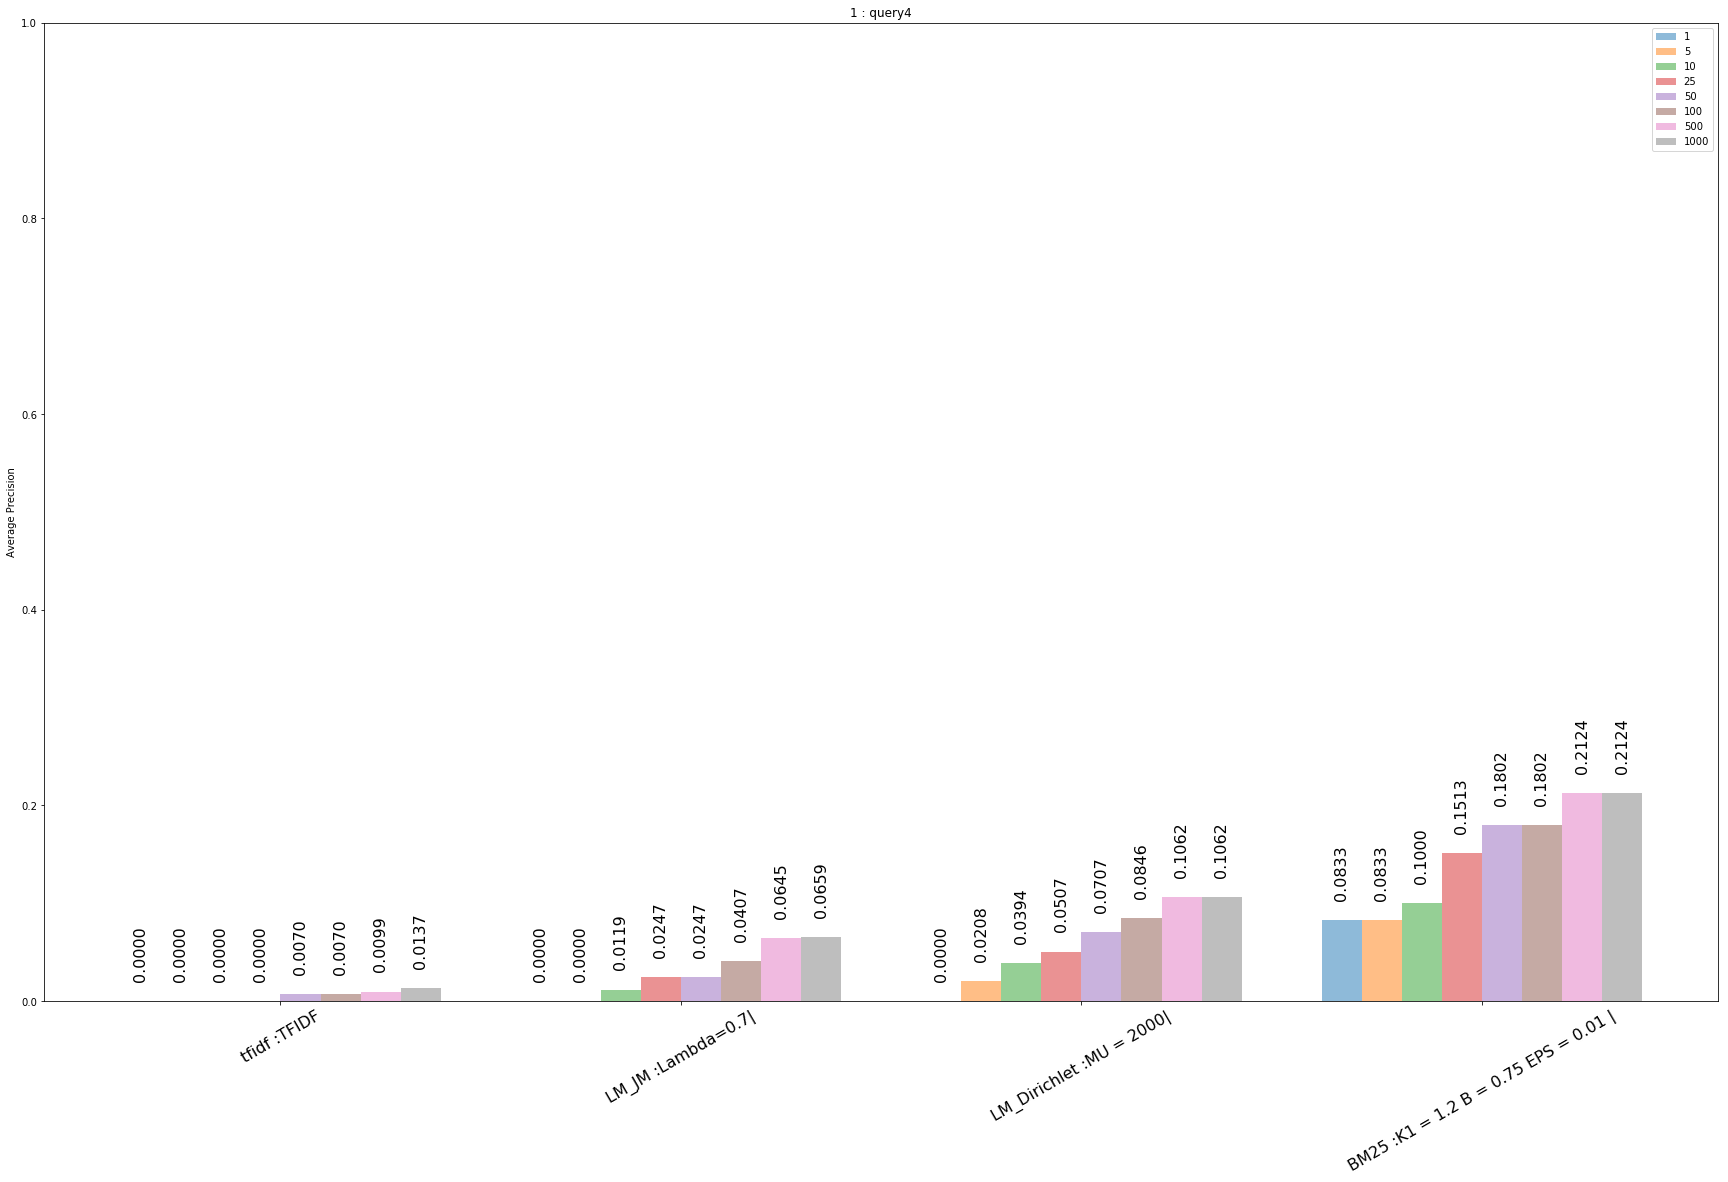

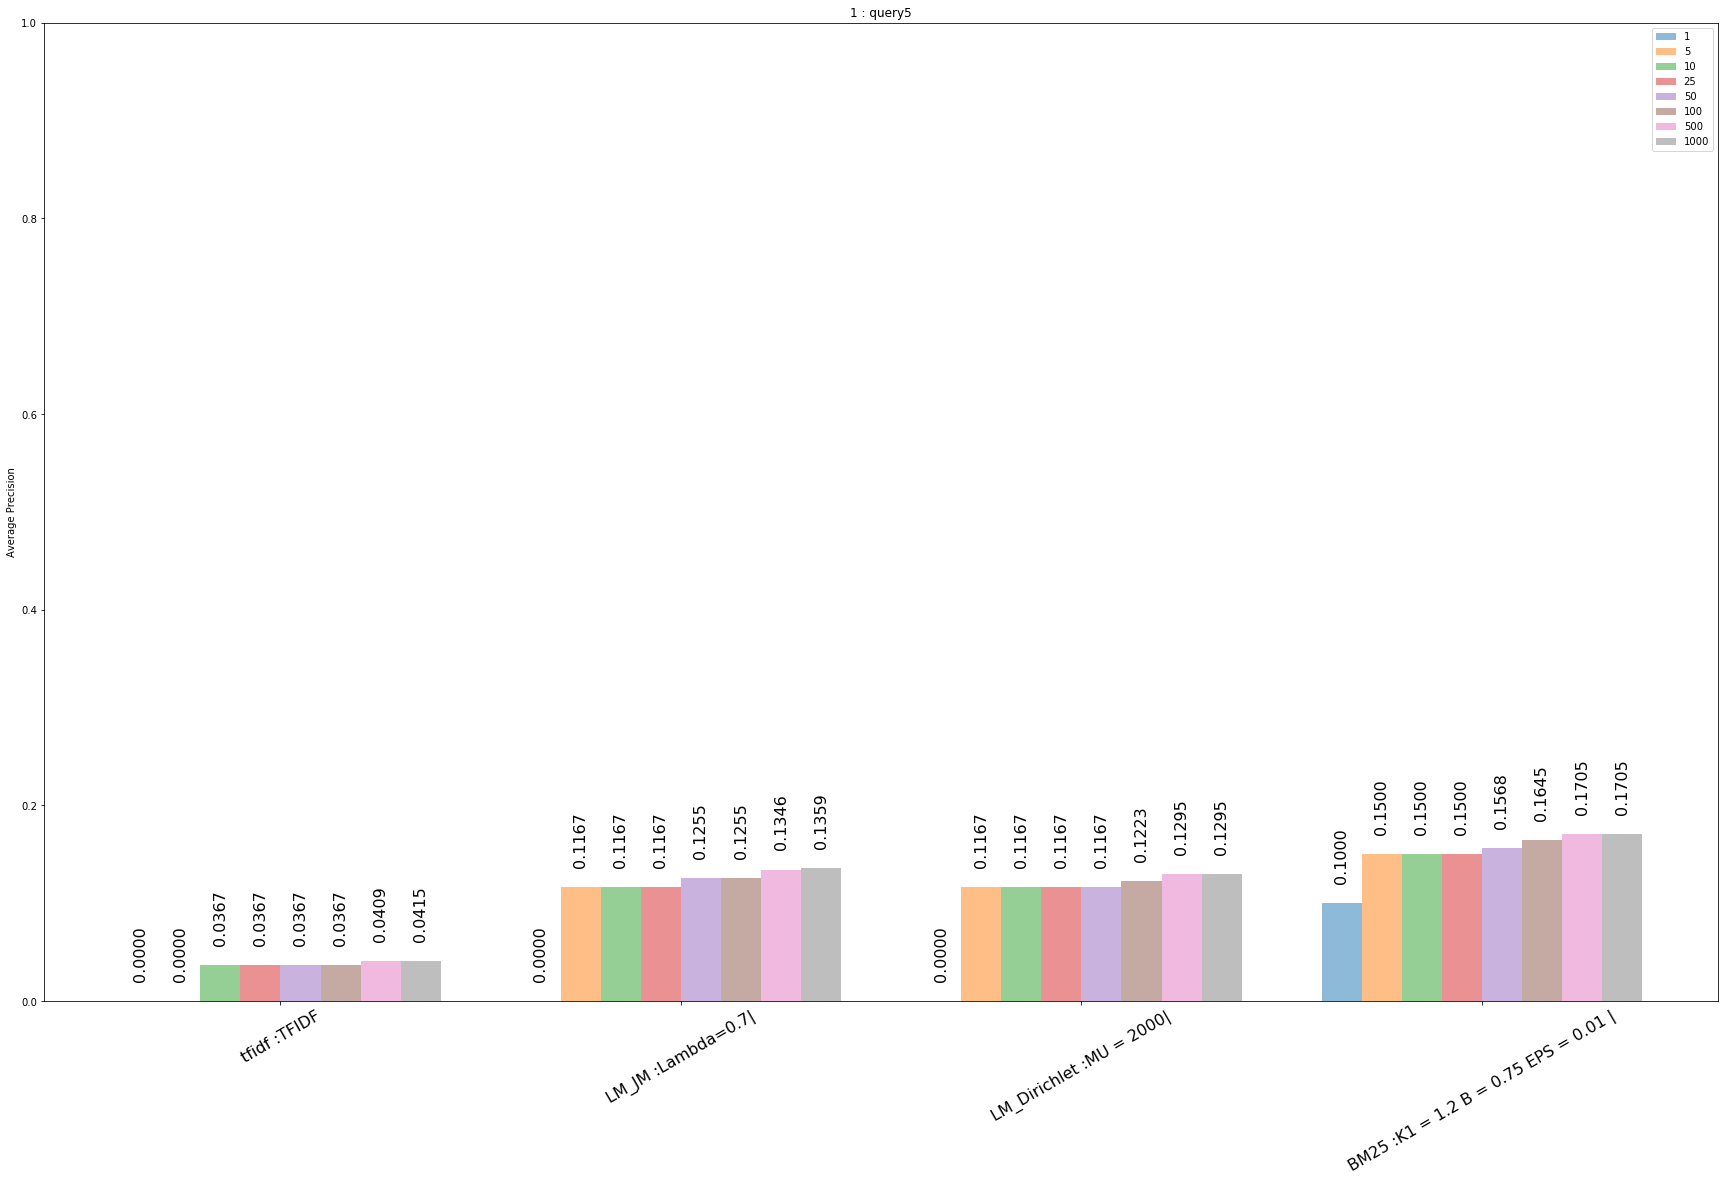

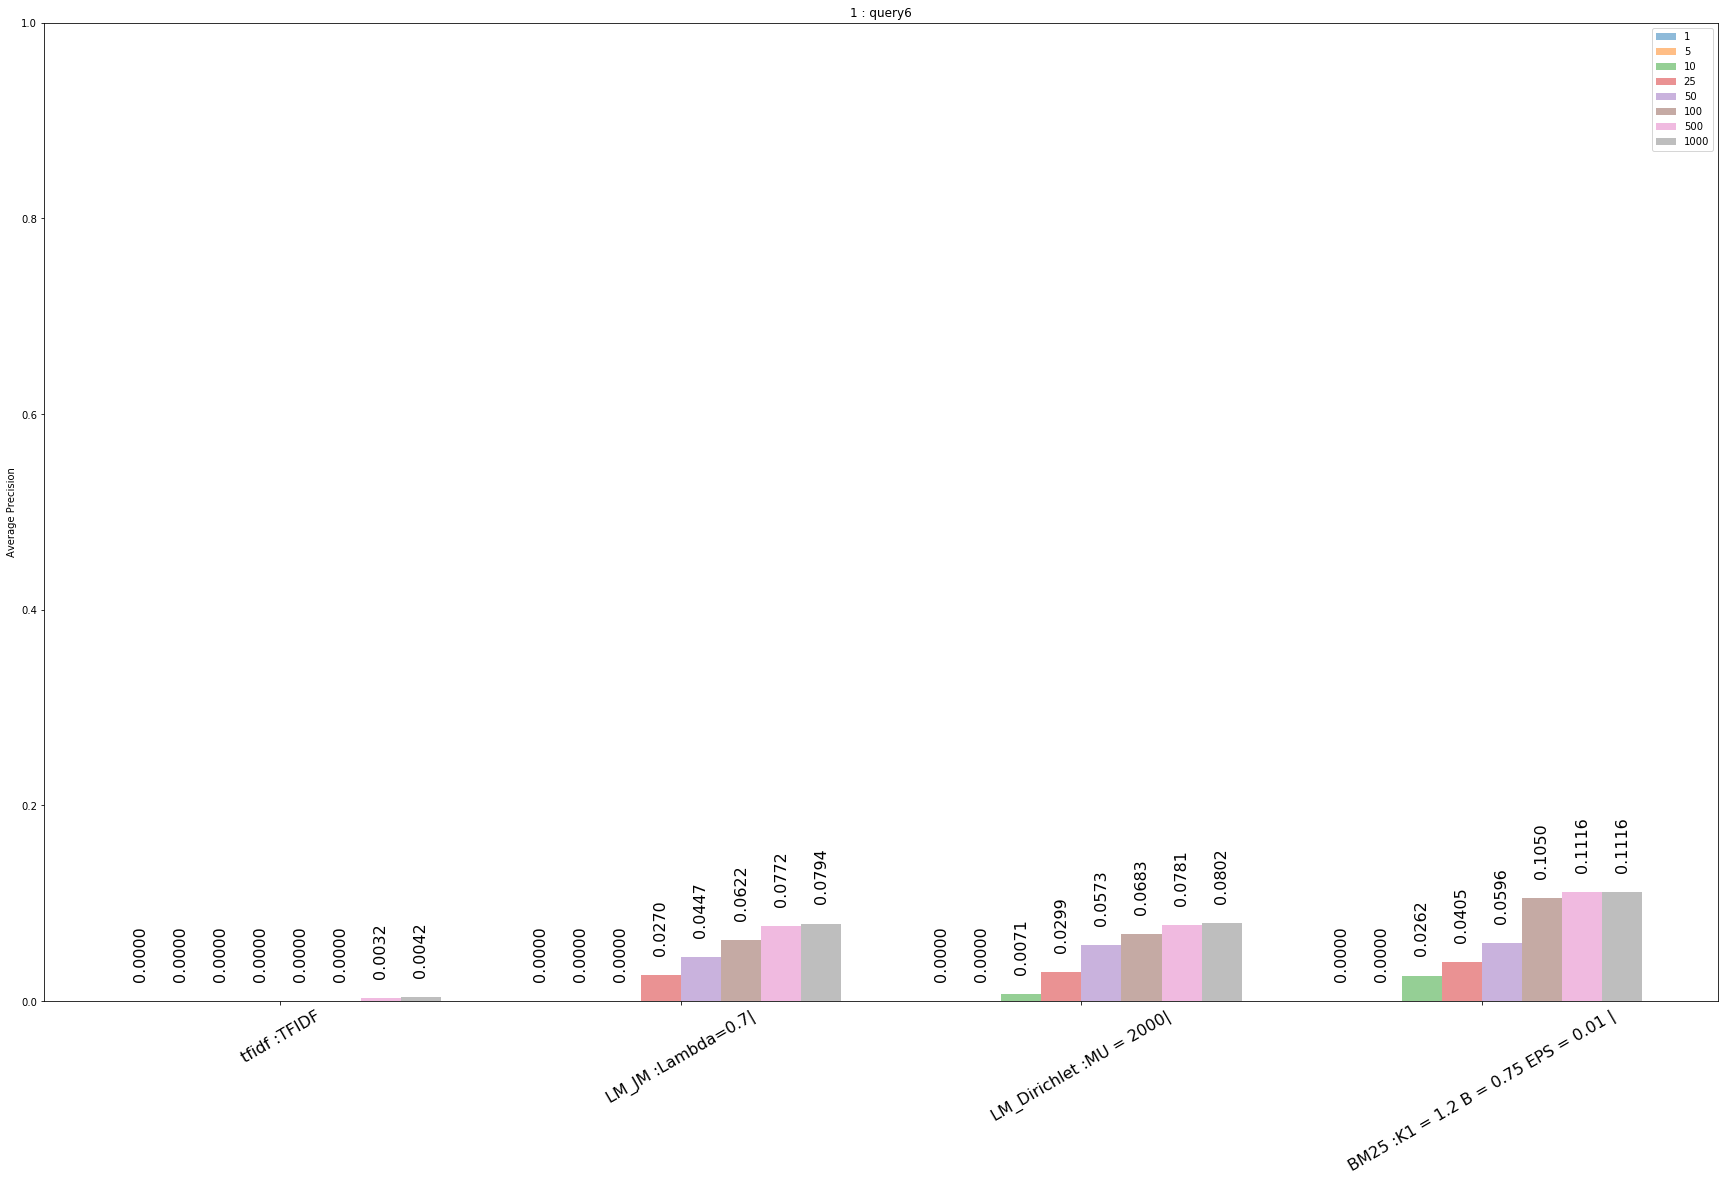

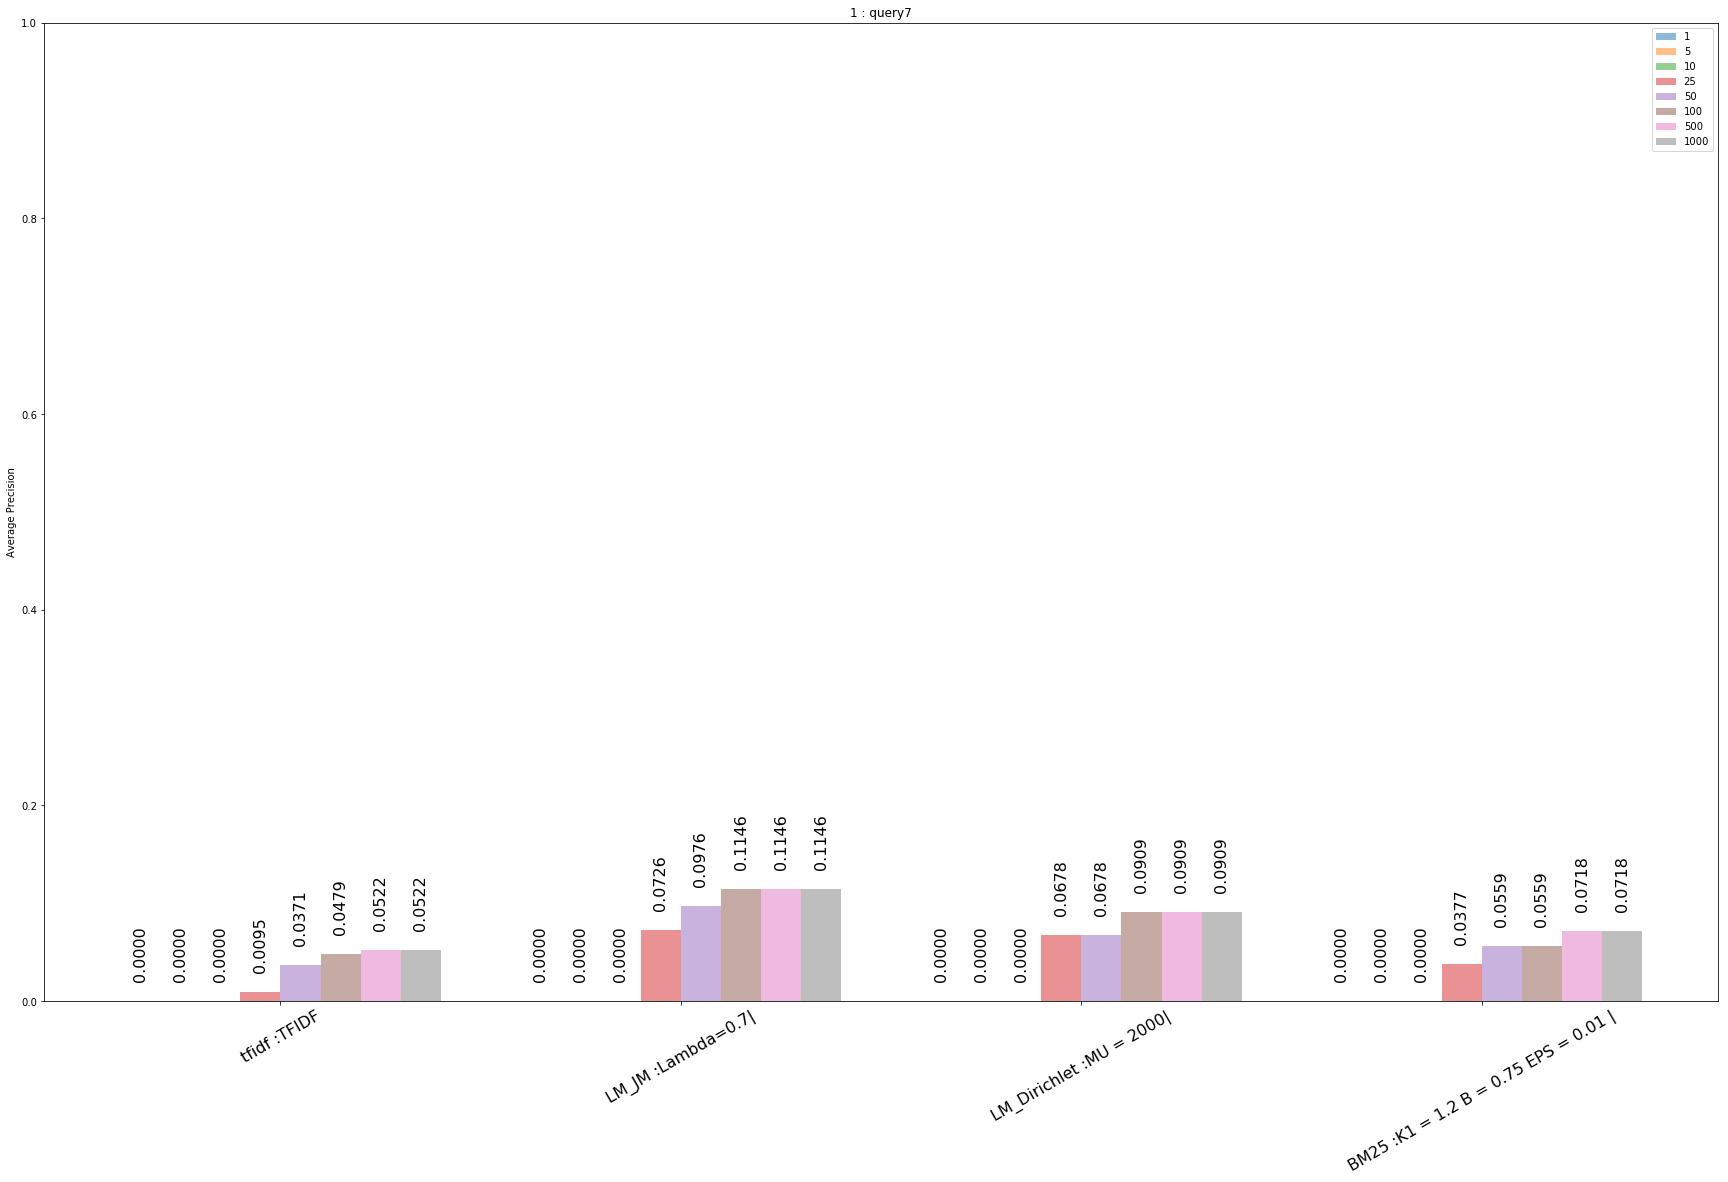

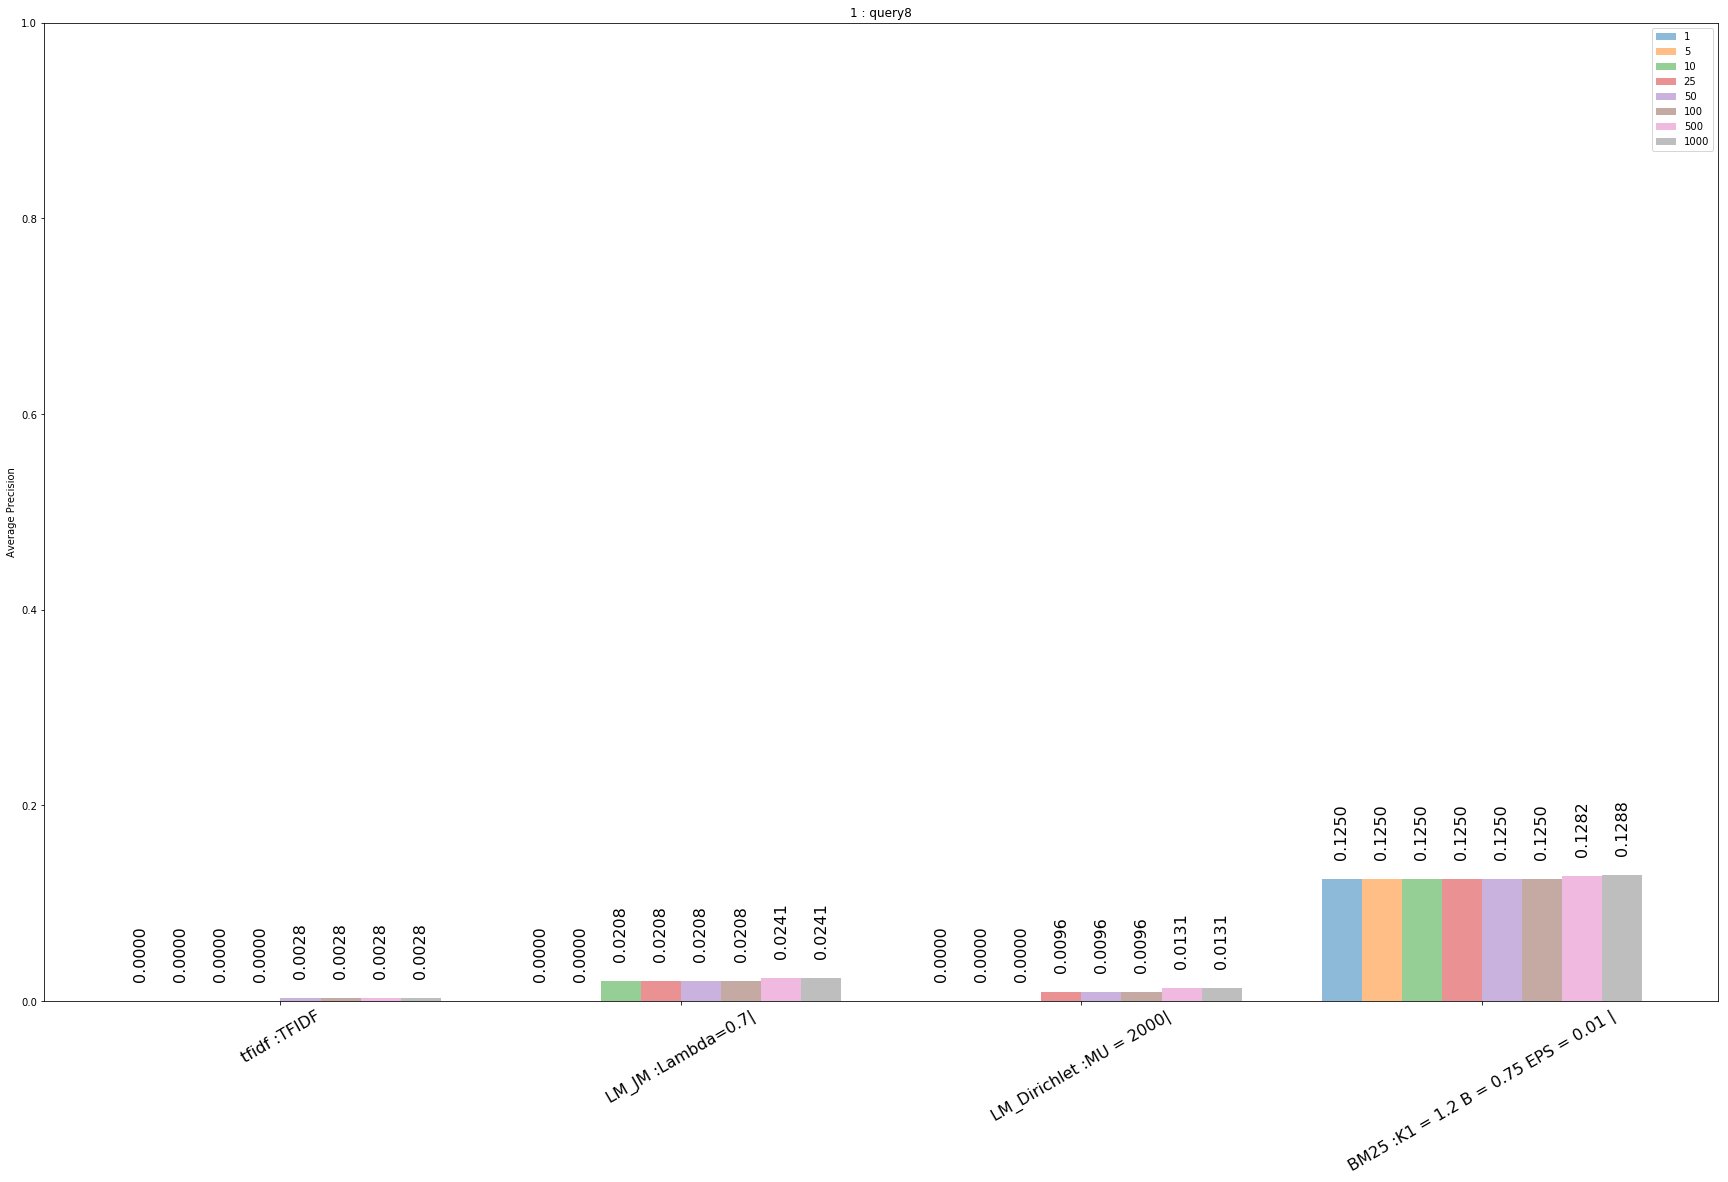

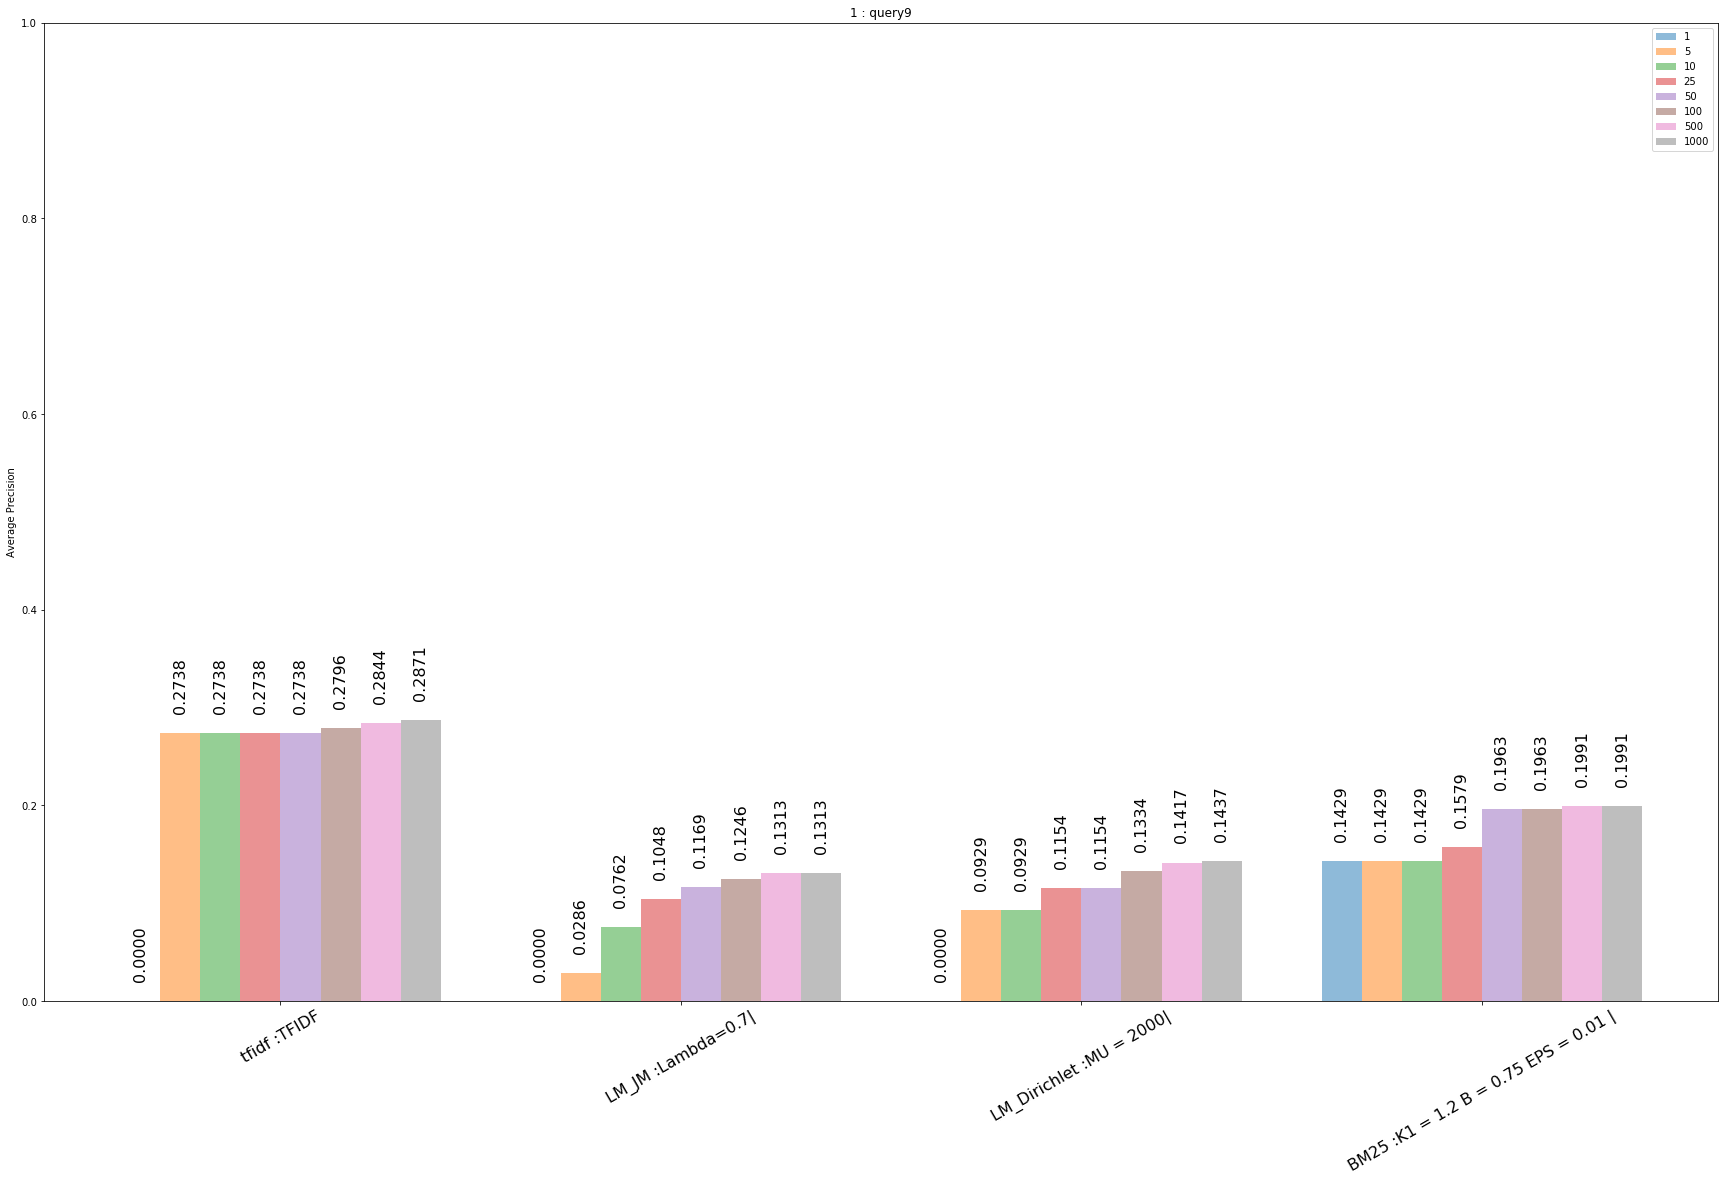

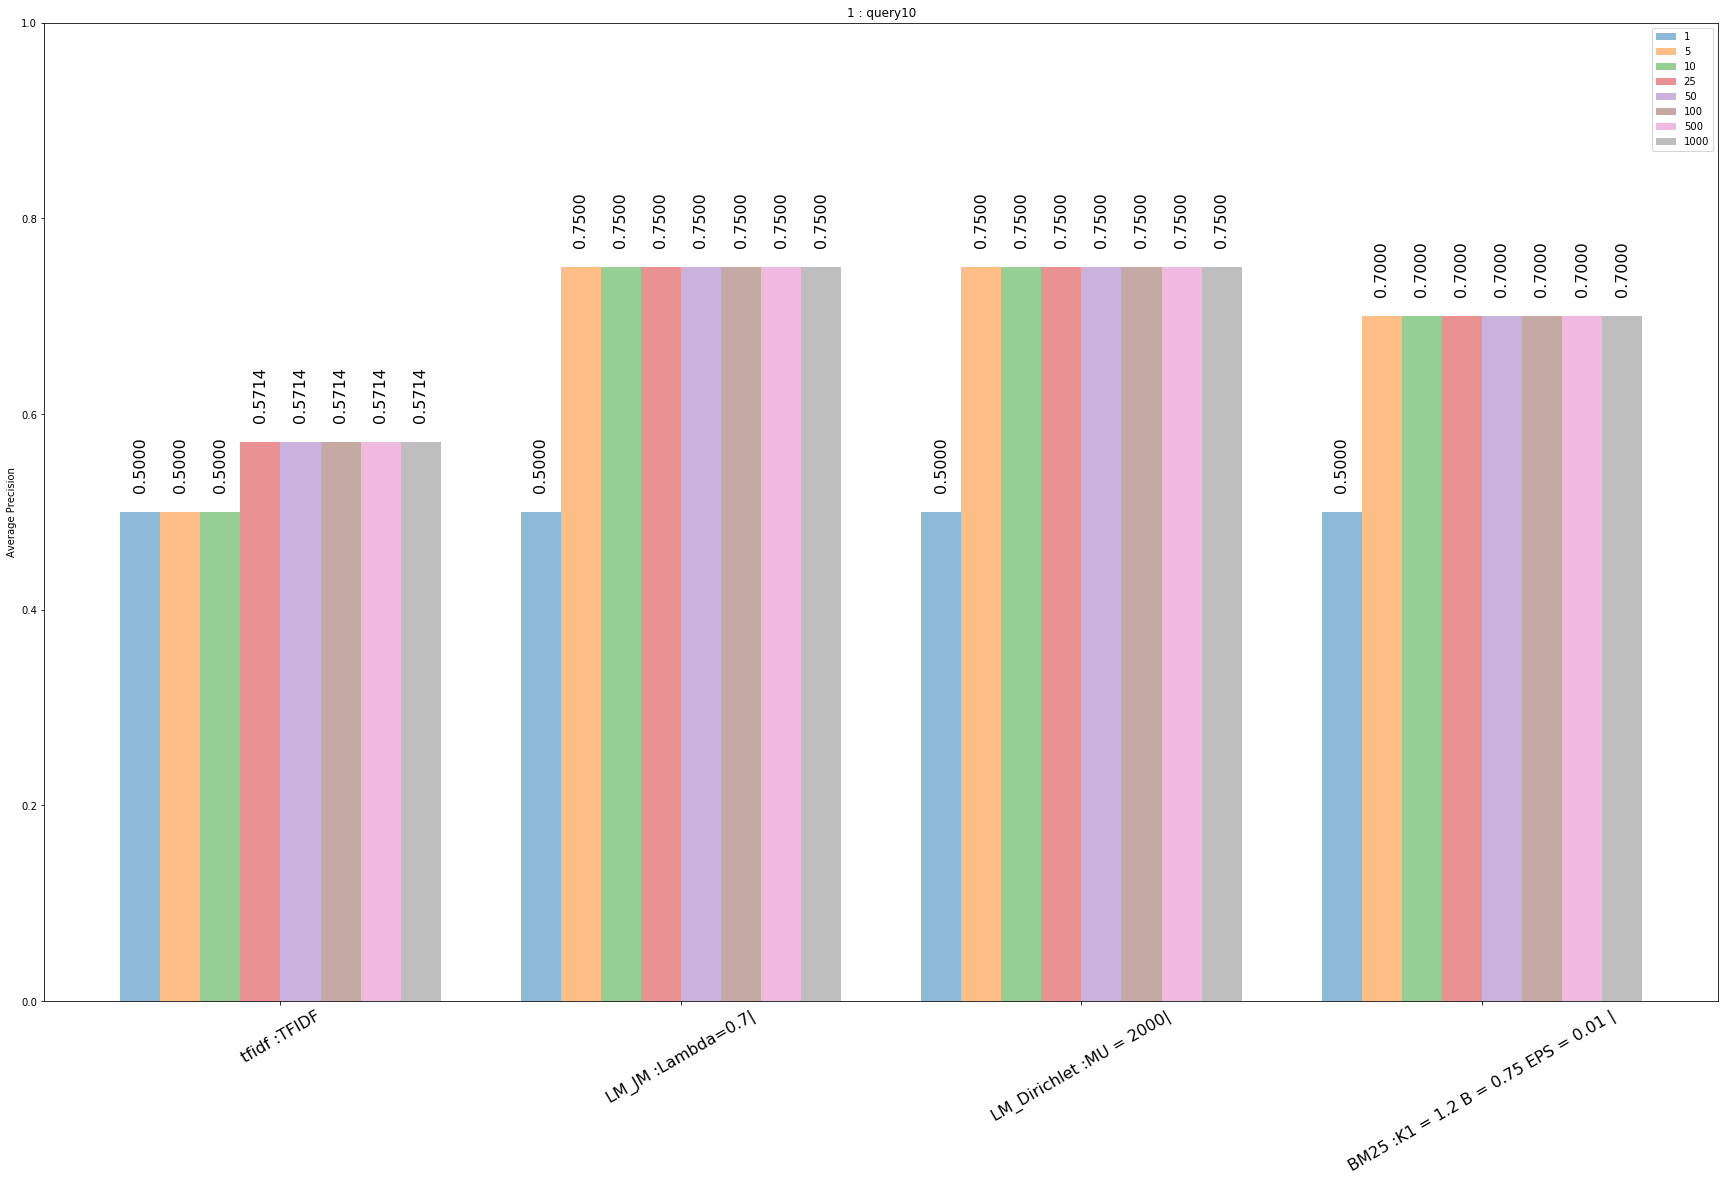

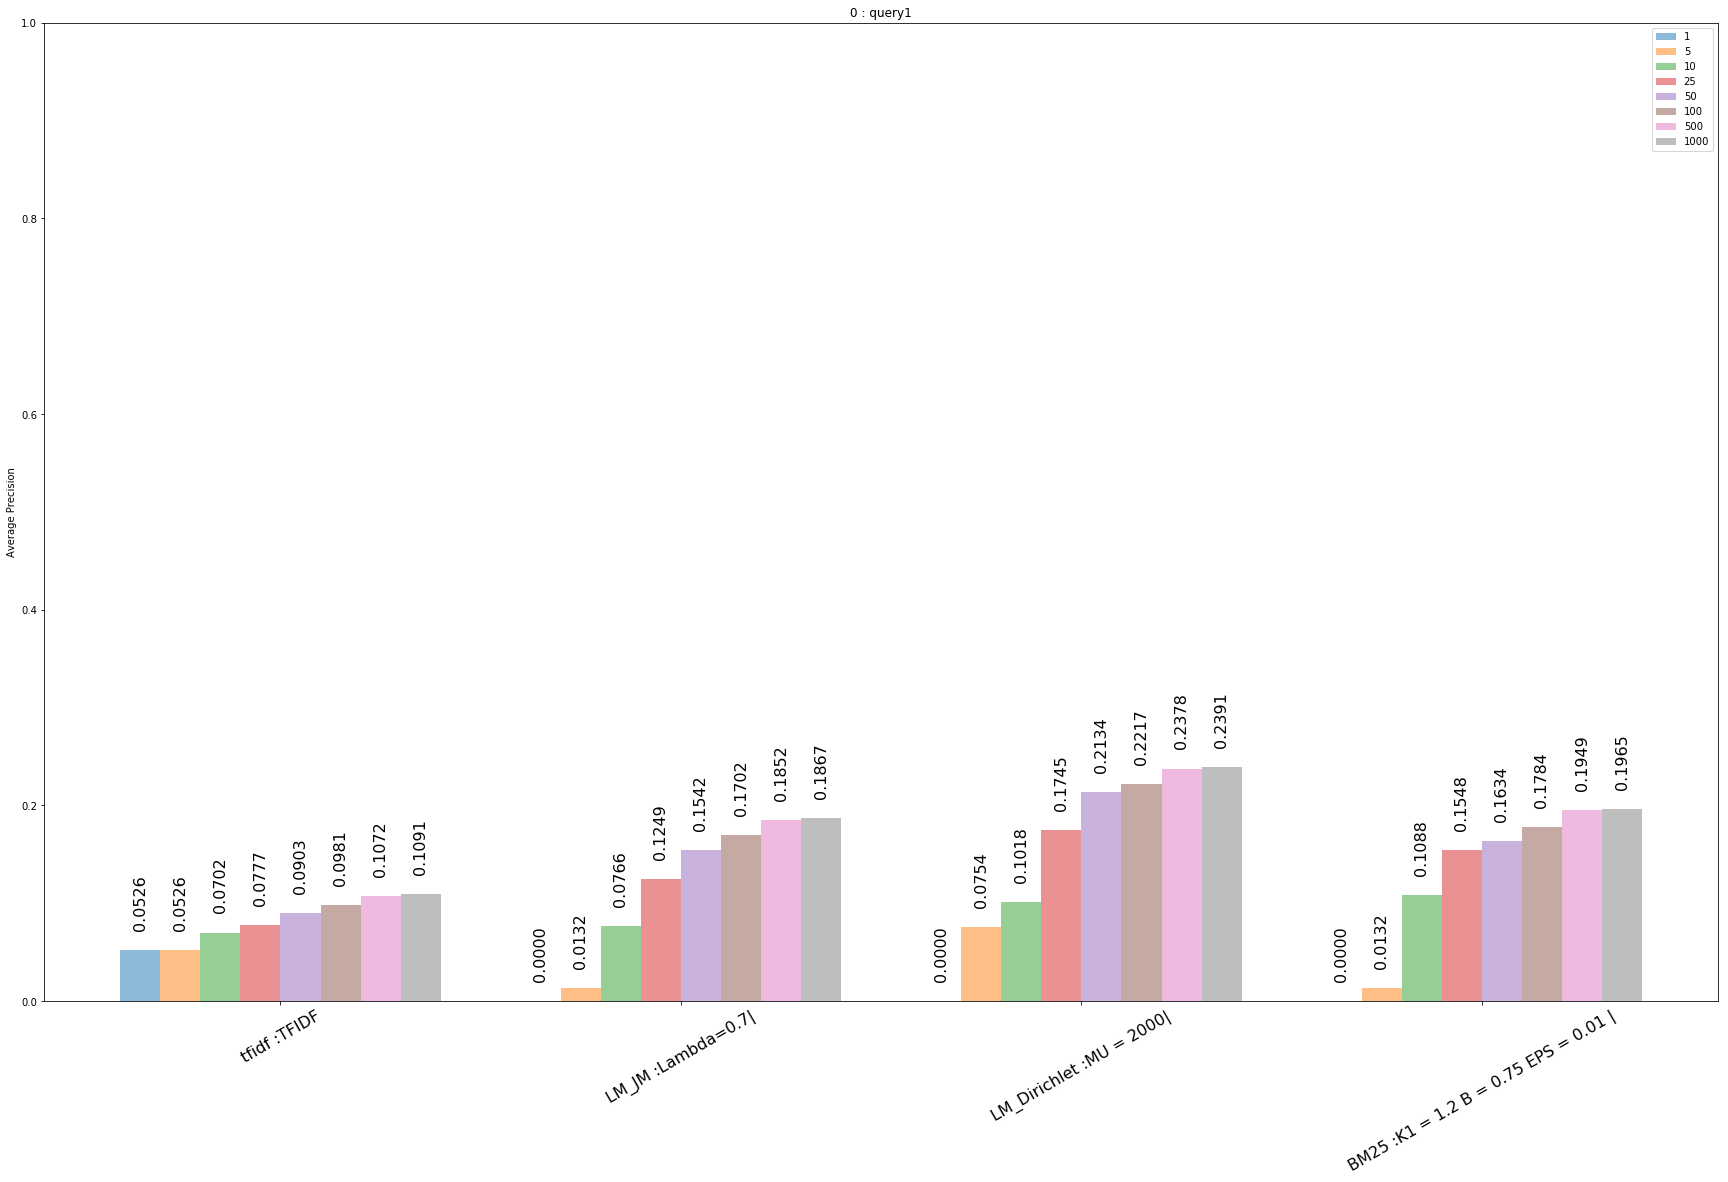

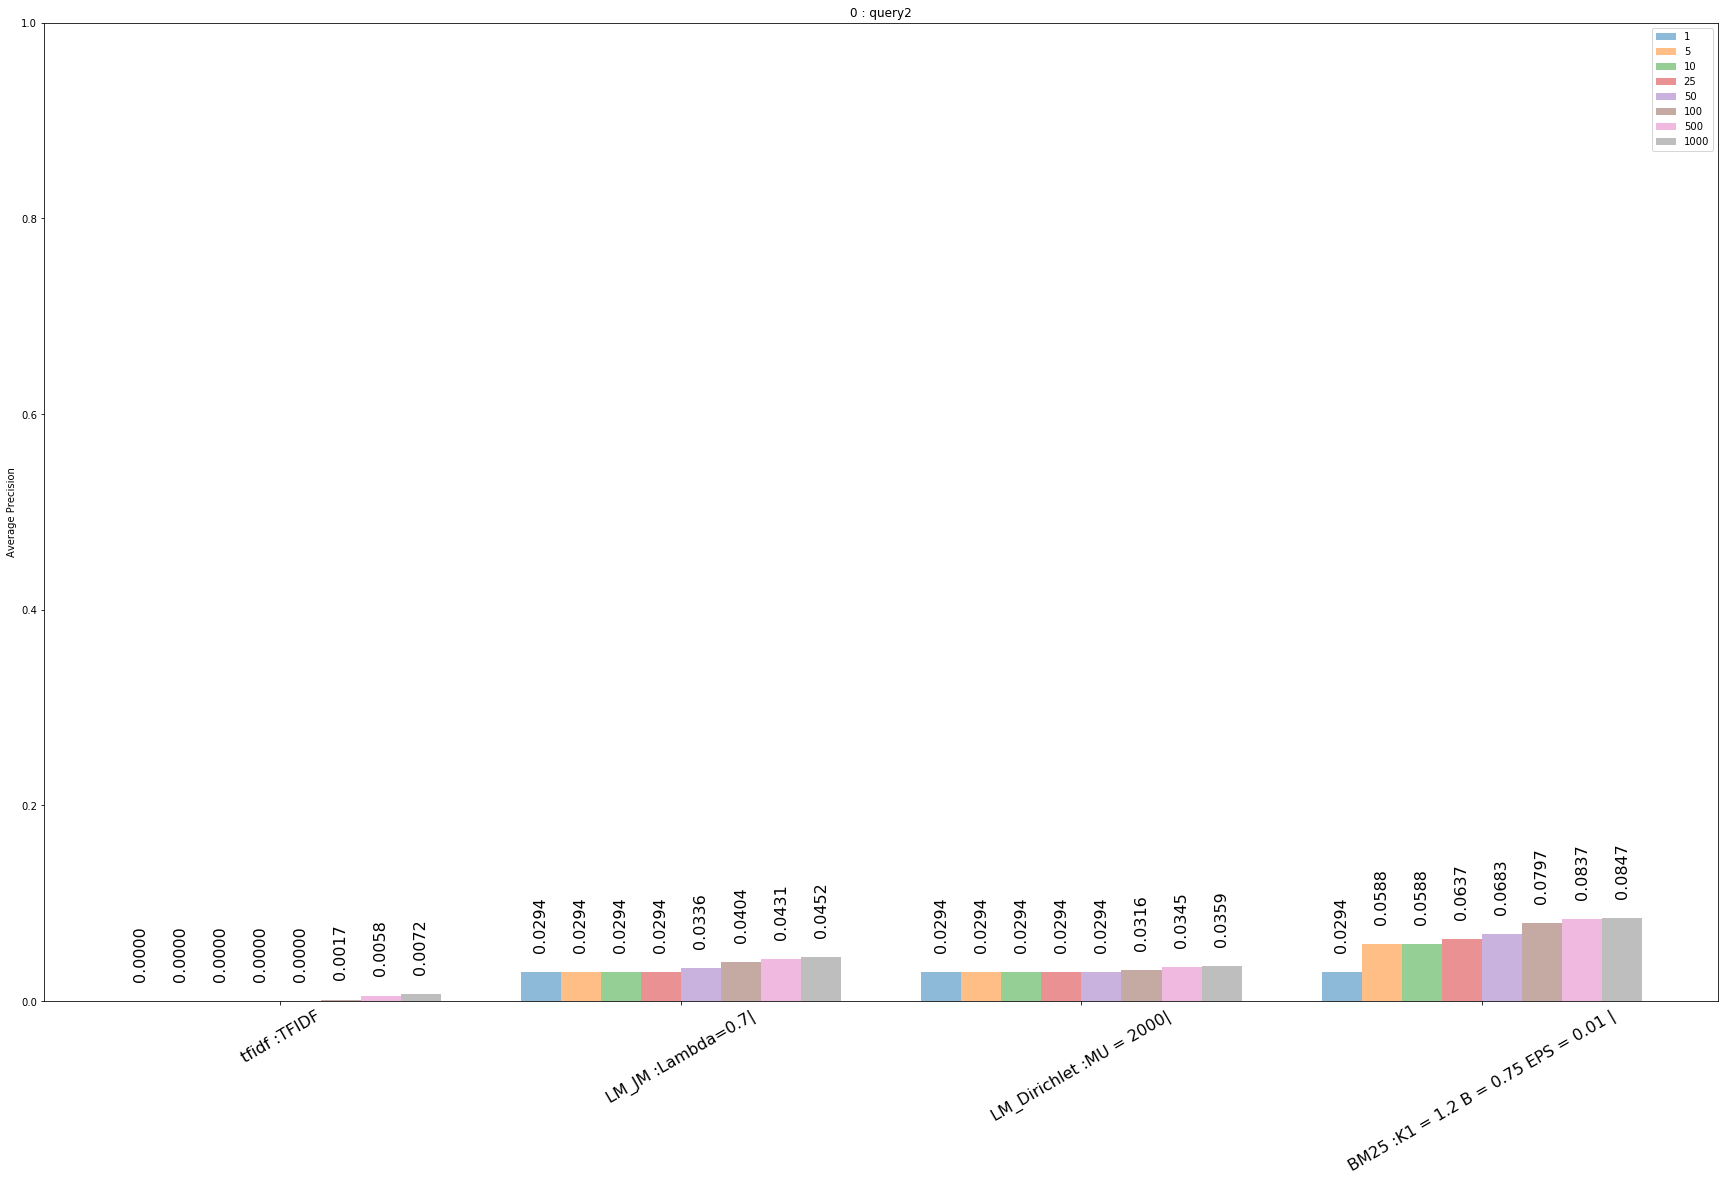

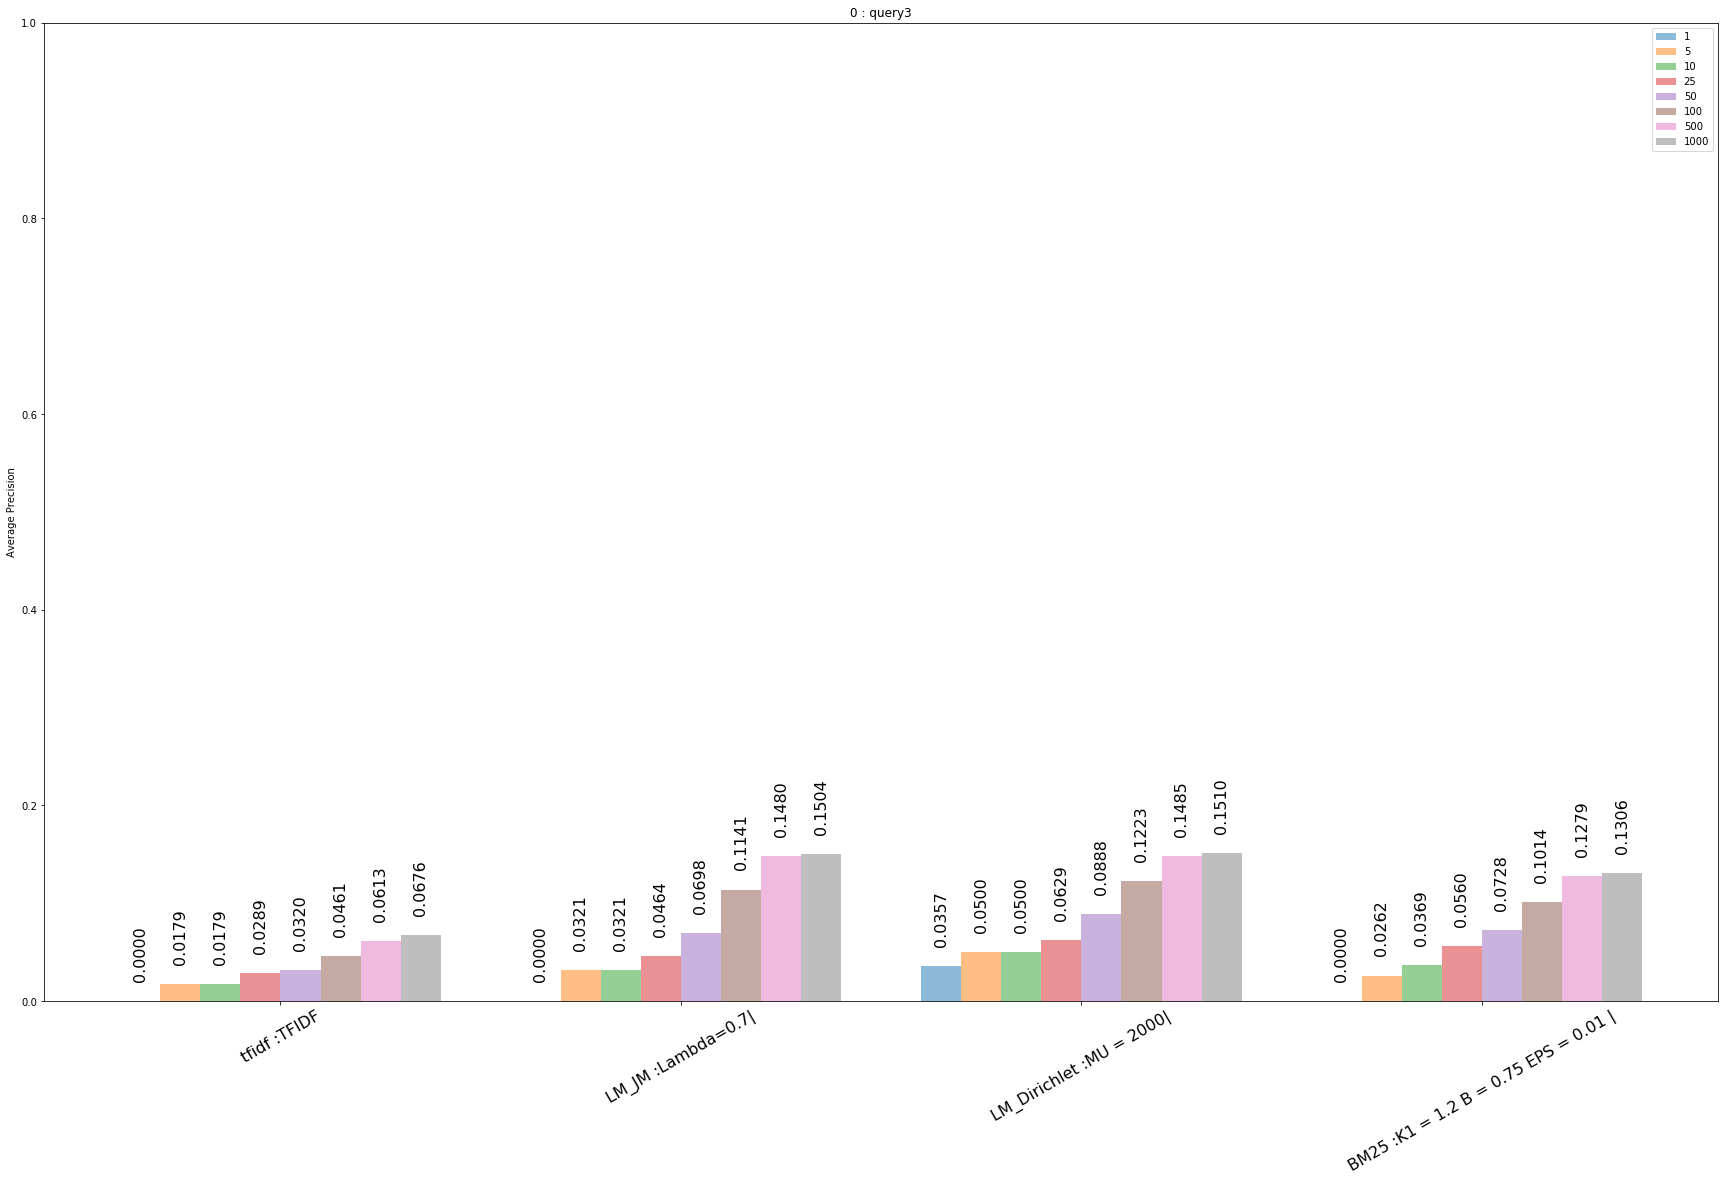

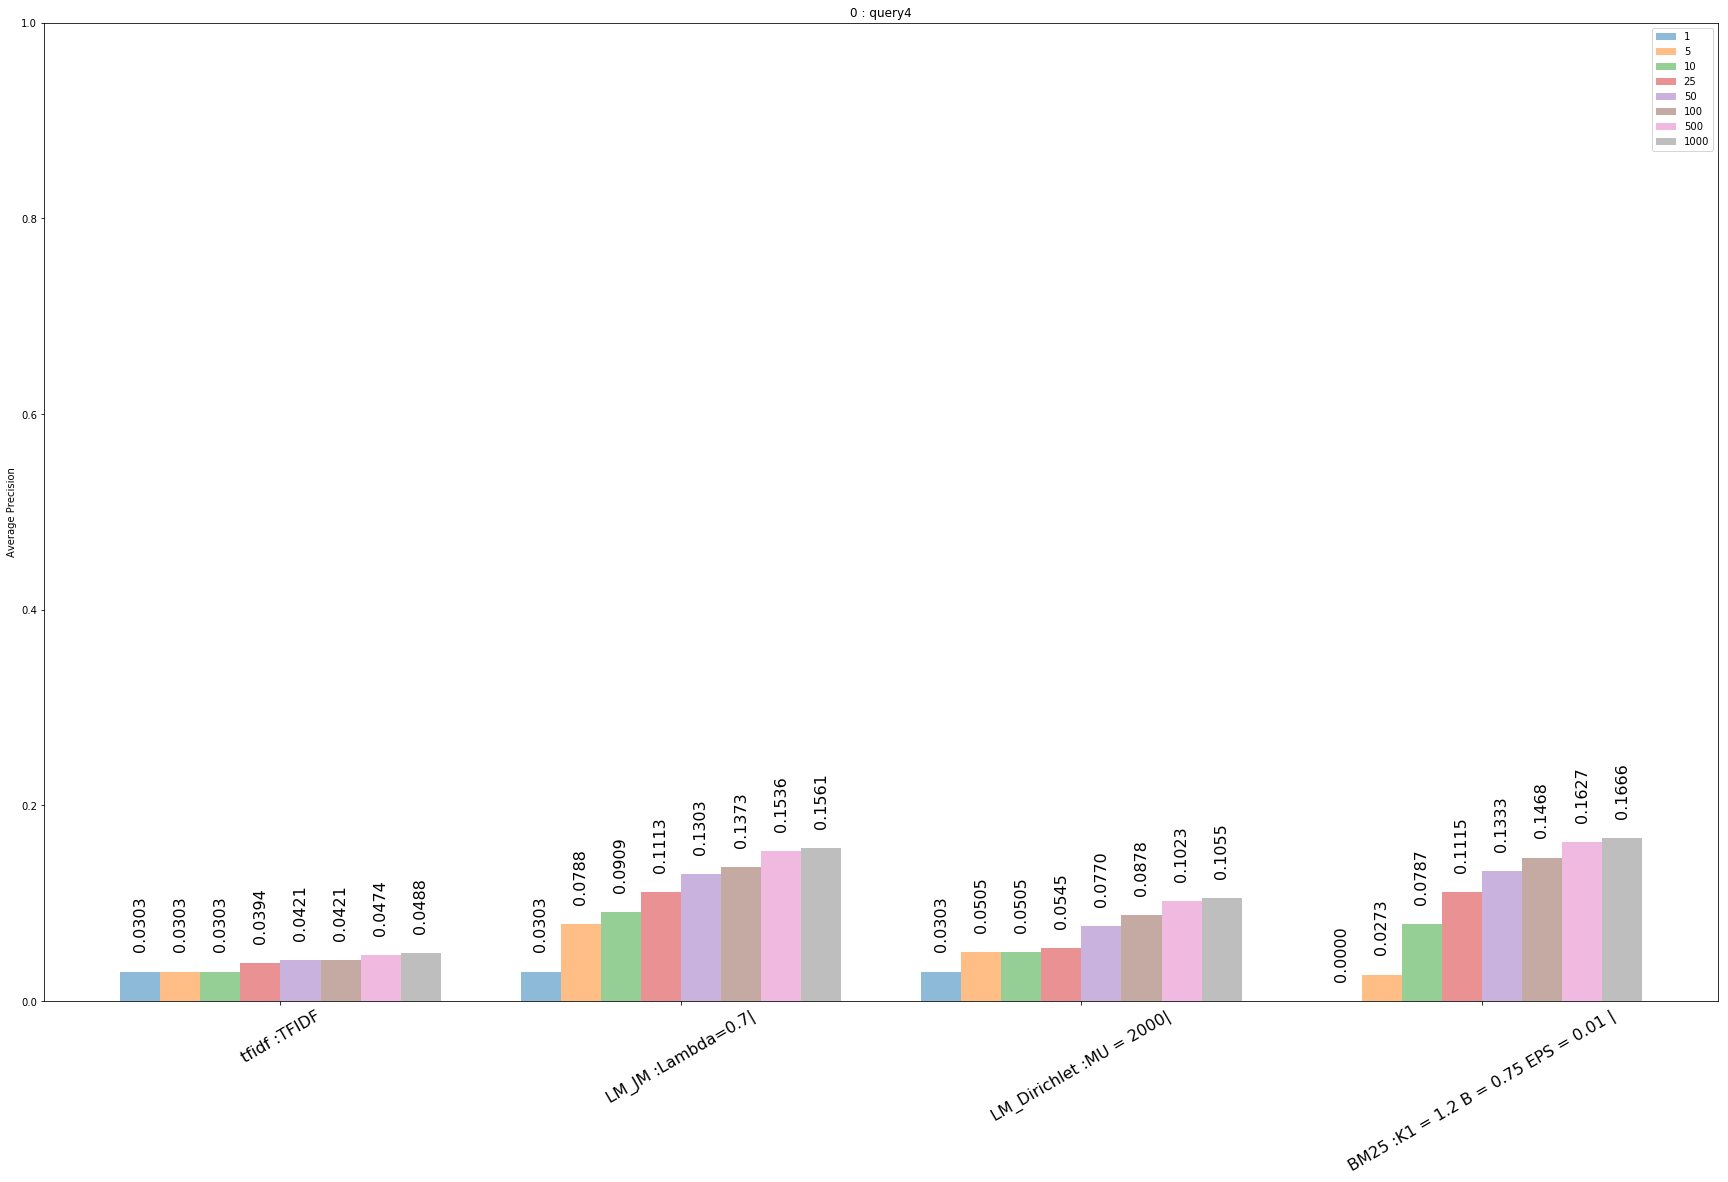

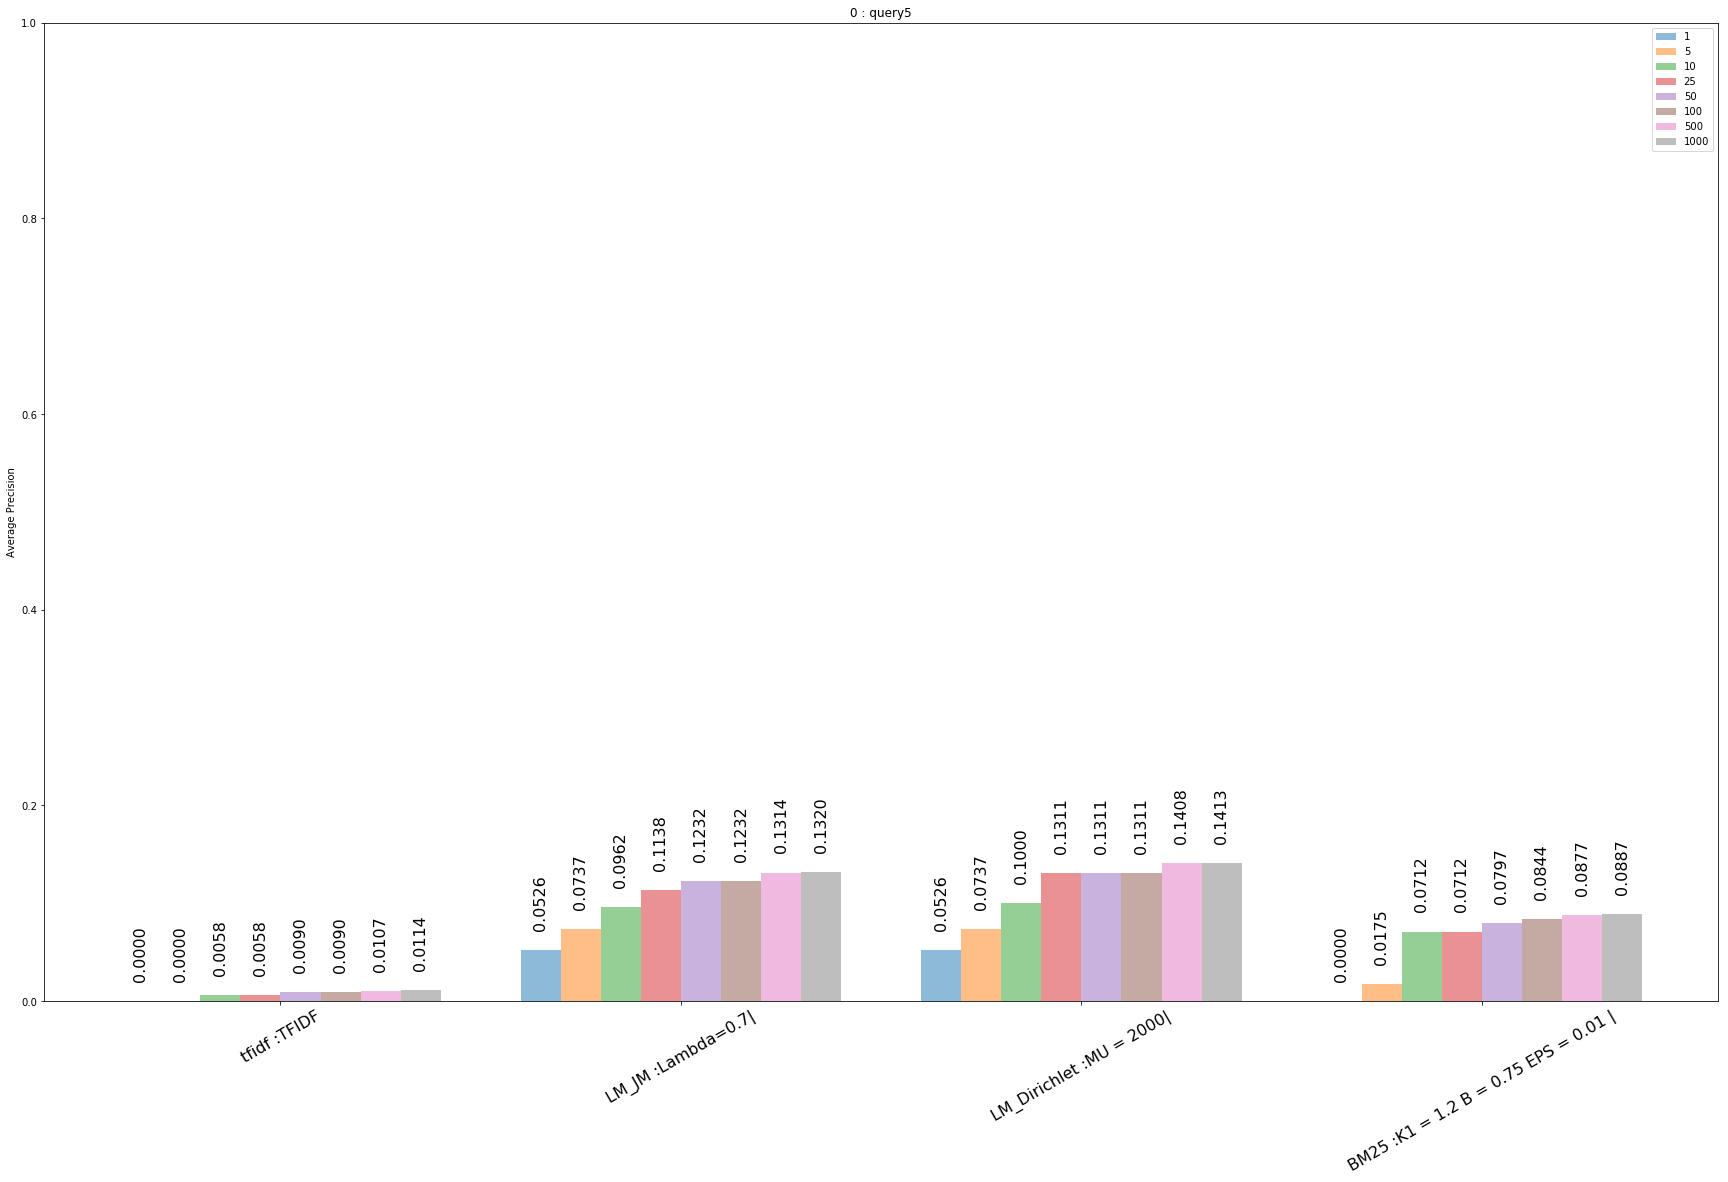

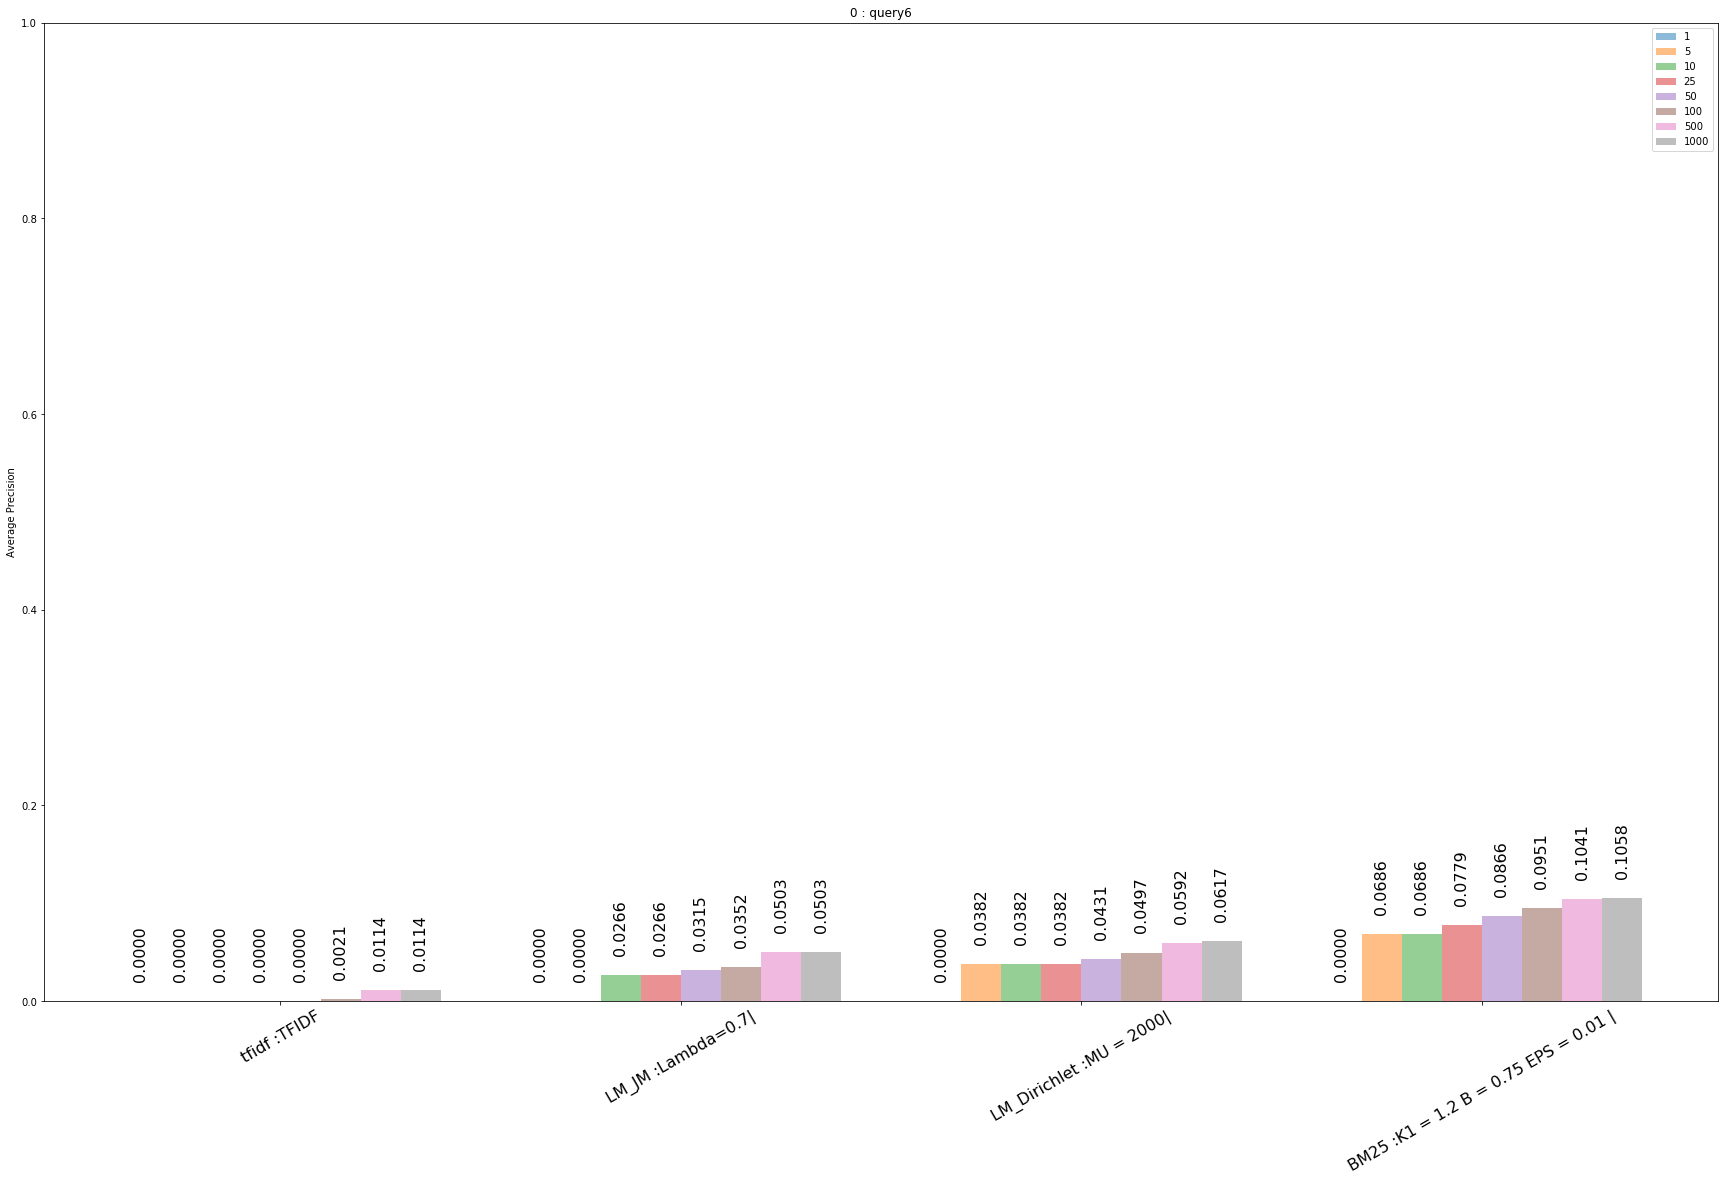

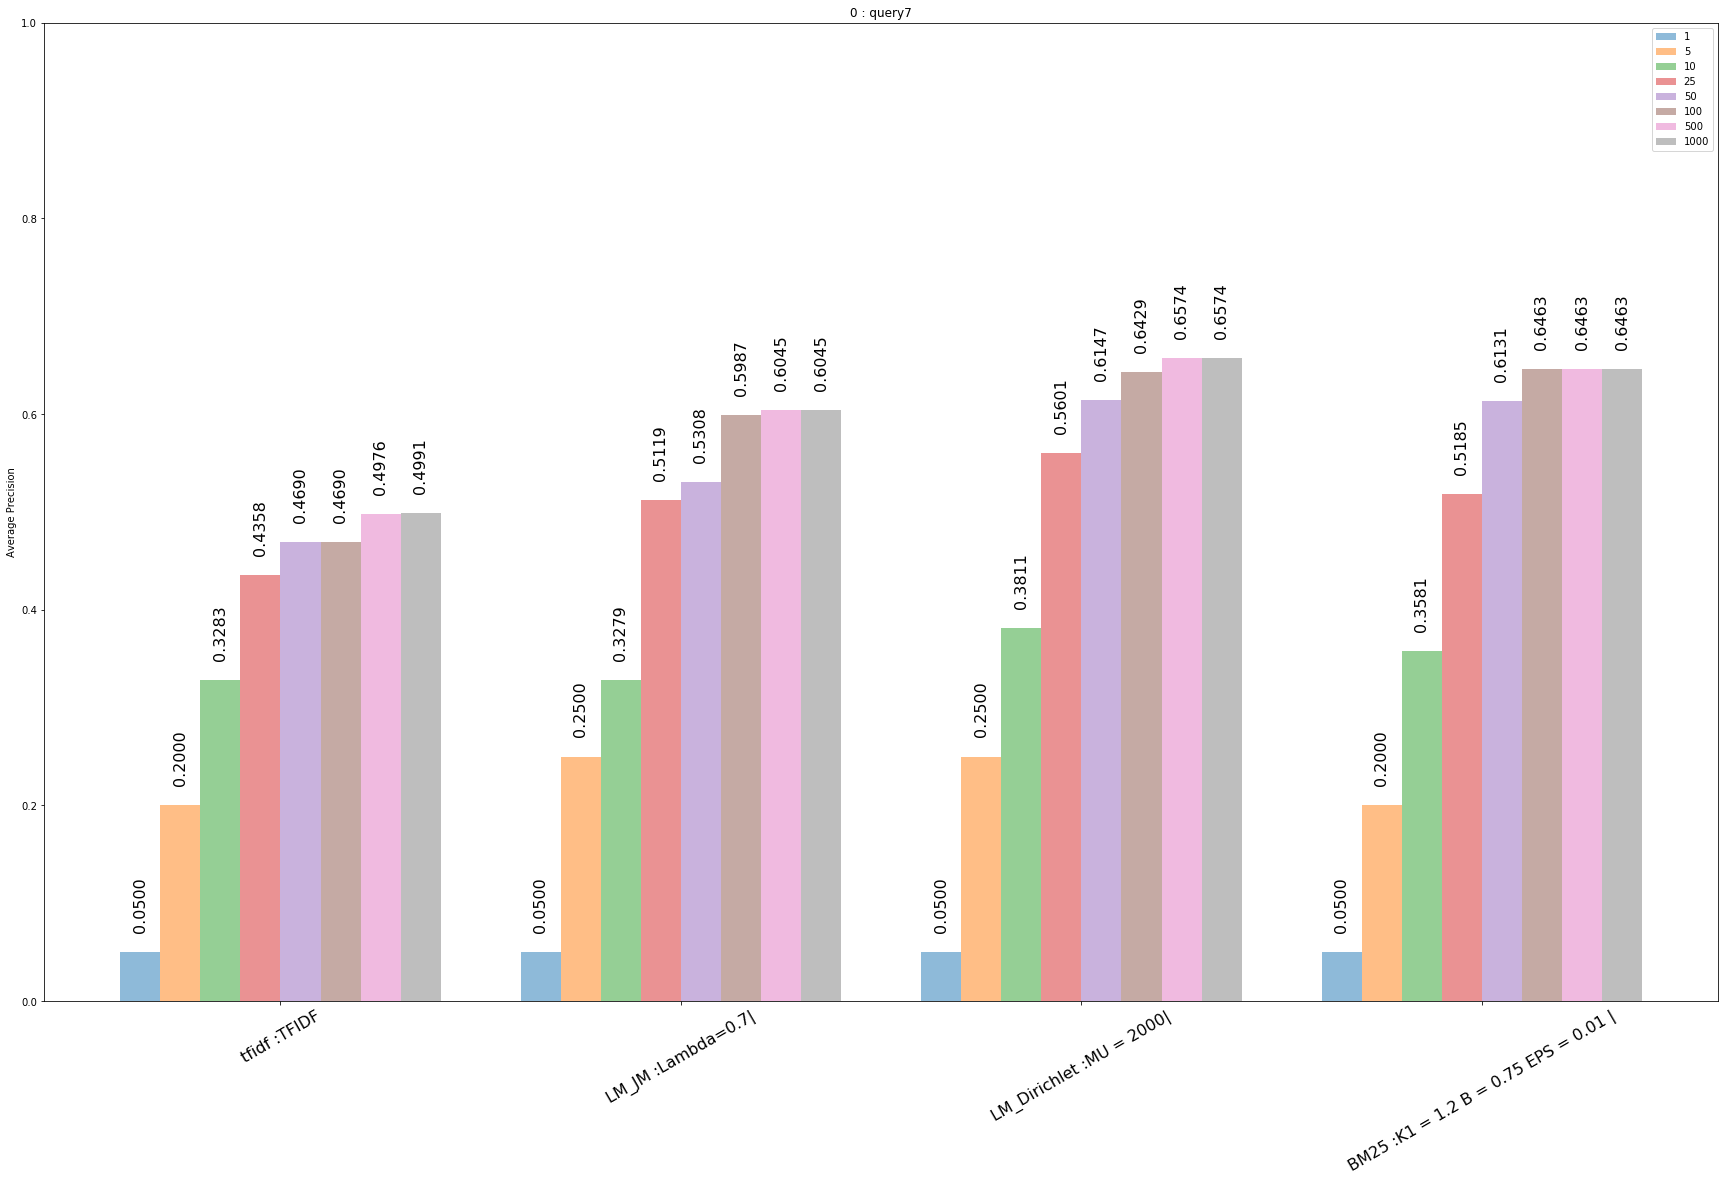

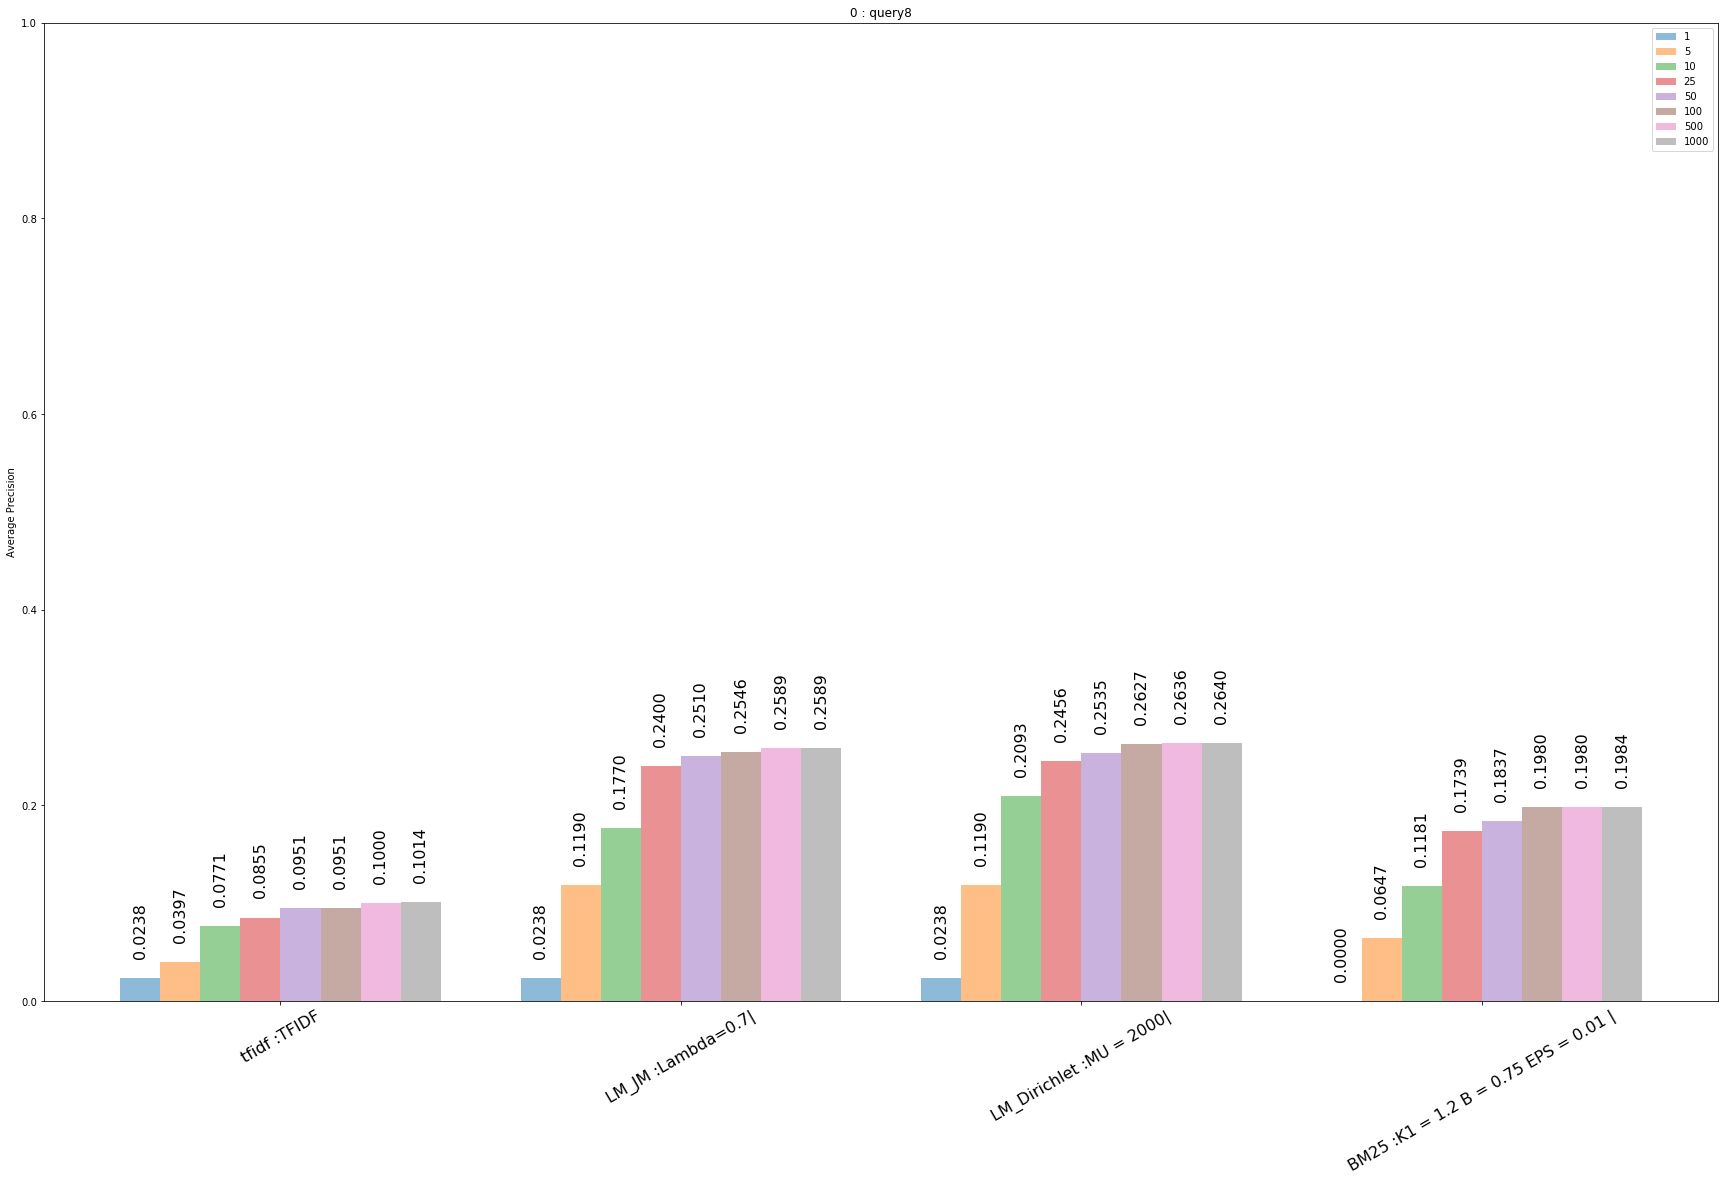

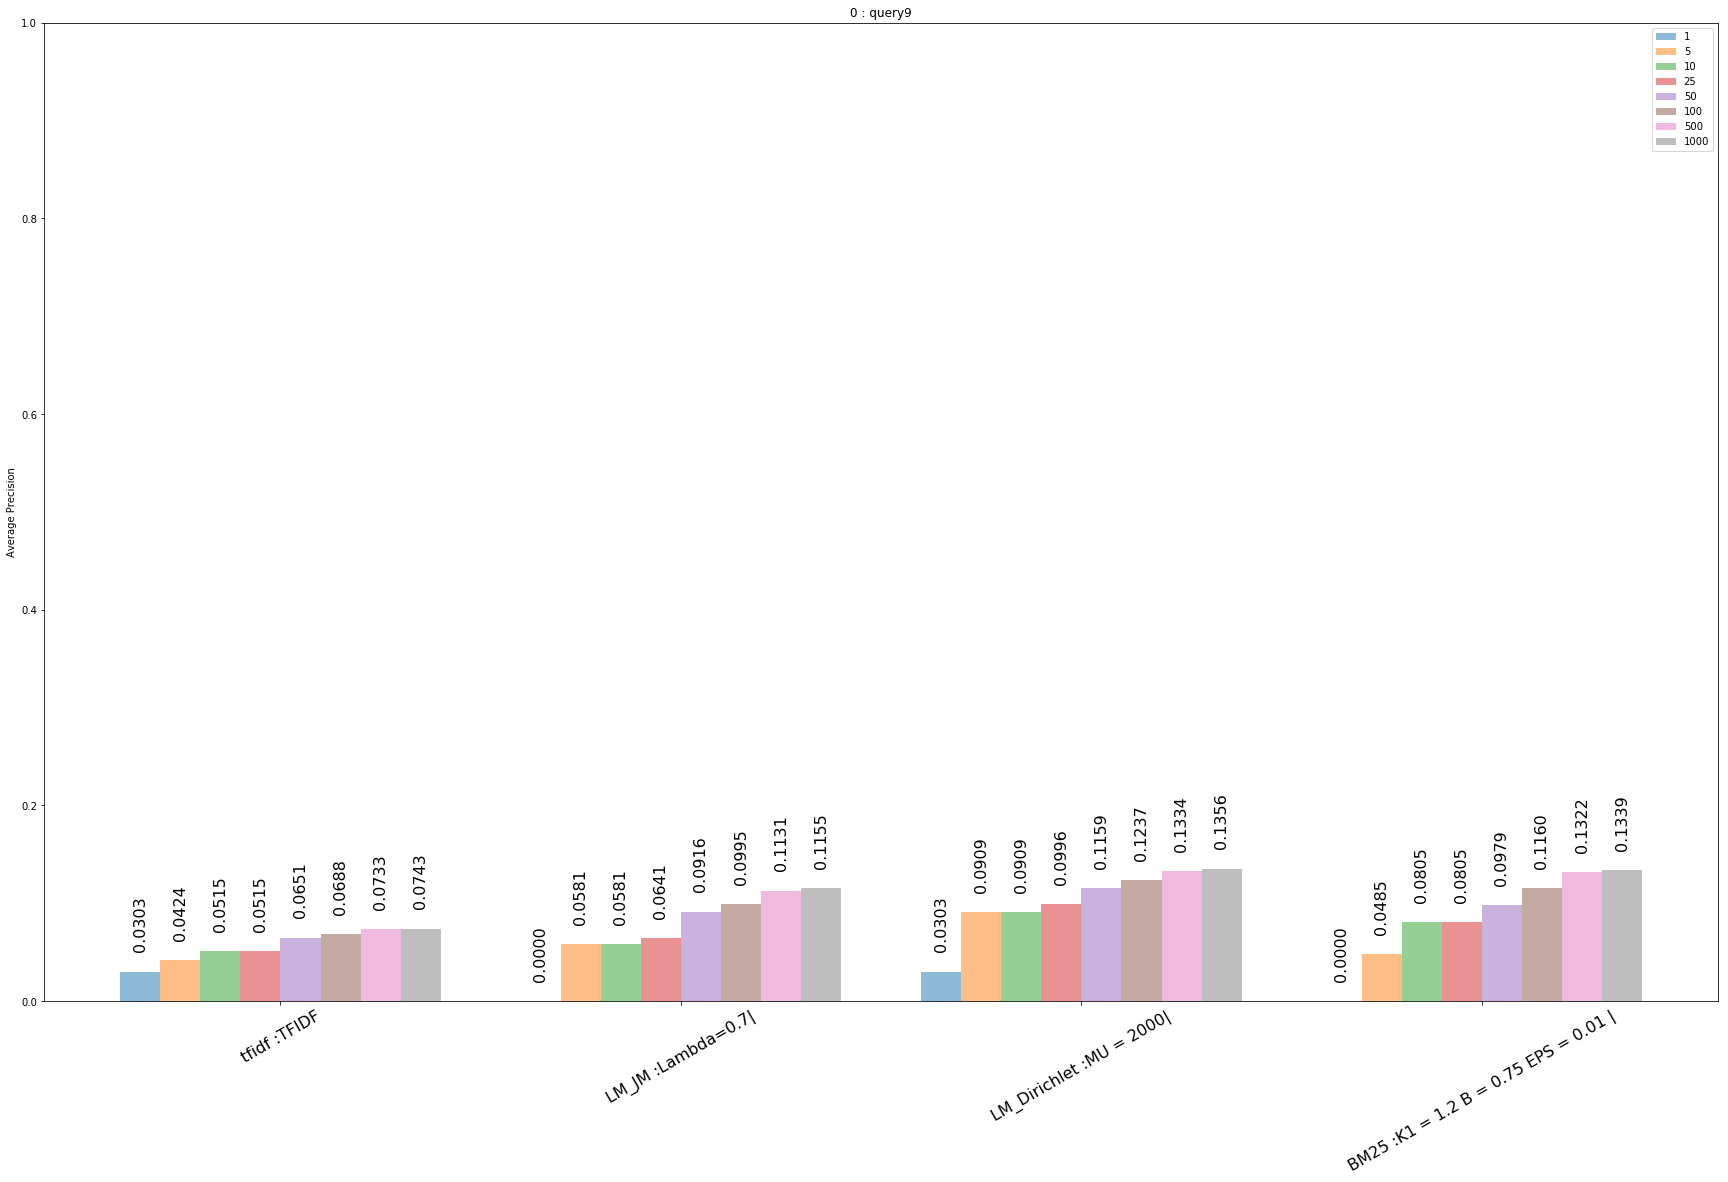

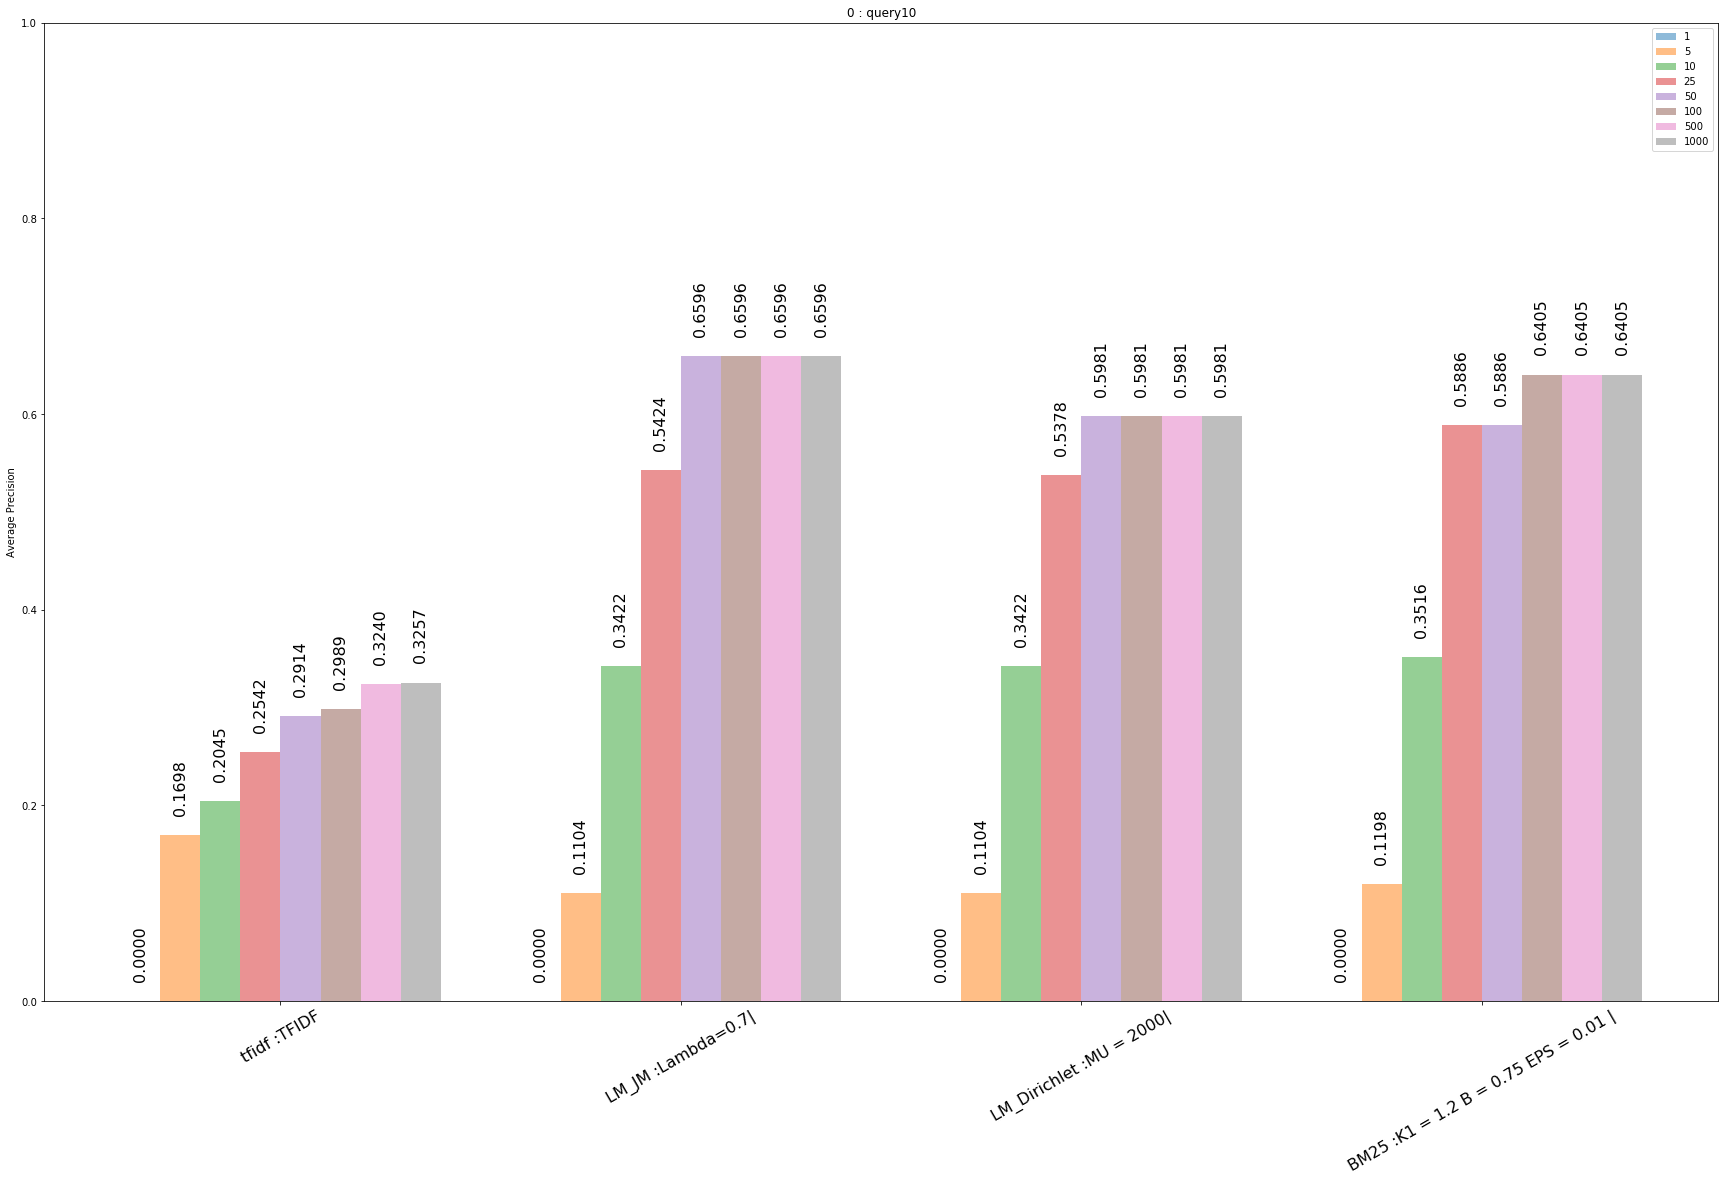

In [56]:
# query wise AP

x = f.parse(1)

for rel in [10,1,0]:

    for q in np.arange(1, 11):
    
        y = x[np.logical_and(x['Docs considered'] == rel, x['Query'] == q)]

        ind = np.arange(len(models))  # the x locations for the groups
        width = 1.0/(len(K) + 2)    # the width of the bars
        fig, ax = plt.subplots()
        fig.set_size_inches(30, 18)

        rects = []
        for k,j in enumerate(K):
            rects.append(ax.bar(ind + k*width, y[j], width, alpha= 0.5))


        ax.set_ylim([0,1])
        # add some text for labels, title and axes ticks
        ax.set_ylabel('Average Precision')
        ax.set_title(str(rel) + ' : query' + str(q))
        ax.set_xticks(ind + 3.5*width)
        ax.set_xticklabels(models,rotation=30, fontsize=16)

        ax.legend(rects, K)

        for rect in rects:
            autolabel(rect)


        plt.show()
        fig.savefig(pp, format='pdf')
        plt.close(fig)

In [57]:
pp.close()